In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

# Load the uploaded files to examine their contents
file_paths = {
    "PH": r"C:\Users\Abdul\OneDrive - Chulalongkorn University\Road to Thesis\SAMPLES\DATA DROP\100 Data\PH_100.csv",
    "TH": r"C:\Users\Abdul\OneDrive - Chulalongkorn University\Road to Thesis\SAMPLES\DATA DROP\100 Data\TH_100.csv",
    "ID": r"C:\Users\Abdul\OneDrive - Chulalongkorn University\Road to Thesis\SAMPLES\DATA DROP\100 Data\ID_100.csv",
    "MY": r"C:\Users\Abdul\OneDrive - Chulalongkorn University\Road to Thesis\SAMPLES\DATA DROP\100 Data\MY_100.csv"
}
# Read the files into pandas DataFrames
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}
# Display the first few rows of each file to understand their structure
{key: df.head() for key, df in dataframes.items()}


{'PH':        X  9.001100697  8.999575306  8.998049915  8.996524524  8.994999133  \
 0  Real1    -0.002636    -0.002584    -0.002572    -0.002557    -0.002678   
 1  Real2    -0.001010    -0.000987    -0.000961    -0.001011    -0.000988   
 2  Real3    -0.003036    -0.003000    -0.003002    -0.002939    -0.002844   
 3  Real4    -0.002888    -0.002884    -0.002918    -0.003038    -0.002941   
 4  Real5    -0.002896    -0.002922    -0.002802    -0.002920    -0.003054   
 
    8.993473742  8.991948351  8.99042296  8.988897569  ...  -0.987159831  \
 0    -0.002706    -0.002686   -0.002602    -0.002635  ...     -0.002712   
 1    -0.000989    -0.001023   -0.001016    -0.000970  ...     -0.000990   
 2    -0.002909    -0.002933   -0.002890    -0.002856  ...     -0.002713   
 3    -0.002857    -0.002865   -0.002852    -0.002949  ...     -0.003067   
 4    -0.002867    -0.002811   -0.002766    -0.002853  ...     -0.002885   
 
    -0.988685222  -0.990210613  -0.991736004  -0.993261395  -0.994

In [2]:
# prompt: Check the missing value
!pip install umap-learn
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import umap
from sklearn.manifold import TSNE

# Load the uploaded files to examine their contents
file_paths = {
    "PH": r"C:\Users\Abdul\OneDrive - Chulalongkorn University\Road to Thesis\SAMPLES\DATA DROP\100 Data\PH_100.csv",
    "TH": r"C:\Users\Abdul\OneDrive - Chulalongkorn University\Road to Thesis\SAMPLES\DATA DROP\100 Data\TH_100.csv",
    "ID": r"C:\Users\Abdul\OneDrive - Chulalongkorn University\Road to Thesis\SAMPLES\DATA DROP\100 Data\ID_100.csv",
    "MY": r"C:\Users\Abdul\OneDrive - Chulalongkorn University\Road to Thesis\SAMPLES\DATA DROP\100 Data\MY_100.csv"
}


# Read the files into pandas DataFrames
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Check for missing values in each DataFrame
for name, df in dataframes.items():
  print(f"\nMissing values in {name}:\n{df.isnull().sum()}")


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



Missing values in PH:
X               0
9.001100697     0
8.999575306     0
8.998049915     0
8.996524524     0
               ..
-0.994786786    0
-0.996312177    0
-0.997837568    0
-0.99936296     0
-1.000888351    0
Length: 3476, dtype: int64

Missing values in TH:
X               0
9.001100697     0
8.999575306     0
8.998049915     0
8.996524524     0
               ..
-0.994786786    0
-0.996312177    0
-0.997837568    0
-0.99936296     0
-1.000888351    0
Length: 3411, dtype: int64

Missing values in ID:
X               0
9.001100697     0
8.999575306     0
8.998049915     0
8.996524524     0
               ..
-0.392257326    0
-0.393782717    0
-0.395308108    0
-0.396833499    0
-0.39835889     0
Length: 3176, dtype: int64

Missing values in MY:
X               0
9.001100697     0
8.999575306     0
8.998049915     0
8.996524524     0
               ..
-0.994786786    0
-0.996312177    0
-0.997837568    0
-0.99936296     0
-1.000888351    0
Length: 3705, dtype: int64


In [3]:
# prompt: when it does not have the NaN value, do the PCA

import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# ... (your existing code to load dataframes) ...

# Perform PCA only if there are no NaN values
for name, df in dataframes.items():
  if df.isnull().values.any():
    print(f"DataFrame '{name}' contains NaN values. Skipping PCA.")
  else:
    print(f"Performing PCA on DataFrame '{name}'")
    # Assuming you want to perform PCA on all numerical columns
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:,numerical_cols].values
    pca = PCA(n_components=2) # You can adjust the number of components
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
    print(principalDf.head())

Performing PCA on DataFrame 'PH'
   principal component 1  principal component 2
0              -0.845882              -0.192802
1               6.346113              -2.926378
2              -1.965726               0.020888
3              -2.713318               0.197560
4              -1.787838              -0.010654
Performing PCA on DataFrame 'TH'
   principal component 1  principal component 2
0              -0.036178              -0.055670
1               0.786072              -0.205951
2              -0.445789               0.143908
3              -0.062202              -0.001944
4              -0.873799              -0.535708
Performing PCA on DataFrame 'ID'
   principal component 1  principal component 2
0              -4.235396              -0.167406
1               4.539464               0.318572
2              -3.981598              -0.061498
3               4.095314               0.321109
4               3.690571              -0.122209
Performing PCA on DataFrame 'MY'
   p

In [4]:
# prompt: do the data scaling and do the PCA

from sklearn.preprocessing import StandardScaler

# ... (your existing code to load dataframes) ...

# Perform data scaling and PCA
for name, df in dataframes.items():
    if df.isnull().values.any():
        print(f"DataFrame '{name}' contains NaN values. Skipping scaling and PCA.")
    else:
        print(f"Performing scaling and PCA on DataFrame '{name}'")
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # Data scaling using StandardScaler
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)

        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(x_scaled)
        principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])
        print(principalDf.head())

Performing scaling and PCA on DataFrame 'PH'
   principal component 1  principal component 2
0              -1.398457              -2.806308
1             129.478457             -11.480159
2             -21.008646              -2.682998
3             -30.986158              -5.843522
4             -22.408241              -8.205577
Performing scaling and PCA on DataFrame 'TH'
   principal component 1  principal component 2
0             -32.843311              17.495208
1              32.904282             -18.026057
2               7.616456             -21.303443
3             -29.094136              29.806529
4             -62.712195             -18.543728
Performing scaling and PCA on DataFrame 'ID'
   principal component 1  principal component 2
0             -56.295979              -3.609117
1              59.970389              -1.333815
2             -56.468099               3.454668
3              56.034449             -10.198246
4              48.282396               7.534058
P

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

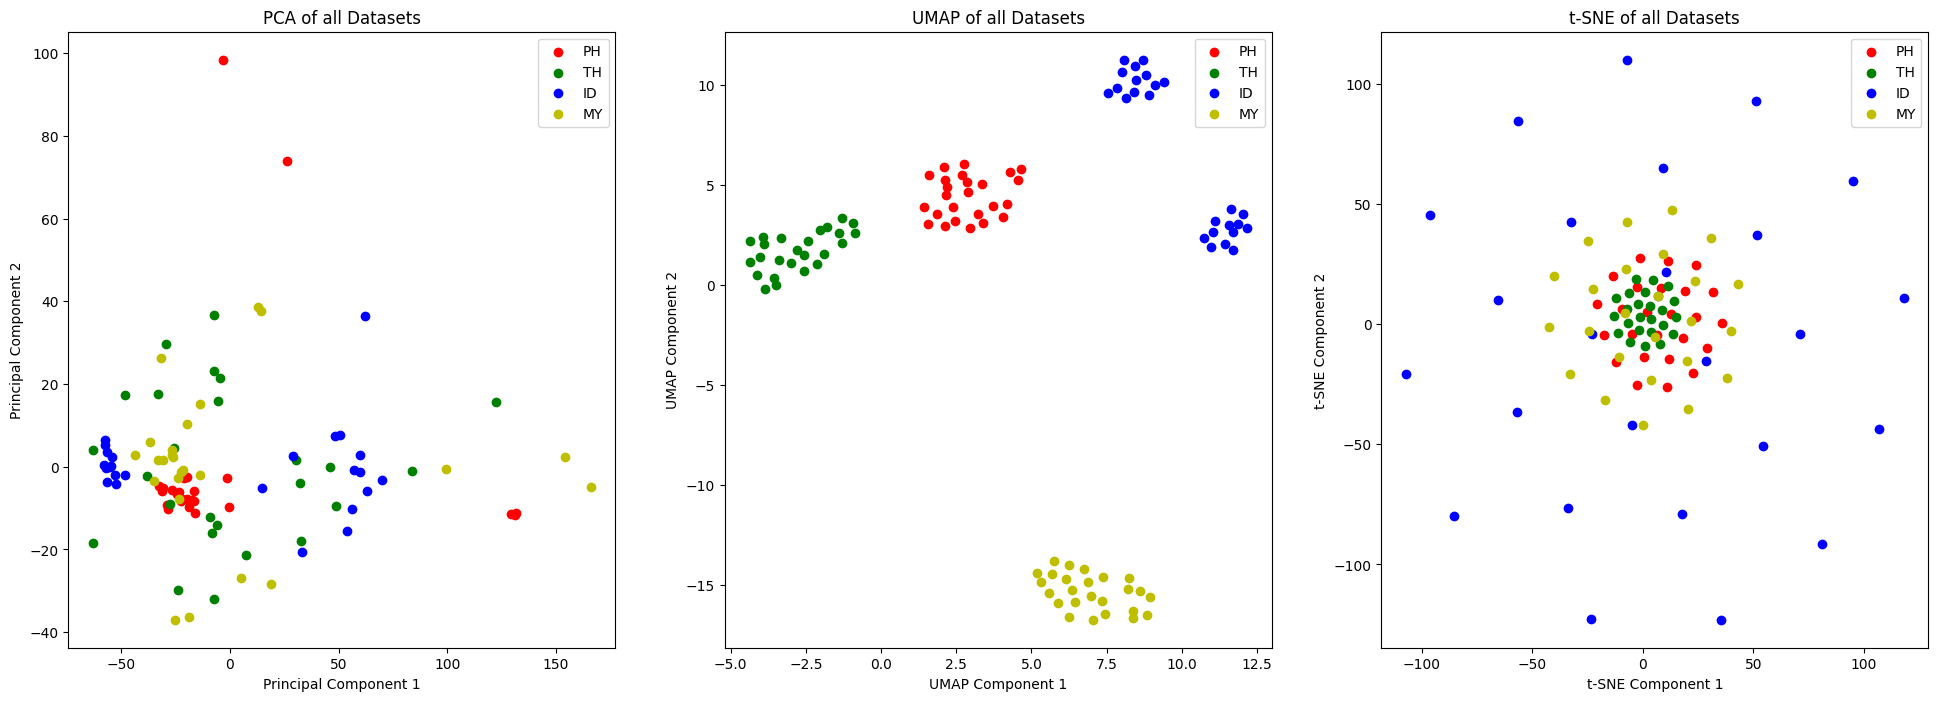

In [5]:


# Assuming `dataframes` is a dictionary of DataFrames
# Replace this with your actual DataFrames
# Example:
# dataframes = {'dataset1': df1, 'dataset2': df2, ...}

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE
plt.figure(figsize=(24, 8))

# PCA plot
plt.subplot(1, 3, 1)
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(x_scaled)
        plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of all Datasets')
plt.legend()

# UMAP plot
plt.subplot(1, 3, 2)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)

        reducer = umap.UMAP(n_components=2, random_state=42) # Initialize UMAP
        embedding = reducer.fit_transform(x_scaled) # Fit and transform the data

        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of all Datasets')
plt.legend()

# t-SNE plot
plt.subplot(1, 3, 3)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)

        # Dynamically adjust perplexity based on the number of samples
        n_samples = x_scaled.shape[0]
        perplexity = min(30, n_samples - 1)

        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42) # Initialize t-SNE
        tsne_results = tsne.fit_transform(x_scaled) # Fit and transform the data

        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of all Datasets')
plt.legend()

plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

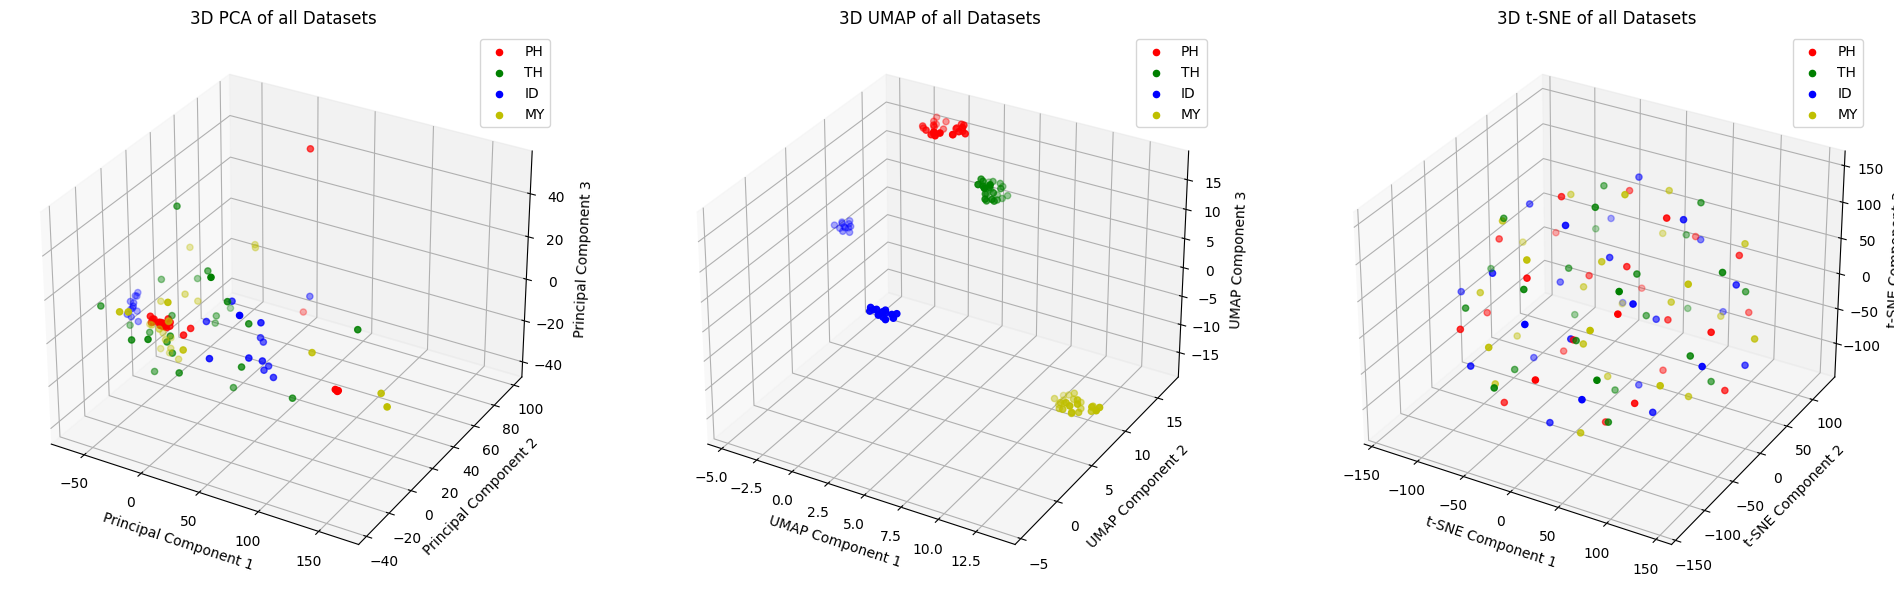

In [6]:
# prompt: Do for the 3D PCA,UMAP and t-SNE above

# ... (your existing code) ...

# 3D Visualization for PCA, UMAP, and t-SNE

from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize=(24, 8))

# 3D PCA plot
ax = plt.subplot(1, 3, 1, projection='3d')
colors = ['r', 'g', 'b', 'y']
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)
        pca = PCA(n_components=3)  # Project to 3 components
        principalComponents = pca.fit_transform(x_scaled)
        ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2], c=colors[i], label=name)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of all Datasets')
ax.legend()


# 3D UMAP plot
ax = plt.subplot(1, 3, 2, projection='3d')
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)
        reducer = umap.UMAP(n_components=3, random_state=42)
        embedding = reducer.fit_transform(x_scaled)
        ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=colors[i], label=name)

ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
ax.set_title('3D UMAP of all Datasets')
ax.legend()


# 3D t-SNE plot
ax = plt.subplot(1, 3, 3, projection='3d')
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)
        n_samples = x_scaled.shape[0]
        perplexity = min(30, n_samples - 1)
        tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
        tsne_results = tsne.fit_transform(x_scaled)
        ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=colors[i], label=name)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D t-SNE of all Datasets')
ax.legend()

plt.show()


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


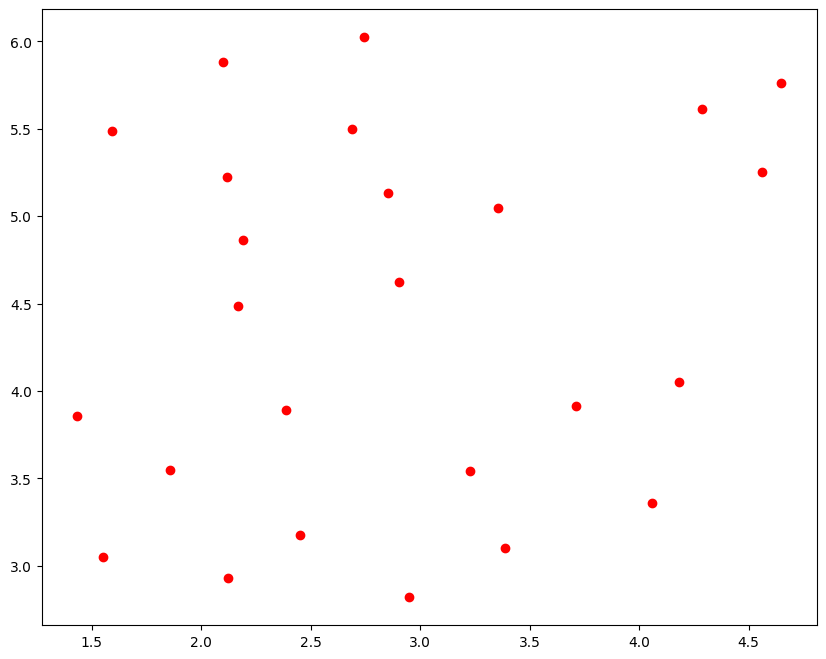

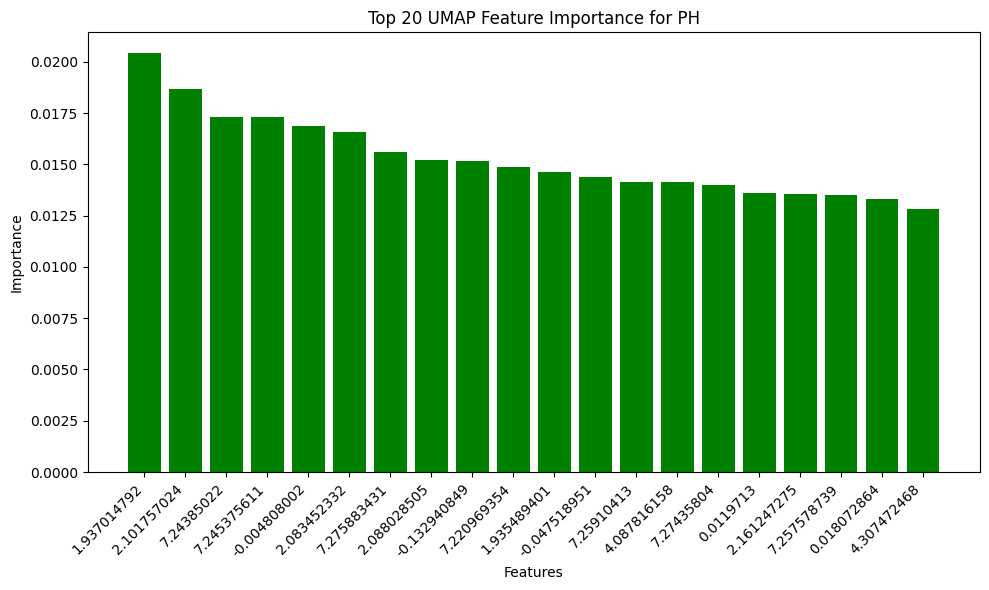

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


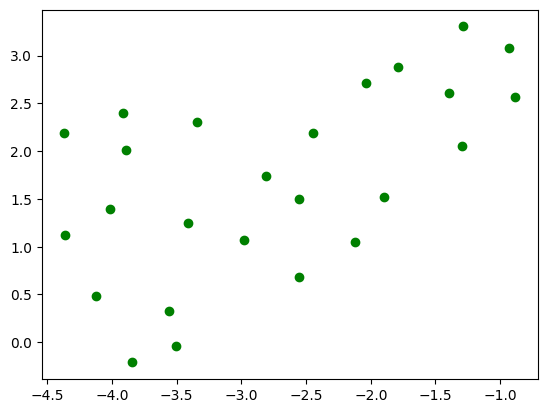

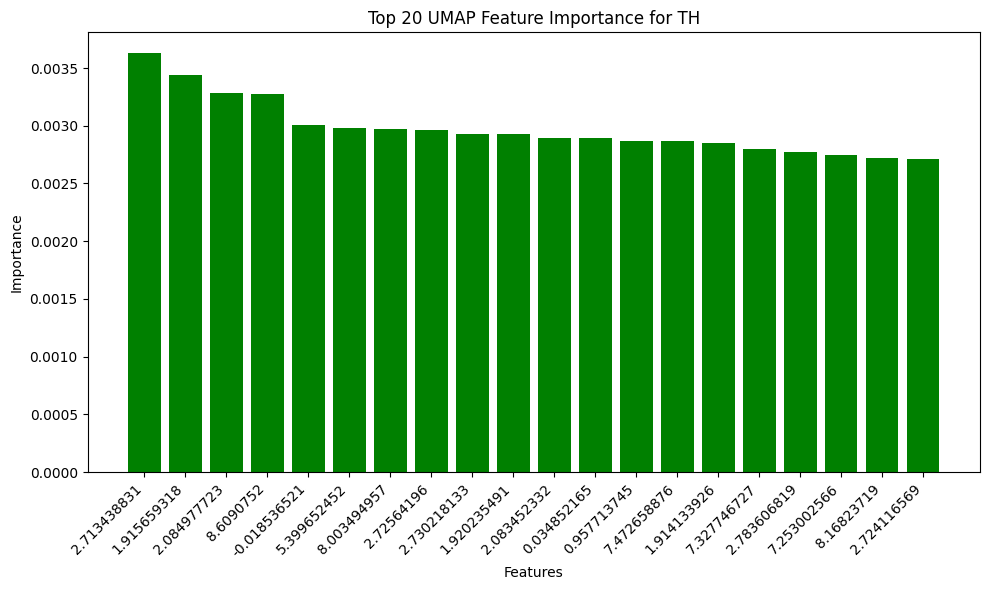

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


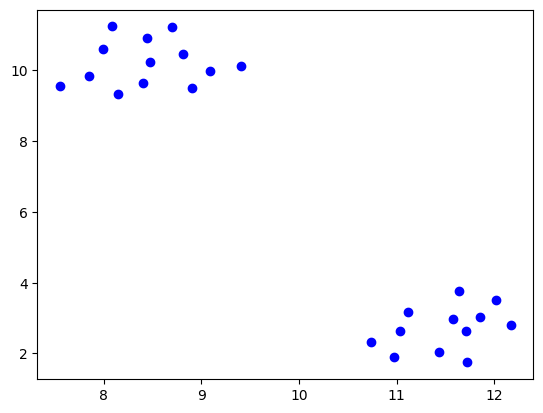

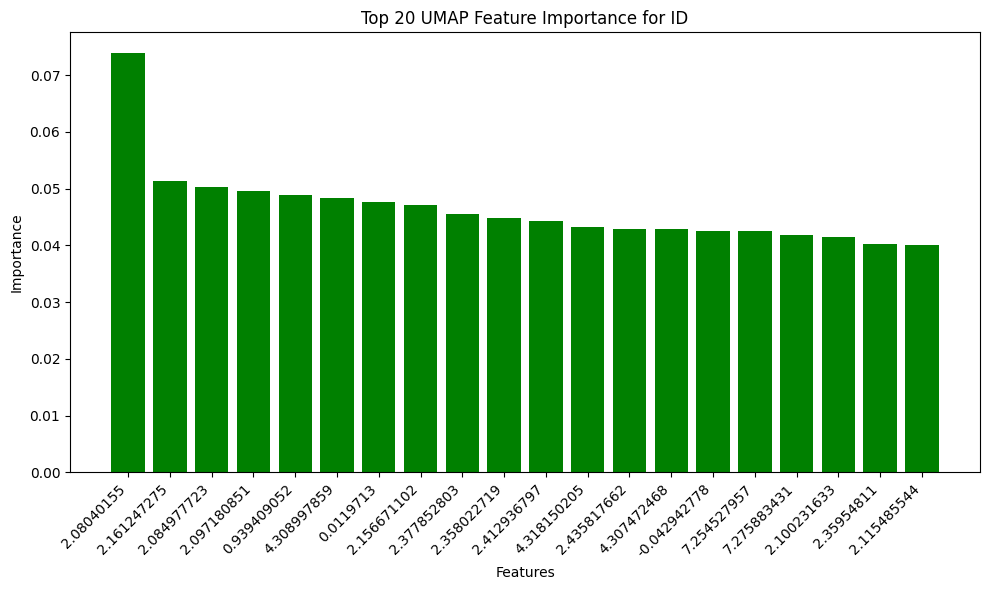

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


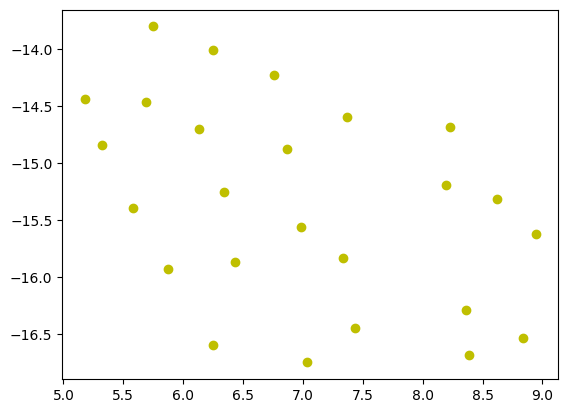

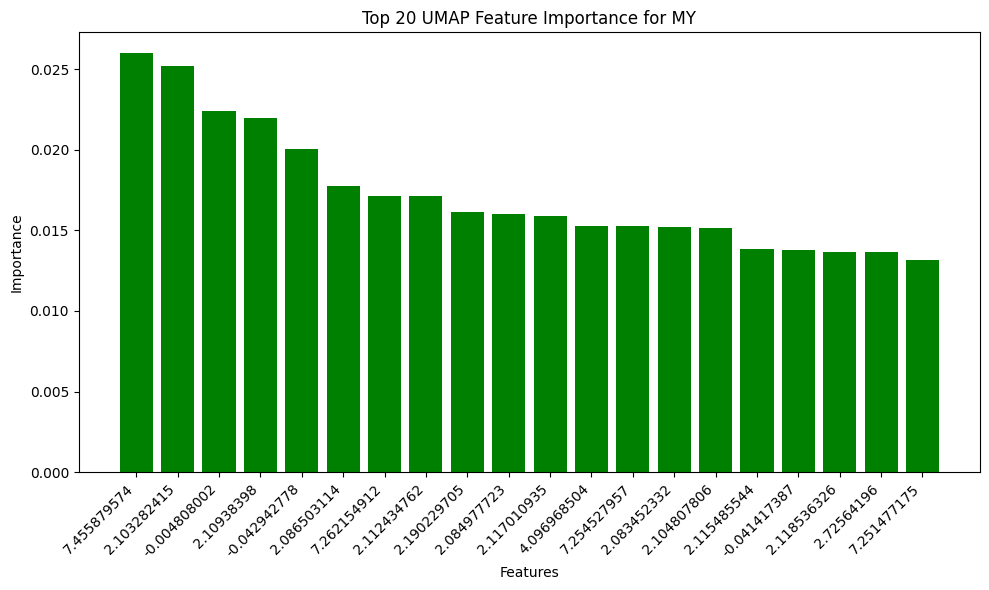

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


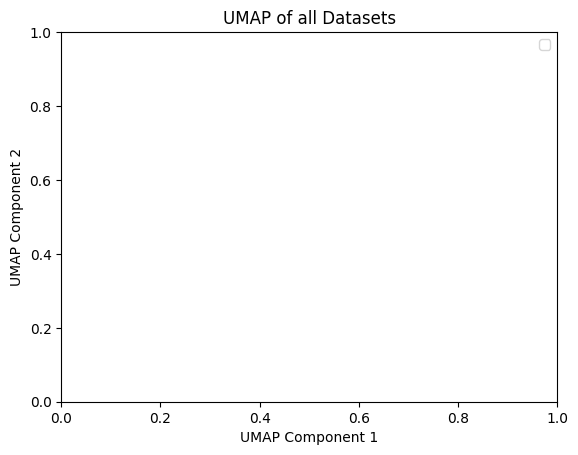

In [7]:
##Surrogate Model

!pip install umap-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define top_n for feature importance
top_n = 20

# Assuming 'dataframes' is your dictionary of datasets
plt.figure(figsize=(10, 8))

colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        # Normalize numerical columns
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)

        # Apply UMAP
        reducer = umap.UMAP(n_components=2, random_state=42)
        embedding = reducer.fit_transform(x_scaled)

        # Visualize UMAP
        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

        # **Feature Importance with Surrogate Model for UMAP**
        surrogate_model = LinearRegression()
        surrogate_model.fit(x_scaled, embedding)

        # Calculate feature importance
        feature_importance = np.abs(surrogate_model.coef_).mean(axis=0)

        # Create DataFrame for feature importance and sort by importance
        importance_df = pd.DataFrame({
            'Feature': numerical_cols,
            'Importance': feature_importance
        }).sort_values(by='Importance', ascending=False)

        # Show only top N features
        top_features = importance_df.head(top_n)

        # Plot top N features
        plt.figure(figsize=(10, 6))
        plt.bar(top_features['Feature'], top_features['Importance'], color='g')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top {top_n} UMAP Feature Importance for {name}')
        plt.ylabel('Importance')
        plt.xlabel('Features')
        plt.tight_layout()
        plt.show()

# Final UMAP plot for comparison
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of all Datasets')
plt.legend()
plt.show()



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


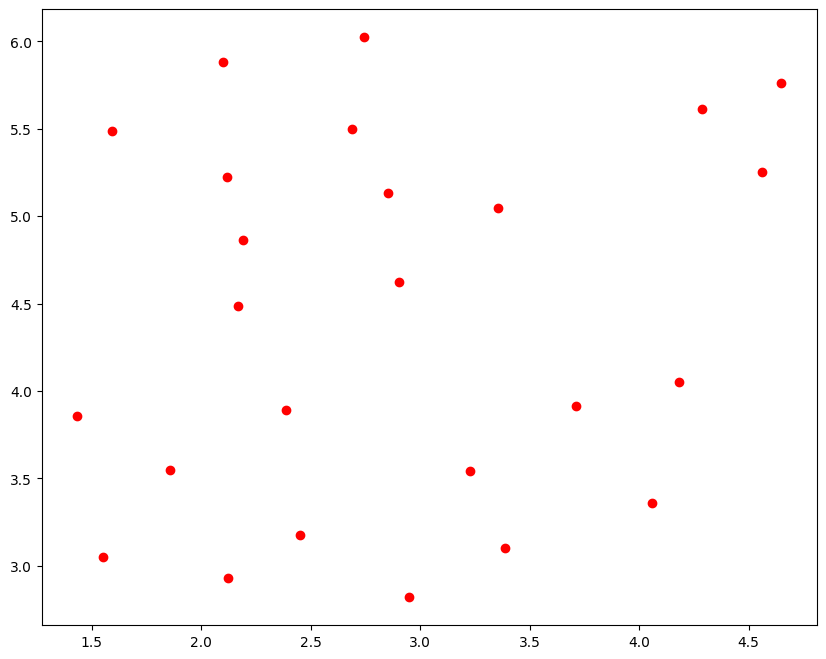

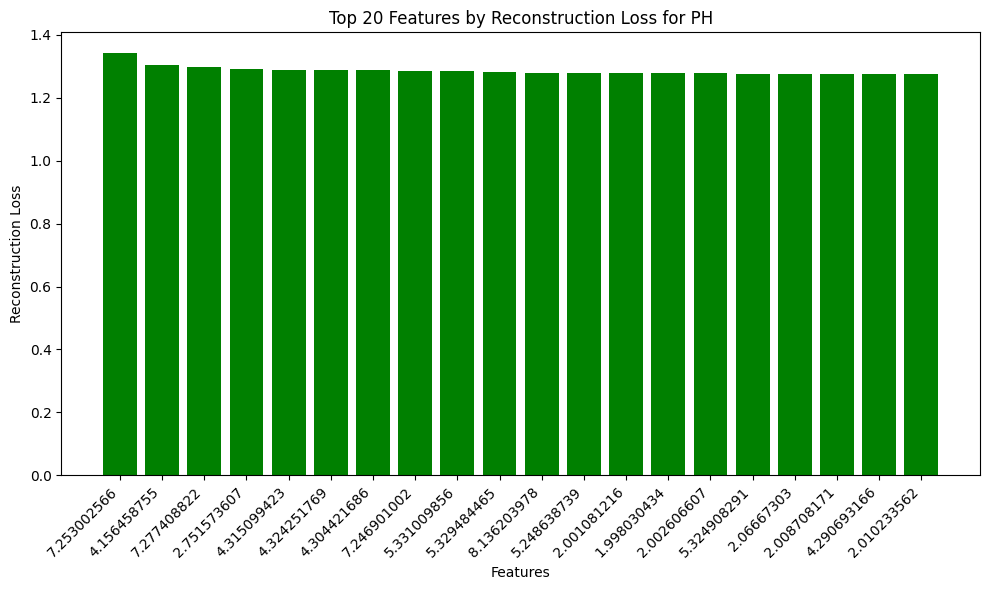

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


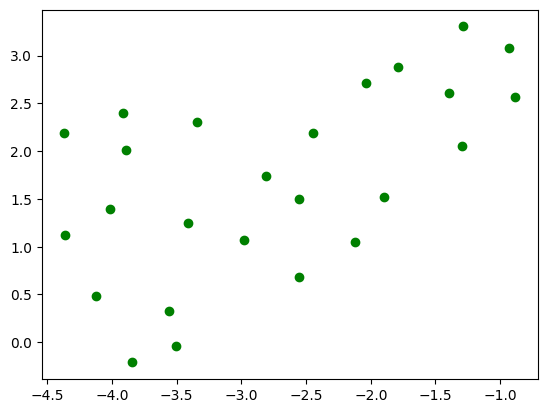

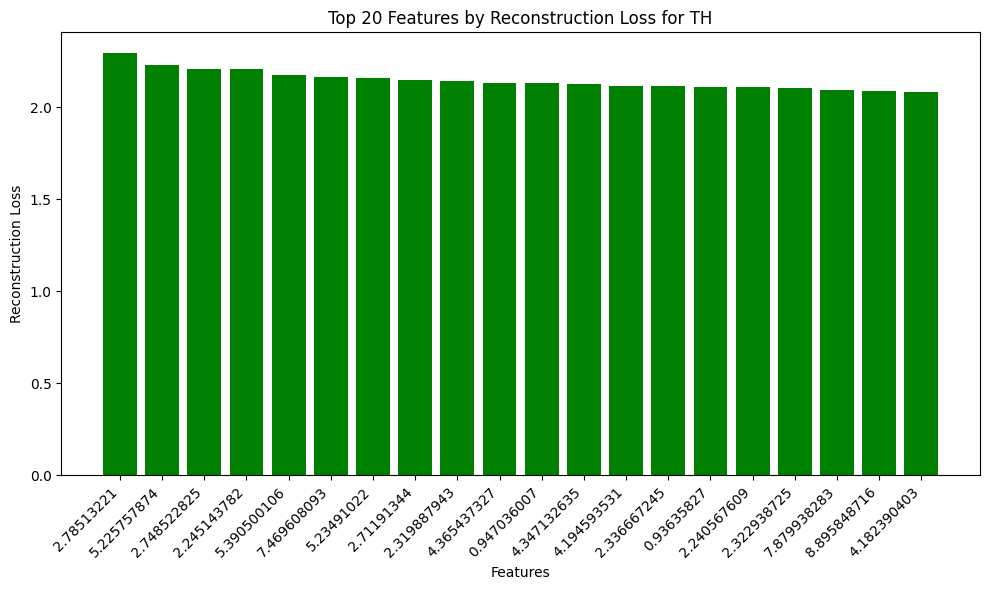

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


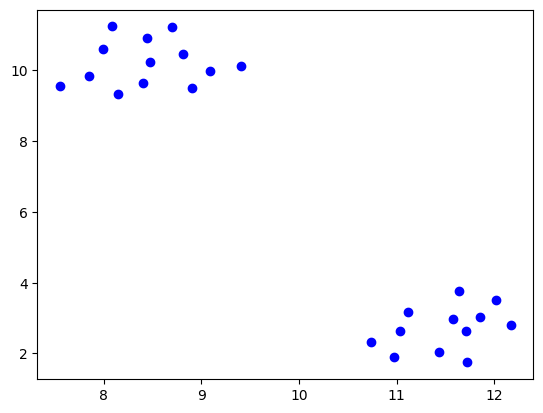

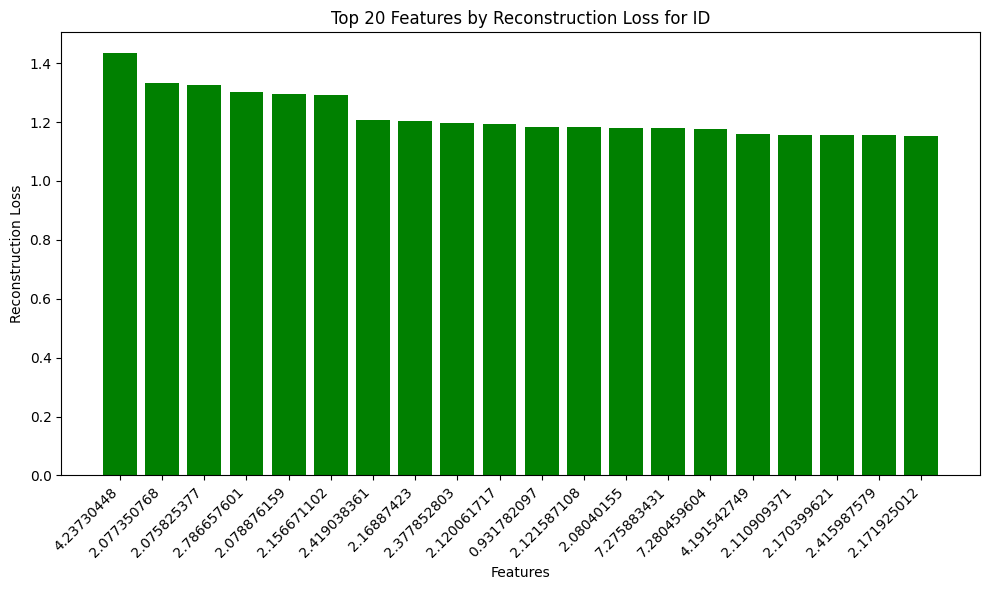

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


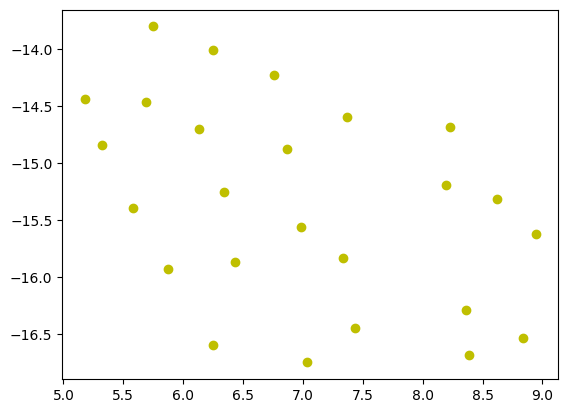

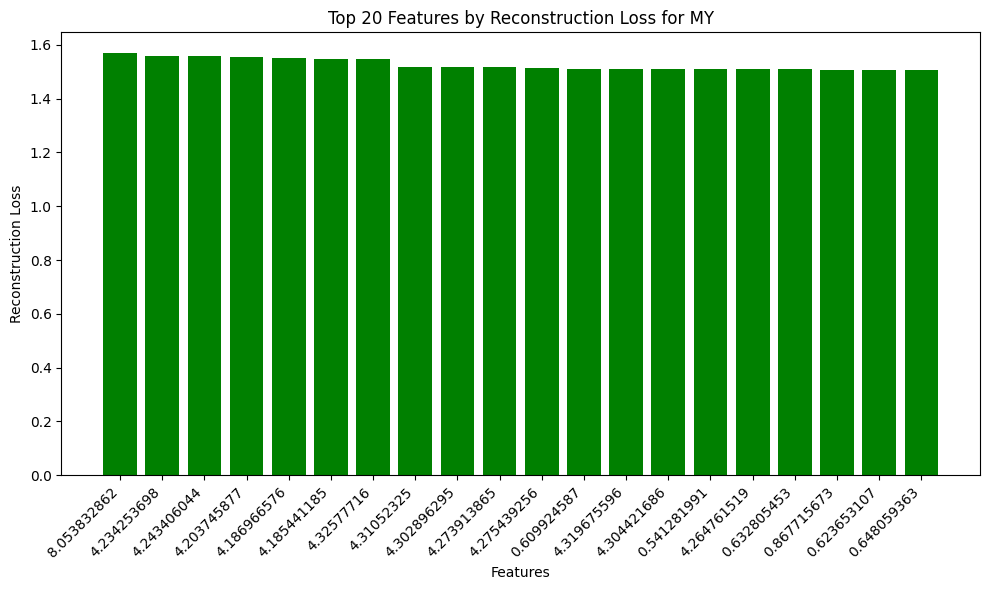

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


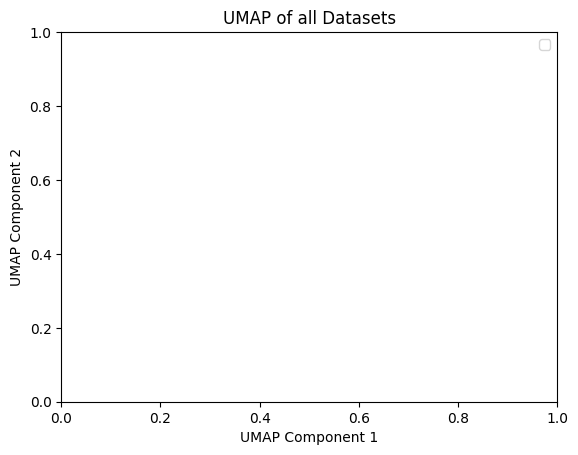

In [8]:
##Reconstruction Loss
!pip install umap-learn
from sklearn.preprocessing import StandardScaler
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define top_n for feature importance
top_n = 20

# Assuming 'dataframes' is your dictionary of datasets
plt.figure(figsize=(10, 8))

colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        # Normalize numerical columns
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)

        # Apply UMAP
        reducer = umap.UMAP(n_components=2, random_state=42)
        embedding = reducer.fit_transform(x_scaled)

        # Visualize UMAP
        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

        # **Feature Importance with Reconstruction Loss for UMAP**
        # Inverse transform to reconstruct original data from the embedding
        x_reconstructed = reducer.inverse_transform(embedding)

        # Calculate reconstruction loss for each feature
        reconstruction_loss = np.mean((x_scaled - x_reconstructed) ** 2, axis=0)

        # Create DataFrame for feature importance and sort by reconstruction loss
        importance_df = pd.DataFrame({
            'Feature': numerical_cols,
            'Reconstruction Loss': reconstruction_loss
        }).sort_values(by='Reconstruction Loss', ascending=False)

        # Show only top N features based on reconstruction loss
        top_features = importance_df.head(top_n)

        # Plot top N features
        plt.figure(figsize=(10, 6))
        plt.bar(top_features['Feature'], top_features['Reconstruction Loss'], color='g')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top {top_n} Features by Reconstruction Loss for {name}')
        plt.ylabel('Reconstruction Loss')
        plt.xlabel('Features')
        plt.tight_layout()
        plt.show()

# Final UMAP plot for comparison
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of all Datasets')
plt.legend()
plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

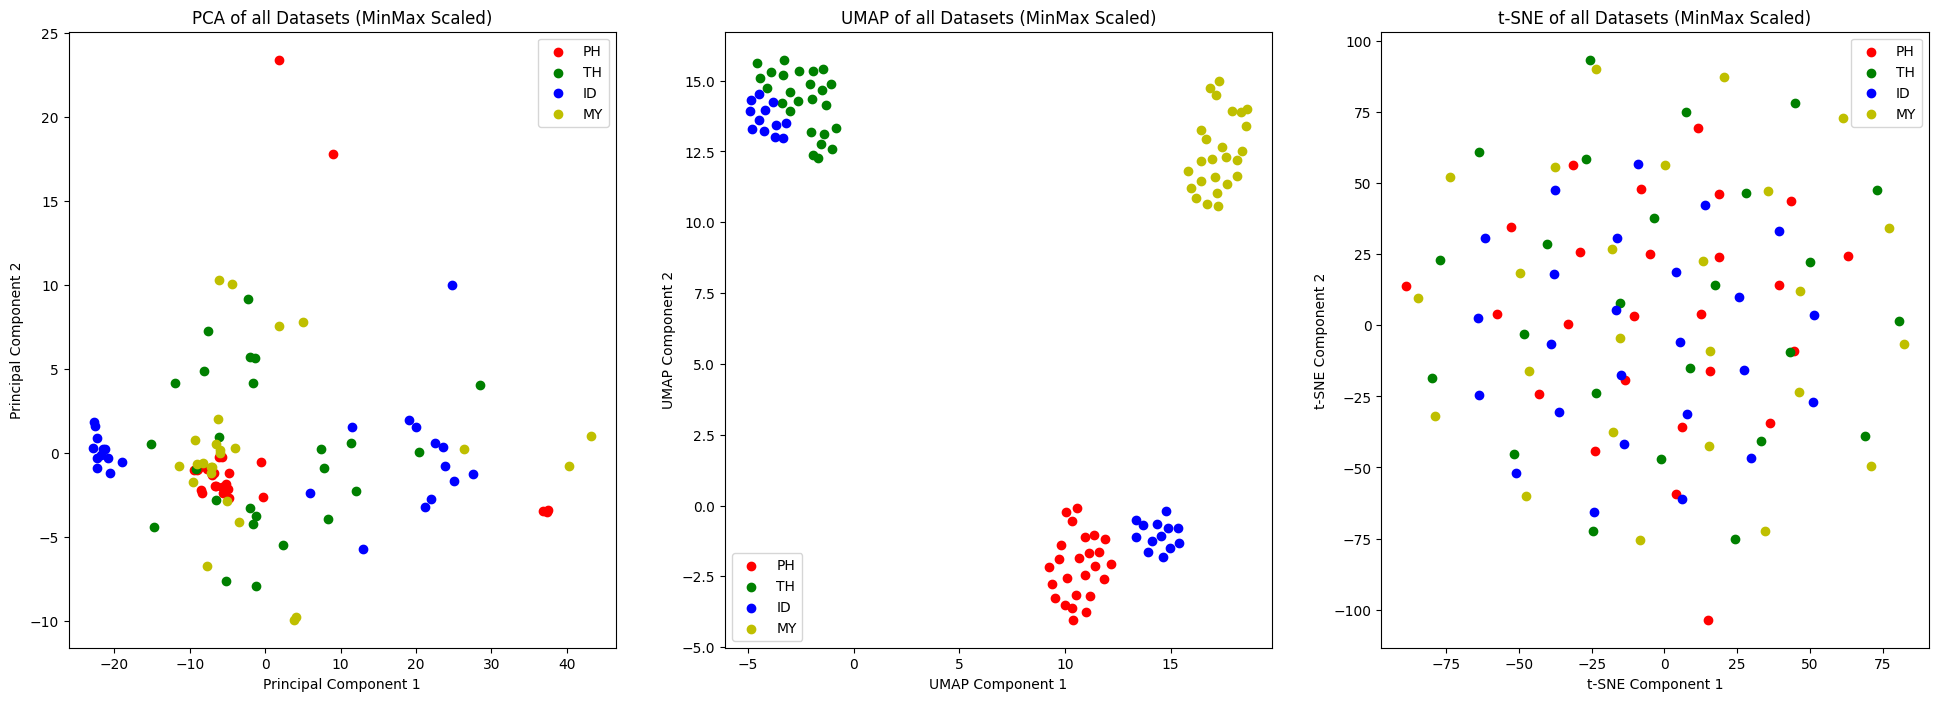

In [9]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import umap
from sklearn.manifold import TSNE

# Assuming `dataframes` is a dictionary of DataFrames
# Replace this with your actual DataFrames
# Example:
# dataframes = {'dataset1': df1, 'dataset2': df2, ...}

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE
plt.figure(figsize=(24, 8))

# PCA plot
plt.subplot(1, 3, 1)
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # MinMaxScaler
        scaler = MinMaxScaler()
        x_scaled = scaler.fit_transform(x)

        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(x_scaled)
        plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of all Datasets (MinMax Scaled)')
plt.legend()

# UMAP plot
plt.subplot(1, 3, 2)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # MinMaxScaler
        scaler = MinMaxScaler()
        x_scaled = scaler.fit_transform(x)

        reducer = umap.UMAP(n_components=2, random_state=42)  # Initialize UMAP
        embedding = reducer.fit_transform(x_scaled)  # Fit and transform the data

        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of all Datasets (MinMax Scaled)')
plt.legend()

# t-SNE plot
plt.subplot(1, 3, 3)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # MinMaxScaler
        scaler = MinMaxScaler()
        x_scaled = scaler.fit_transform(x)

        # Dynamically adjust perplexity based on the number of samples
        n_samples = x_scaled.shape[0]
        perplexity = min(30, n_samples - 1)

        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)  # Initialize t-SNE
        tsne_results = tsne.fit_transform(x_scaled)  # Fit and transform the data

        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of all Datasets (MinMax Scaled)')
plt.legend()

plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

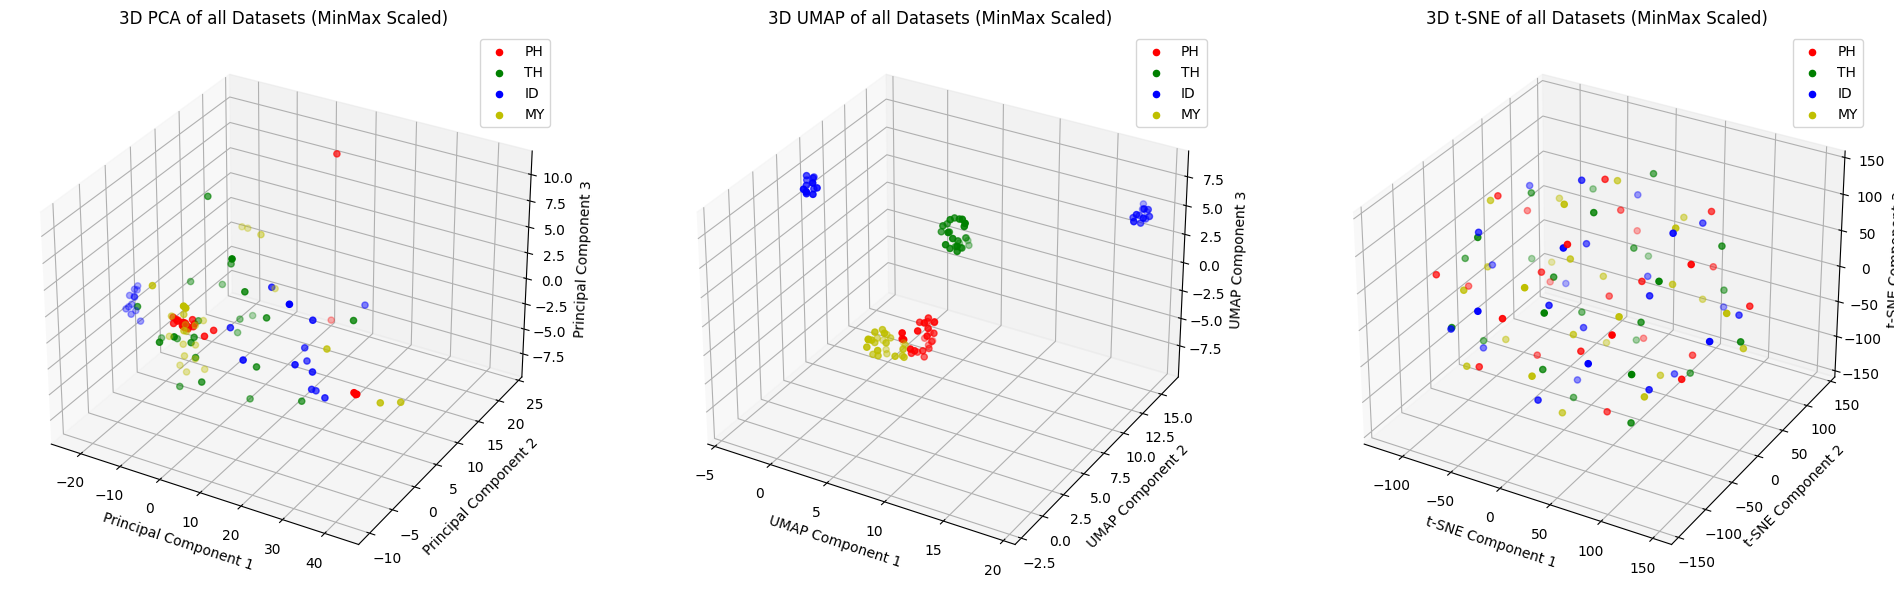

In [10]:
# prompt: Do for the 3D PCA, UMAP and t-SNE above

# 3D Visualization for PCA, UMAP, and t-SNE
plt.figure(figsize=(24, 8))

# 3D PCA plot
ax = plt.subplot(1, 3, 1, projection='3d')
colors = ['r', 'g', 'b', 'y']
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = MinMaxScaler() # Use MinMaxScaler here
        x_scaled = scaler.fit_transform(x)
        pca = PCA(n_components=3)  # Project to 3 components
        principalComponents = pca.fit_transform(x_scaled)
        ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2], c=colors[i], label=name)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of all Datasets (MinMax Scaled)')
ax.legend()


# 3D UMAP plot
ax = plt.subplot(1, 3, 2, projection='3d')
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = MinMaxScaler() # Use MinMaxScaler here
        x_scaled = scaler.fit_transform(x)
        reducer = umap.UMAP(n_components=3, random_state=42)
        embedding = reducer.fit_transform(x_scaled)
        ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=colors[i], label=name)

ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
ax.set_title('3D UMAP of all Datasets (MinMax Scaled)')
ax.legend()


# 3D t-SNE plot
ax = plt.subplot(1, 3, 3, projection='3d')
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = MinMaxScaler() # Use MinMaxScaler here
        x_scaled = scaler.fit_transform(x)
        n_samples = x_scaled.shape[0]
        perplexity = min(30, n_samples - 1)
        tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
        tsne_results = tsne.fit_transform(x_scaled)
        ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=colors[i], label=name)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D t-SNE of all Datasets (MinMax Scaled)')
ax.legend()

plt.show()


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


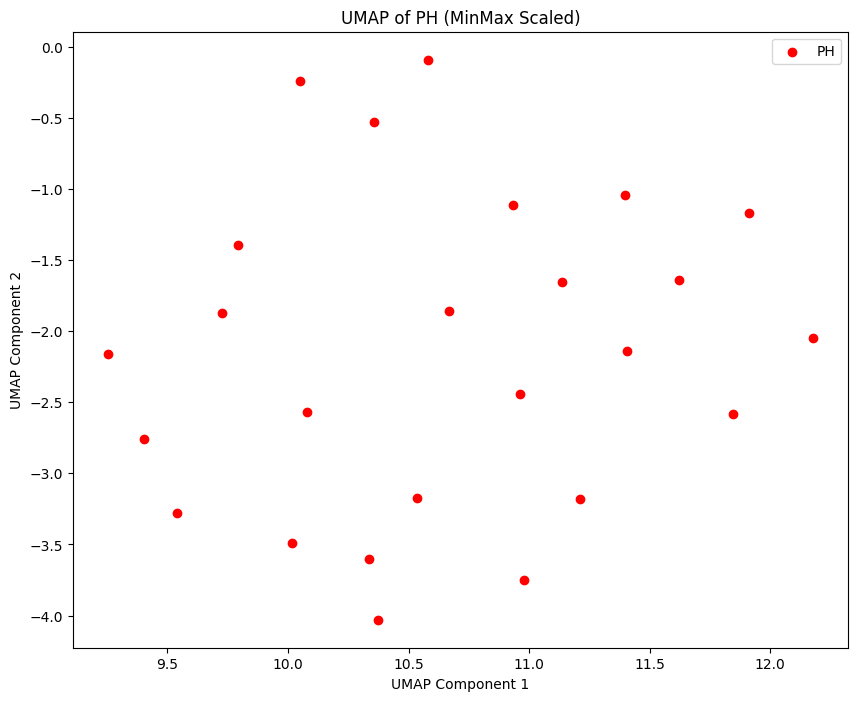

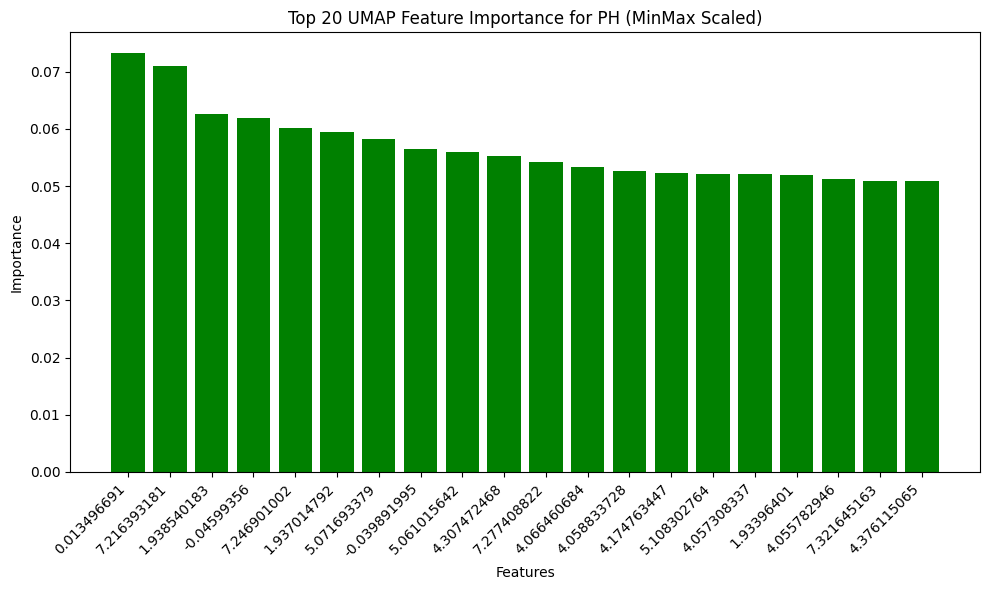

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


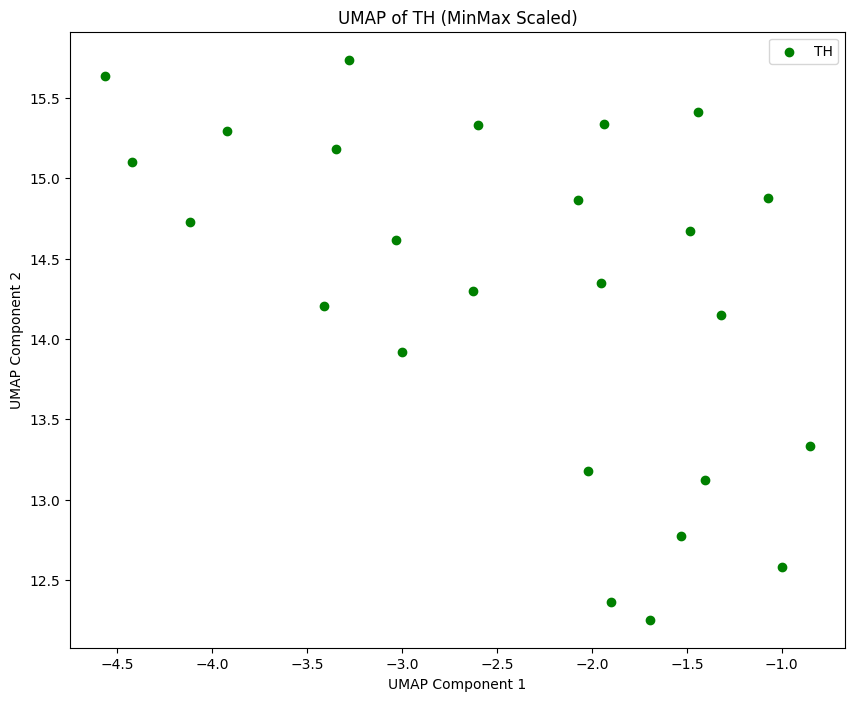

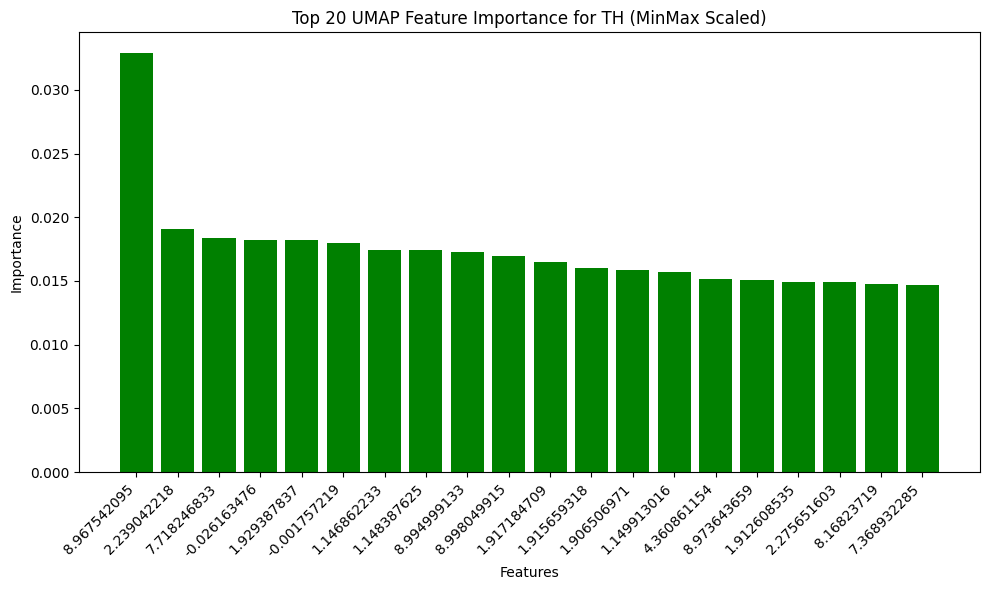

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


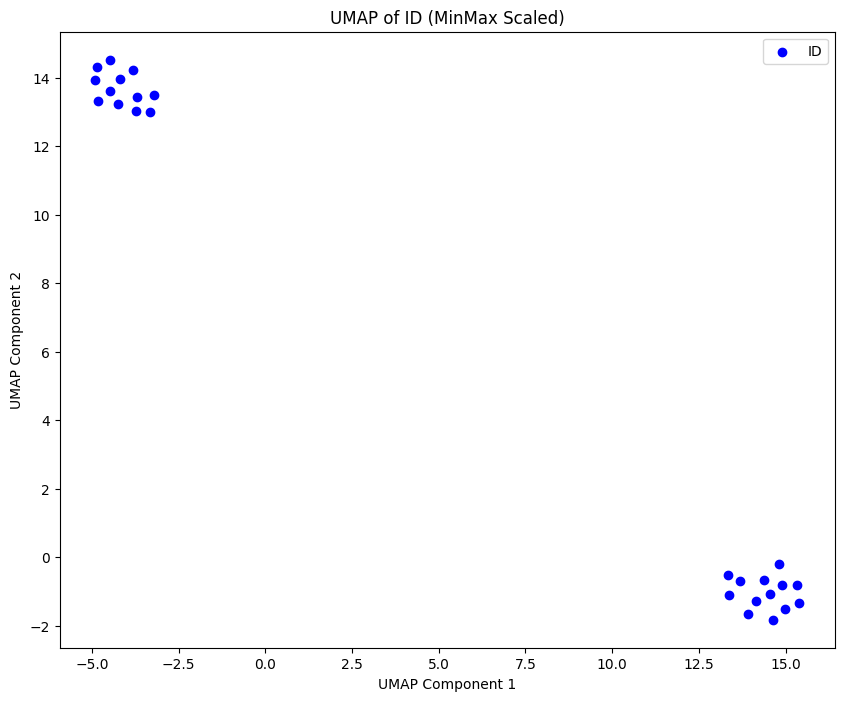

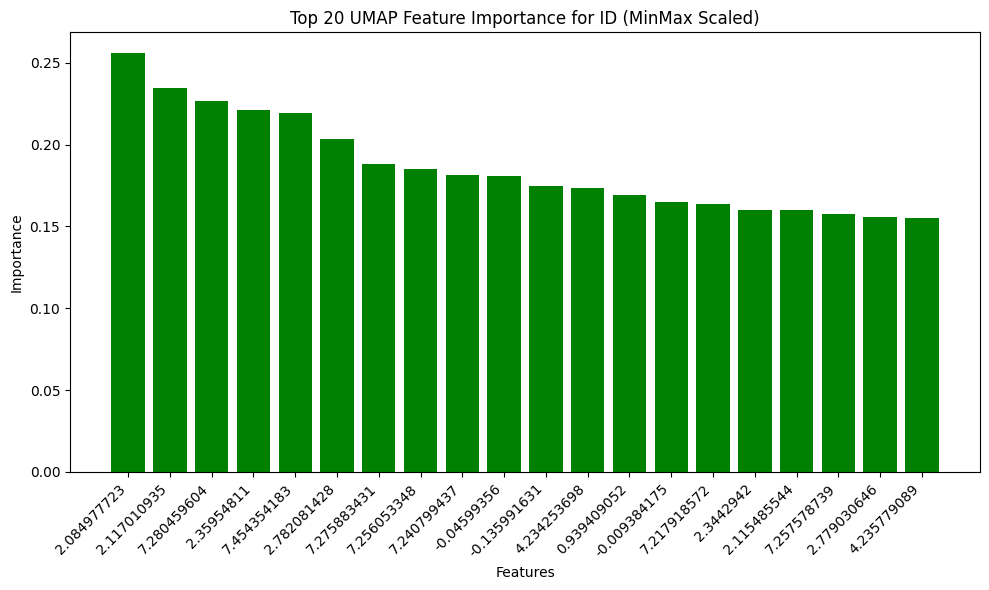

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


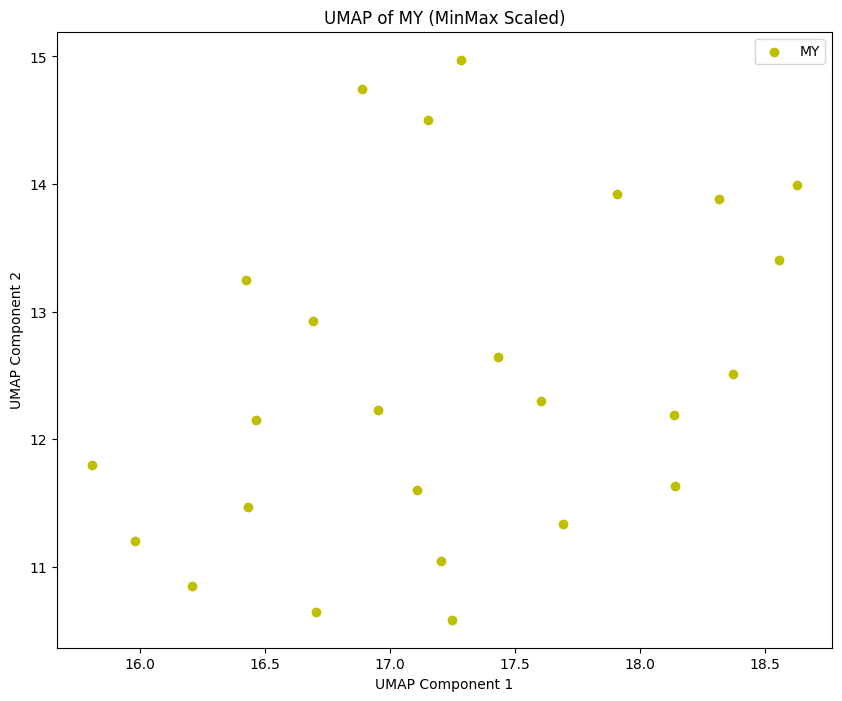

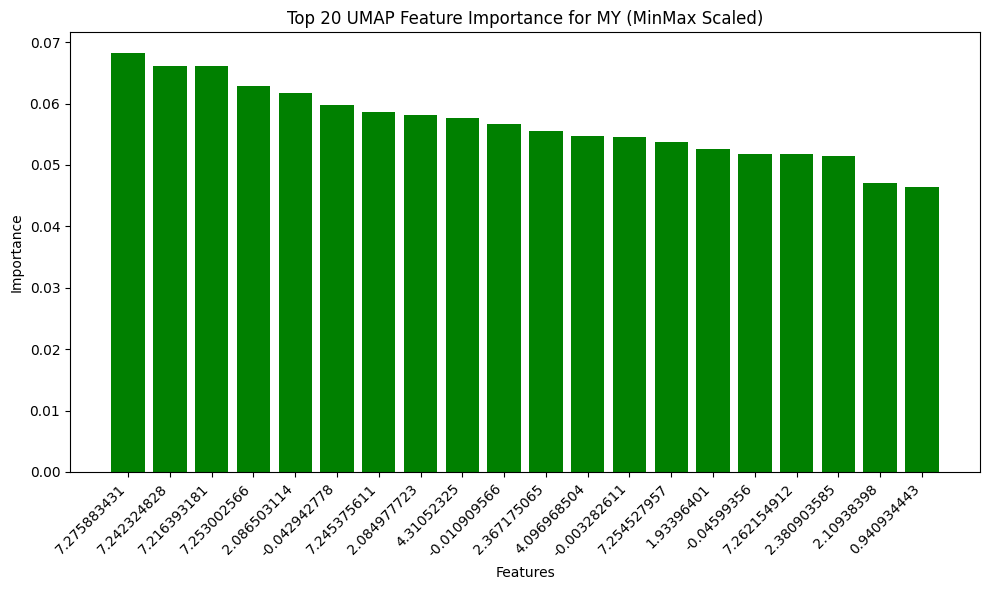

In [11]:
!pip install umap-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define top_n for feature importance
top_n = 20

# UMAP plot for all datasets with feature importance analysis
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # MinMaxScaler
        scaler = MinMaxScaler()
        x_scaled = scaler.fit_transform(x)

        # Apply UMAP
        reducer = umap.UMAP(n_components=2, random_state=42)
        embedding = reducer.fit_transform(x_scaled)

        # Visualize UMAP
        plt.figure(figsize=(10, 8))
        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)
        plt.xlabel('UMAP Component 1')
        plt.ylabel('UMAP Component 2')
        plt.title(f'UMAP of {name} (MinMax Scaled)')
        plt.legend()
        plt.show()

        # **Feature Importance for UMAP**
        surrogate_model = LinearRegression()
        surrogate_model.fit(x_scaled, embedding)

        # Calculate feature importance
        feature_importance = np.abs(surrogate_model.coef_).mean(axis=0)

        # Create DataFrame for feature importance
        importance_df = pd.DataFrame({
            'Feature': numerical_cols,
            'Importance': feature_importance
        }).sort_values(by='Importance', ascending=False)

        # Show only top N features
        top_features = importance_df.head(top_n)

        # Plot top N features
        plt.figure(figsize=(10, 6))
        plt.bar(top_features['Feature'], top_features['Importance'], color='g')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top {top_n} UMAP Feature Importance for {name} (MinMax Scaled)')
        plt.ylabel('Importance')
        plt.xlabel('Features')
        plt.tight_layout()
        plt.show()



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


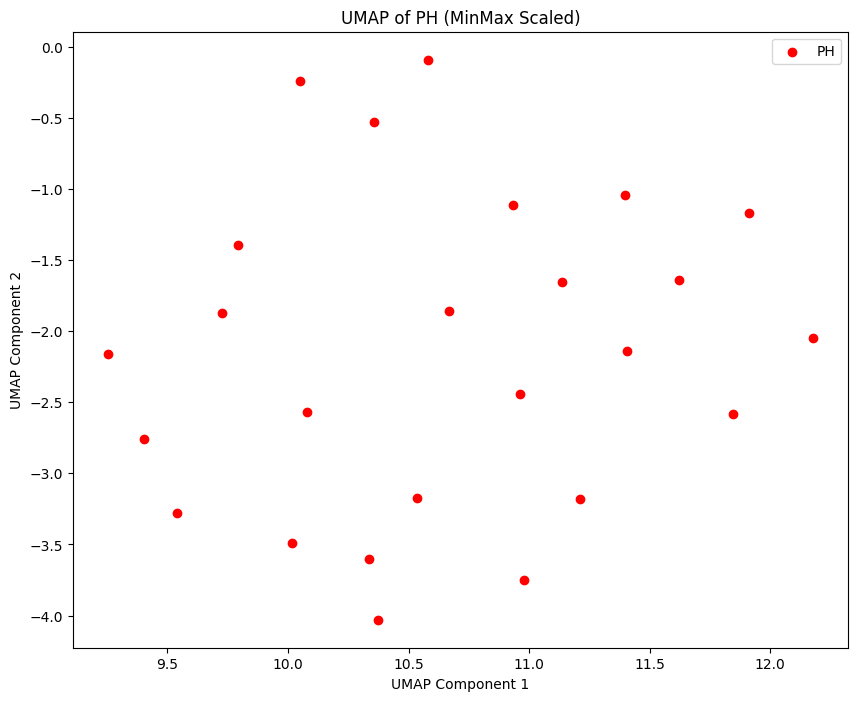

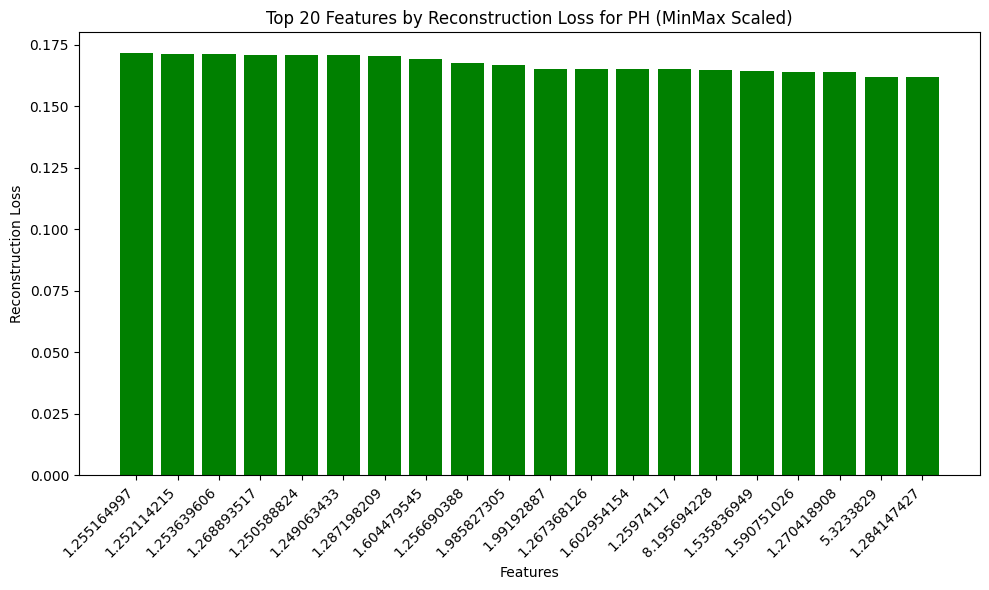

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


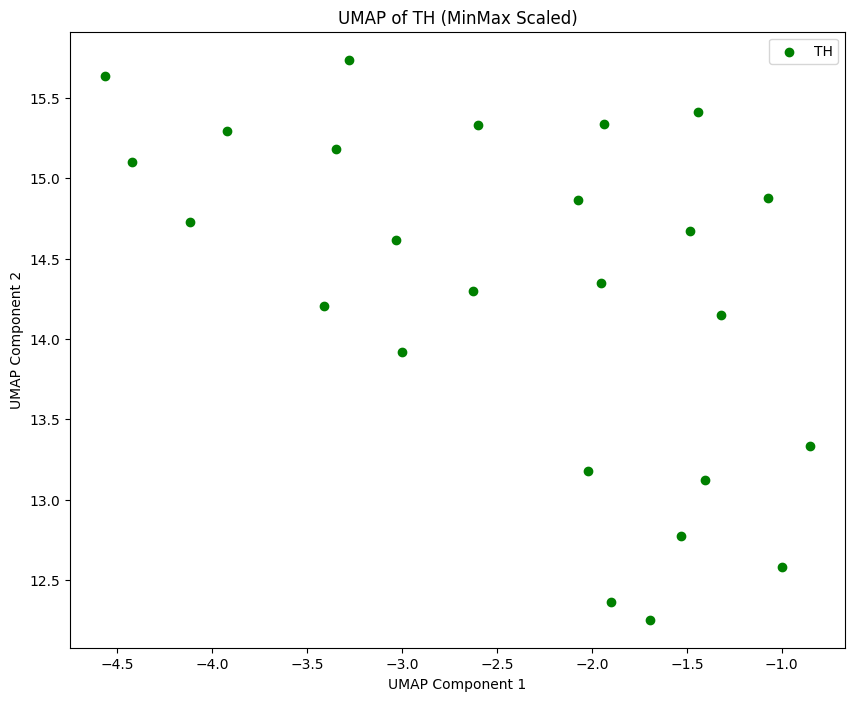

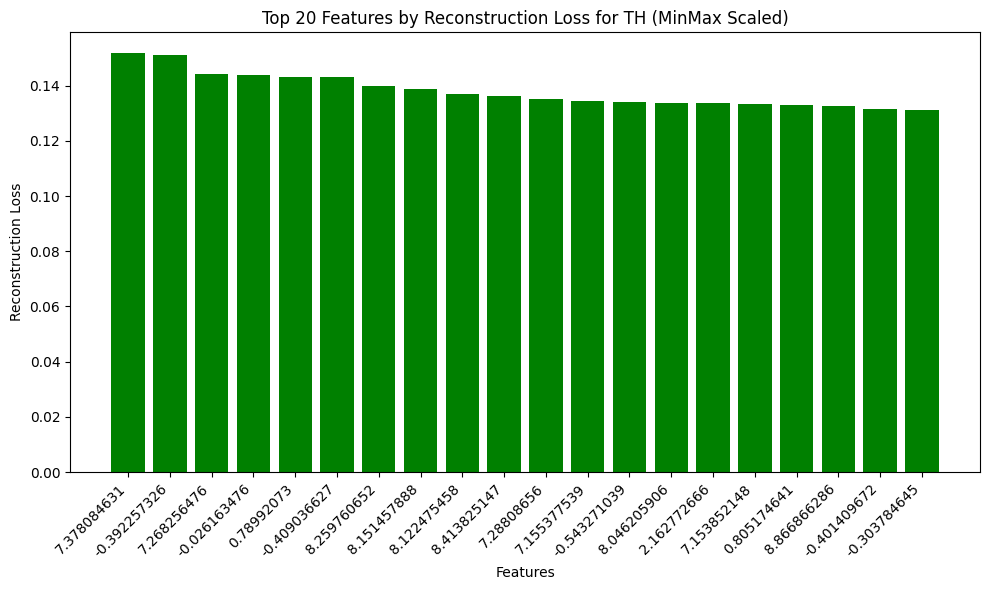

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


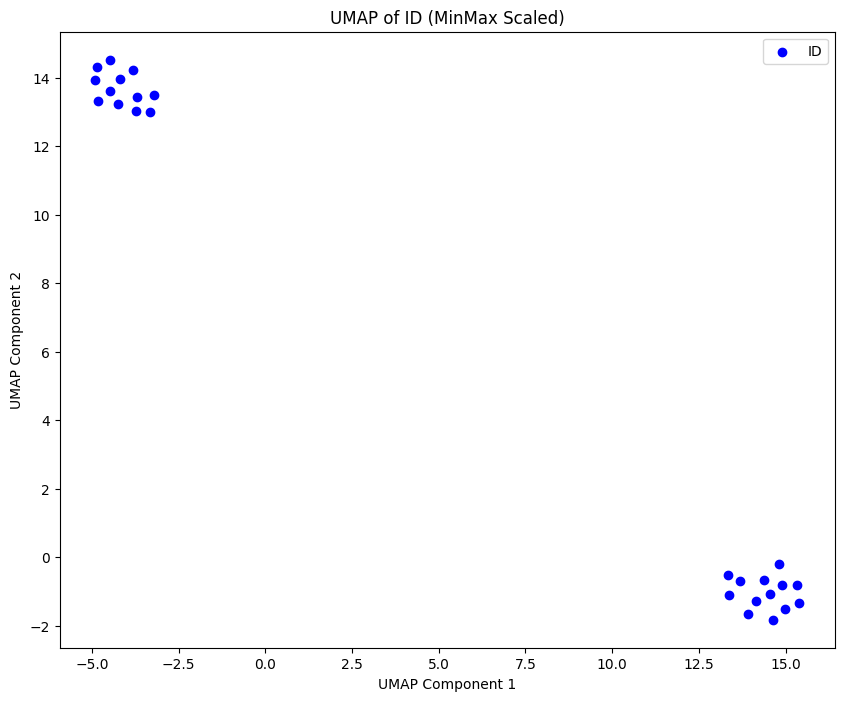

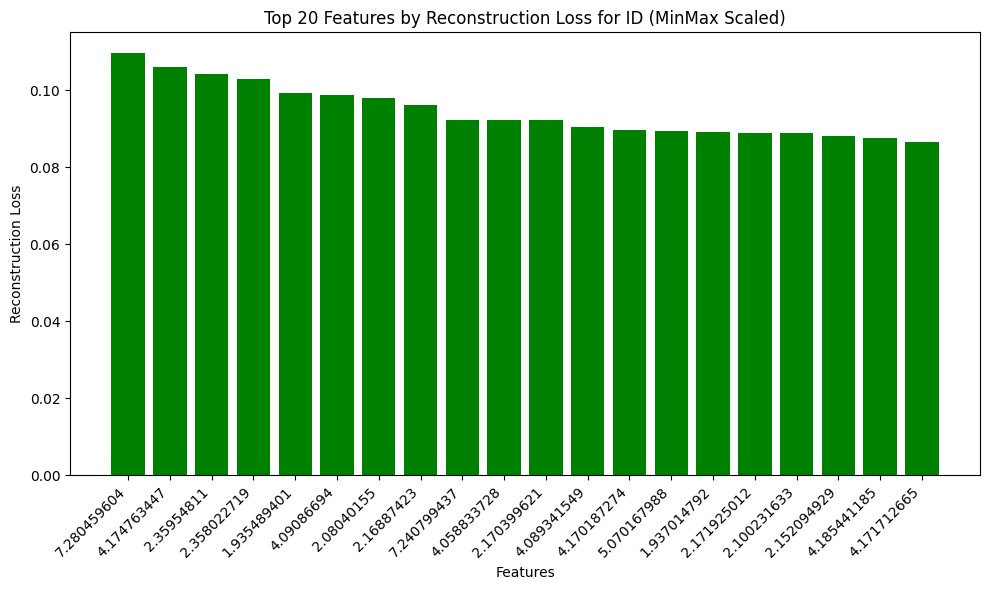

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


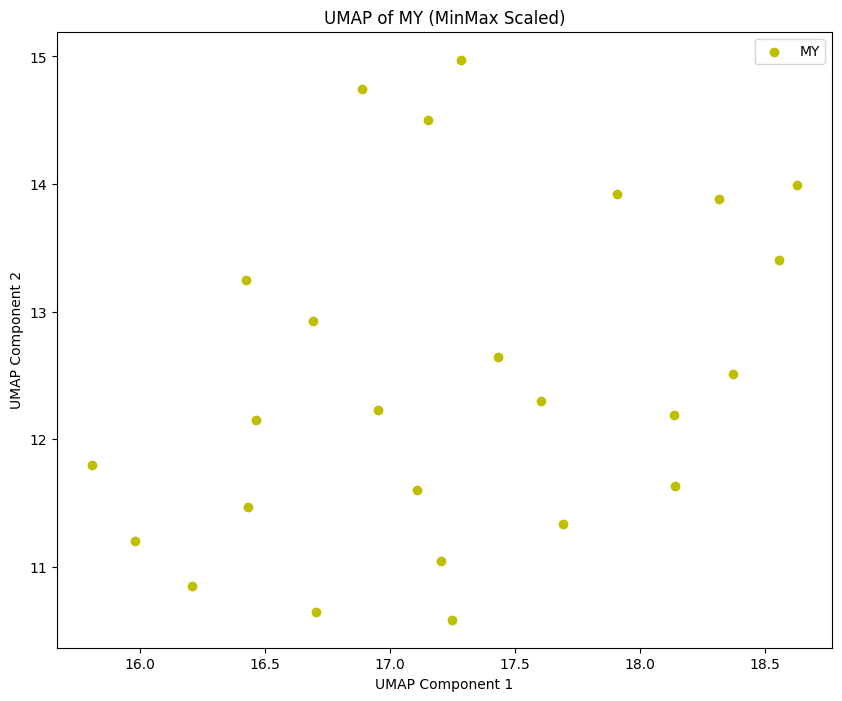

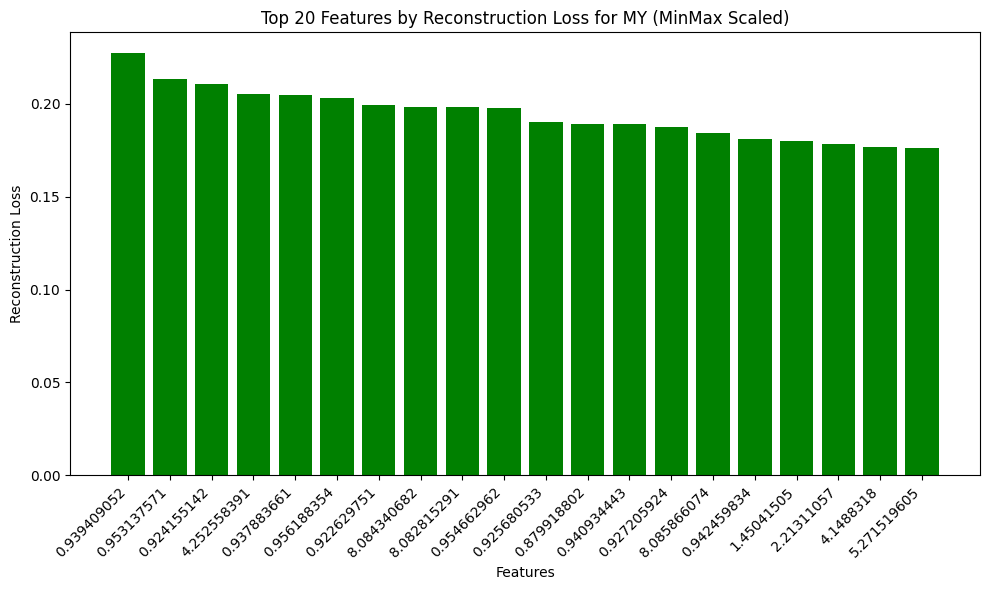

In [12]:
##Reconstruction Loss

!pip install umap-learn
from sklearn.preprocessing import MinMaxScaler
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define top_n for feature importance
top_n = 20

# UMAP plot for all datasets with feature importance analysis
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # MinMaxScaler
        scaler = MinMaxScaler()
        x_scaled = scaler.fit_transform(x)

        # Apply UMAP
        reducer = umap.UMAP(n_components=2, random_state=42)
        embedding = reducer.fit_transform(x_scaled)

        # Visualize UMAP
        plt.figure(figsize=(10, 8))
        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)
        plt.xlabel('UMAP Component 1')
        plt.ylabel('UMAP Component 2')
        plt.title(f'UMAP of {name} (MinMax Scaled)')
        plt.legend()
        plt.show()

        # **Feature Importance with Reconstruction Loss for UMAP**
        # Inverse transform to reconstruct original data from the embedding
        x_reconstructed = reducer.inverse_transform(embedding)

        # Calculate reconstruction loss (MSE for each feature)
        reconstruction_loss = np.mean((x_scaled - x_reconstructed) ** 2, axis=0)

        # Create DataFrame for feature importance
        importance_df = pd.DataFrame({
            'Feature': numerical_cols,
            'Reconstruction Loss': reconstruction_loss
        }).sort_values(by='Reconstruction Loss', ascending=False)

        # Show only top N features
        top_features = importance_df.head(top_n)

        # Plot top N features
        plt.figure(figsize=(10, 6))
        plt.bar(top_features['Feature'], top_features['Reconstruction Loss'], color='g')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top {top_n} Features by Reconstruction Loss for {name} (MinMax Scaled)')
        plt.ylabel('Reconstruction Loss')
        plt.xlabel('Features')
        plt.tight_layout()
        plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

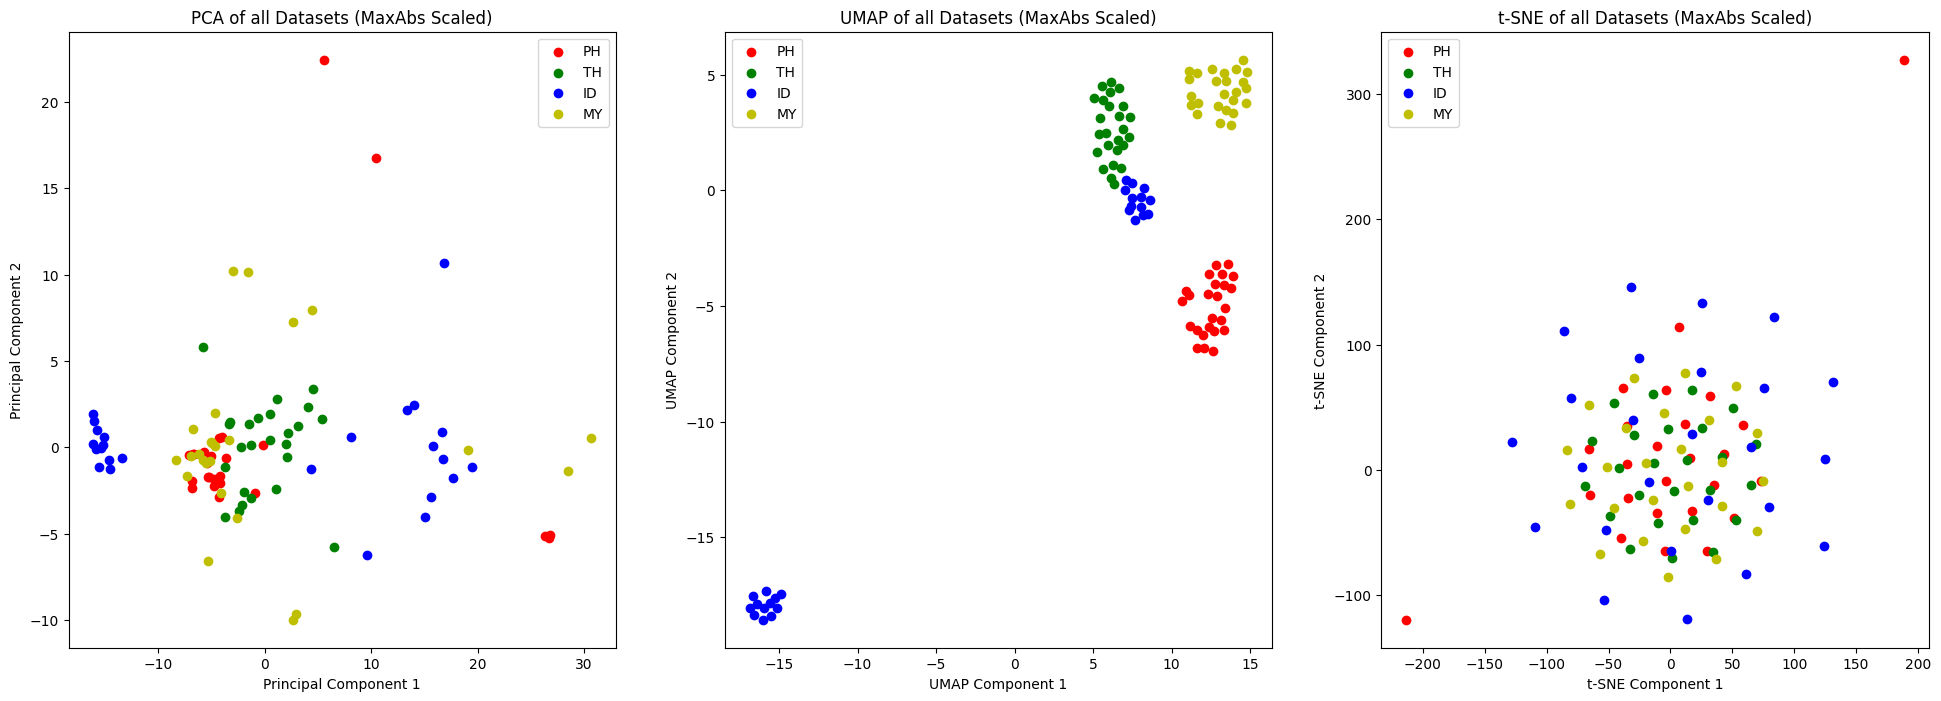

In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt
import umap
from sklearn.manifold import TSNE

# Assuming `dataframes` is a dictionary of DataFrames
# Replace this with your actual DataFrames
# Example:
# dataframes = {'dataset1': df1, 'dataset2': df2, ...}

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE
plt.figure(figsize=(24, 8))

# PCA plot
plt.subplot(1, 3, 1)
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # MaxAbsScaler
        scaler = MaxAbsScaler()
        x_scaled = scaler.fit_transform(x)

        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(x_scaled)
        plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of all Datasets (MaxAbs Scaled)')
plt.legend()

# UMAP plot
plt.subplot(1, 3, 2)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # MaxAbsScaler
        scaler = MaxAbsScaler()
        x_scaled = scaler.fit_transform(x)

        reducer = umap.UMAP(n_components=2, random_state=42)  # Initialize UMAP
        embedding = reducer.fit_transform(x_scaled)  # Fit and transform the data

        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of all Datasets (MaxAbs Scaled)')
plt.legend()

# t-SNE plot
plt.subplot(1, 3, 3)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # MaxAbsScaler
        scaler = MaxAbsScaler()
        x_scaled = scaler.fit_transform(x)

        # Dynamically adjust perplexity based on the number of samples
        n_samples = x_scaled.shape[0]
        perplexity = min(30, n_samples - 1)

        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)  # Initialize t-SNE
        tsne_results = tsne.fit_transform(x_scaled)  # Fit and transform the data

        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of all Datasets (MaxAbs Scaled)')
plt.legend()

plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

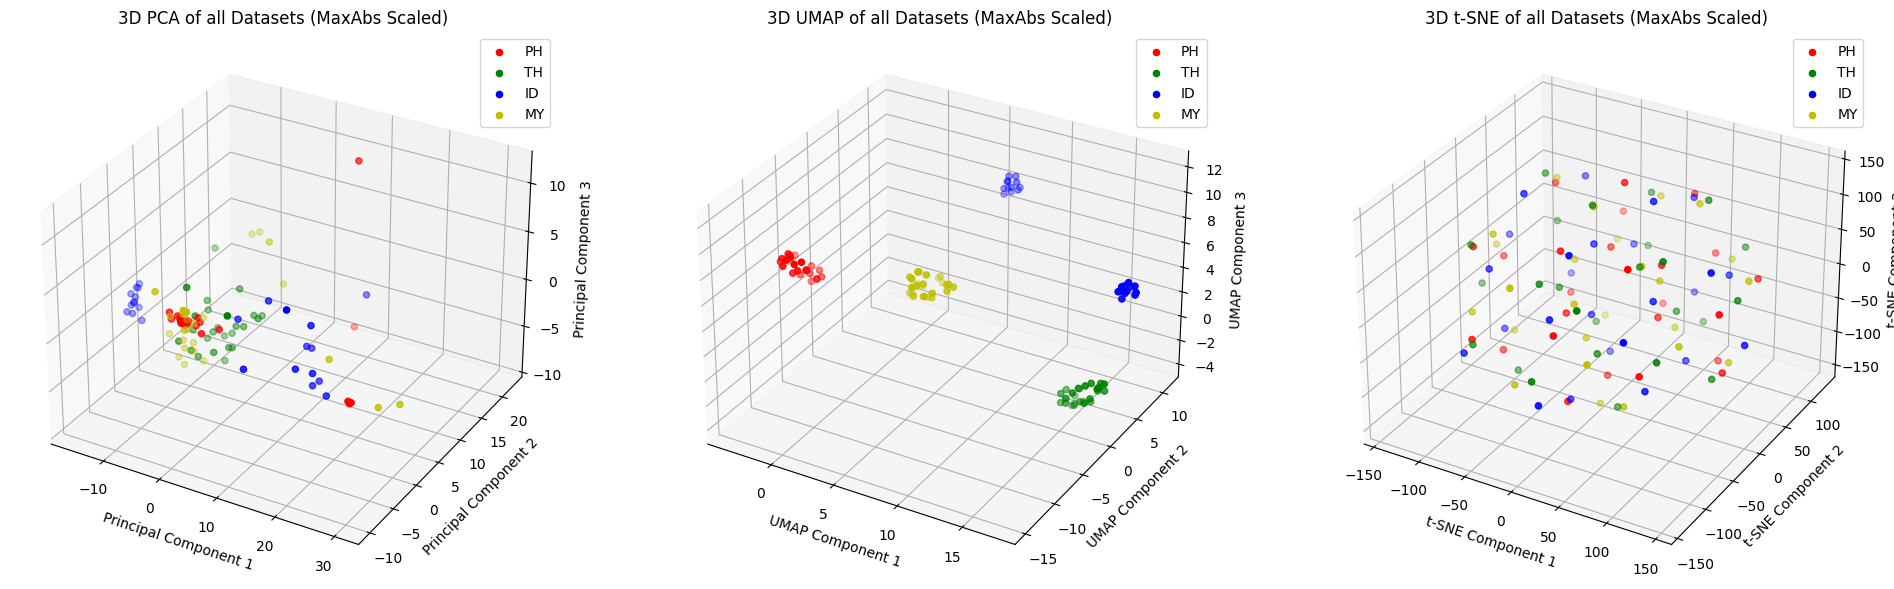

In [14]:
# prompt: Do for the 3D PCA, UMAP and t-SNE above

# 3D Visualization for PCA, UMAP, and t-SNE with MaxAbsScaler
plt.figure(figsize=(24, 8))

# 3D PCA plot
ax = plt.subplot(1, 3, 1, projection='3d')
colors = ['r', 'g', 'b', 'y']
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = MaxAbsScaler() # Use MaxAbsScaler here
        x_scaled = scaler.fit_transform(x)
        pca = PCA(n_components=3)  # Project to 3 components
        principalComponents = pca.fit_transform(x_scaled)
        ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2], c=colors[i], label=name)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of all Datasets (MaxAbs Scaled)')
ax.legend()


# 3D UMAP plot
ax = plt.subplot(1, 3, 2, projection='3d')
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = MaxAbsScaler() # Use MaxAbsScaler here
        x_scaled = scaler.fit_transform(x)
        reducer = umap.UMAP(n_components=3, random_state=42)
        embedding = reducer.fit_transform(x_scaled)
        ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=colors[i], label=name)

ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
ax.set_title('3D UMAP of all Datasets (MaxAbs Scaled)')
ax.legend()


# 3D t-SNE plot
ax = plt.subplot(1, 3, 3, projection='3d')
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = MaxAbsScaler() # Use MaxAbsScaler here
        x_scaled = scaler.fit_transform(x)
        n_samples = x_scaled.shape[0]
        perplexity = min(30, n_samples - 1)
        tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
        tsne_results = tsne.fit_transform(x_scaled)
        ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=colors[i], label=name)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D t-SNE of all Datasets (MaxAbs Scaled)')
ax.legend()

plt.show()


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


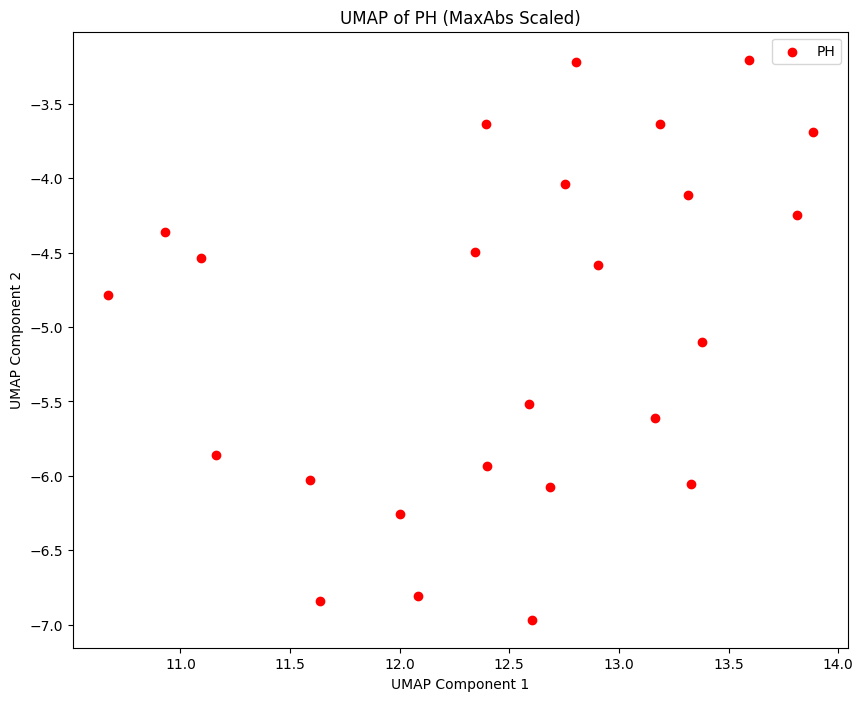

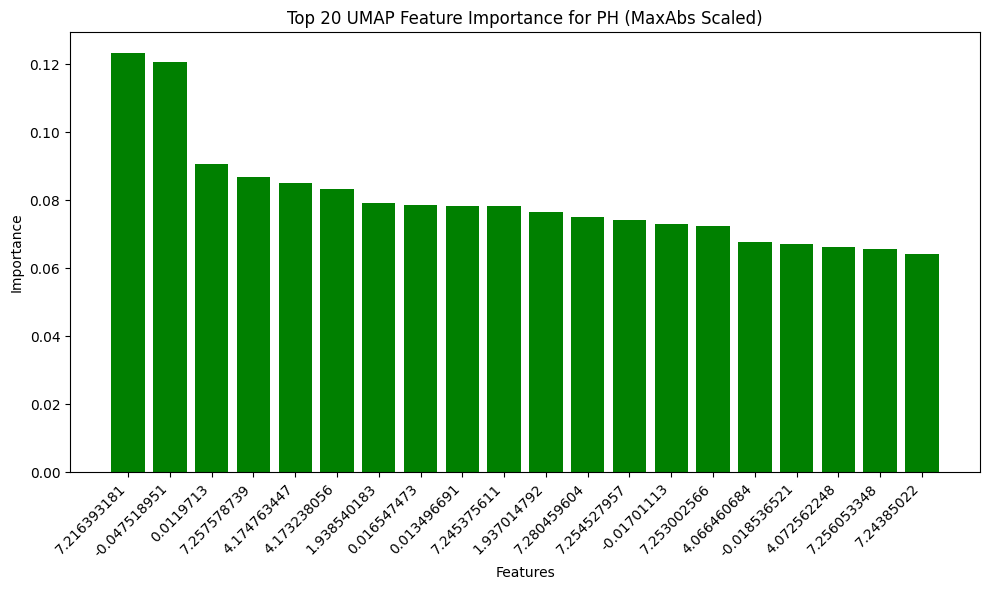

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


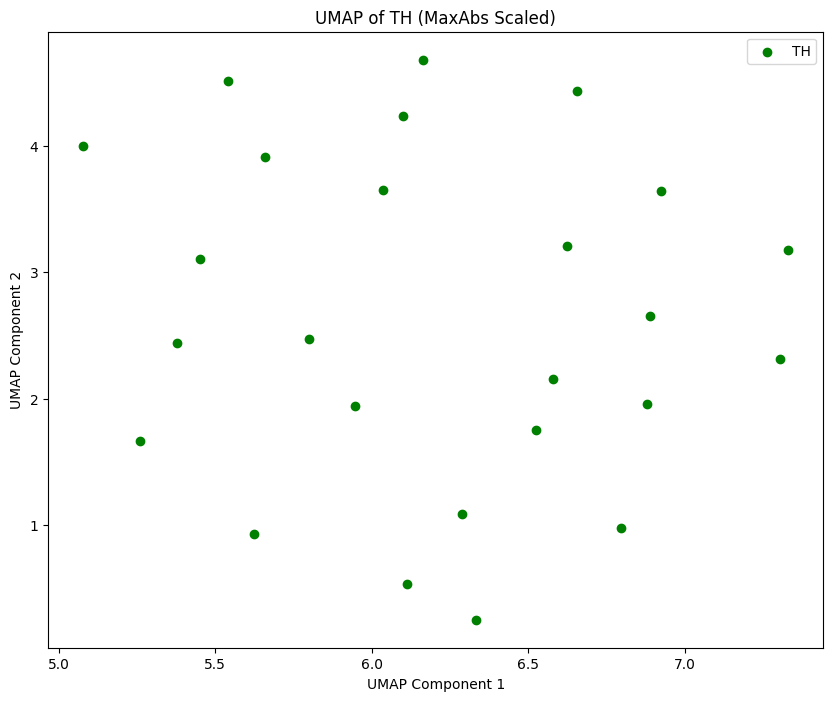

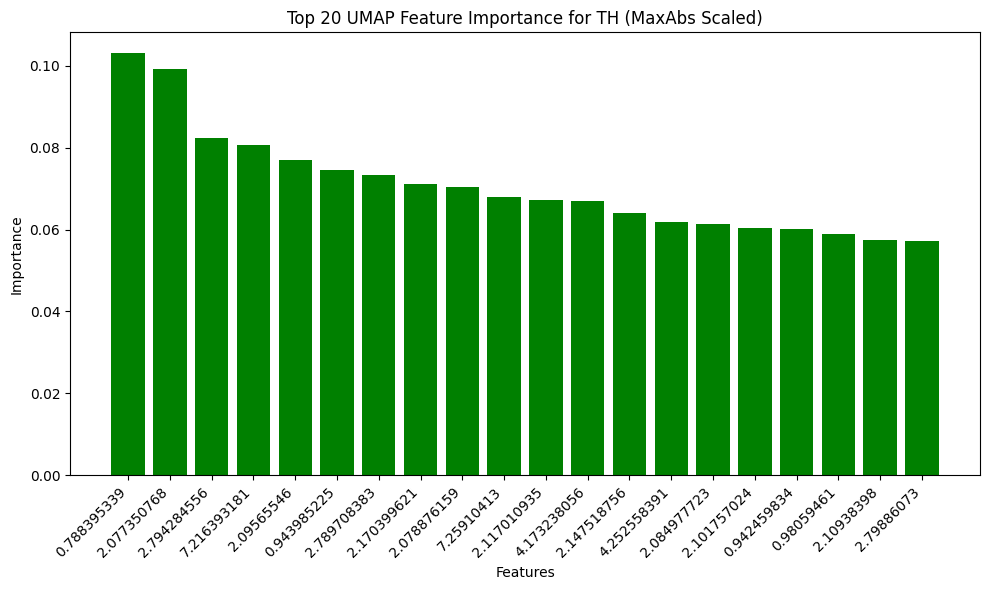

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


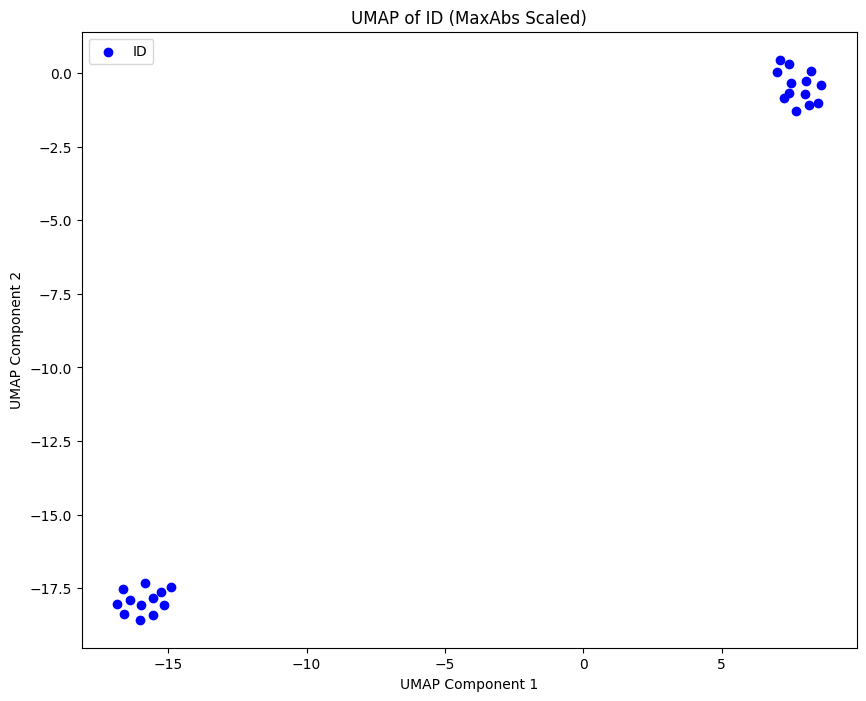

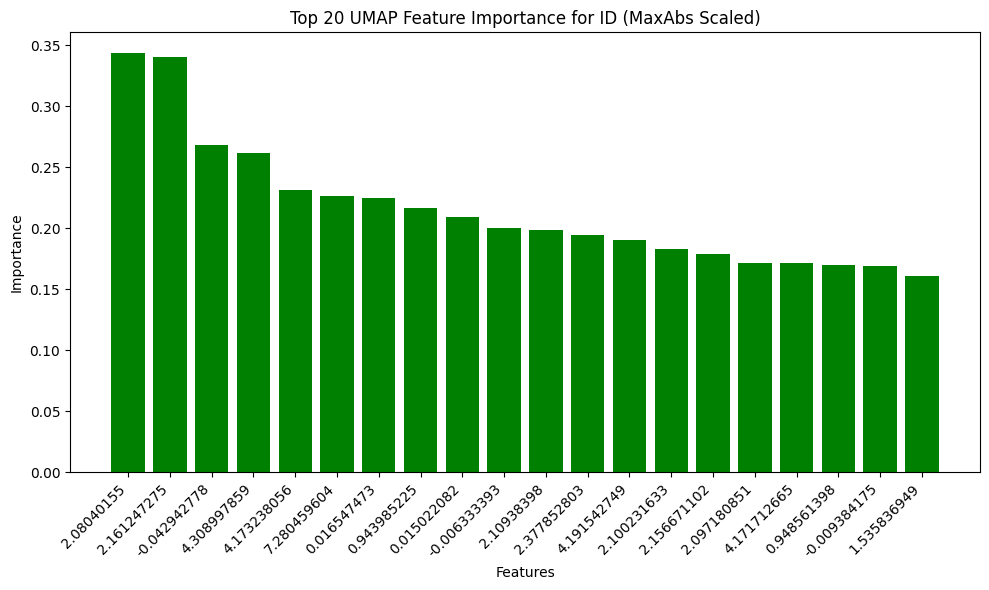

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


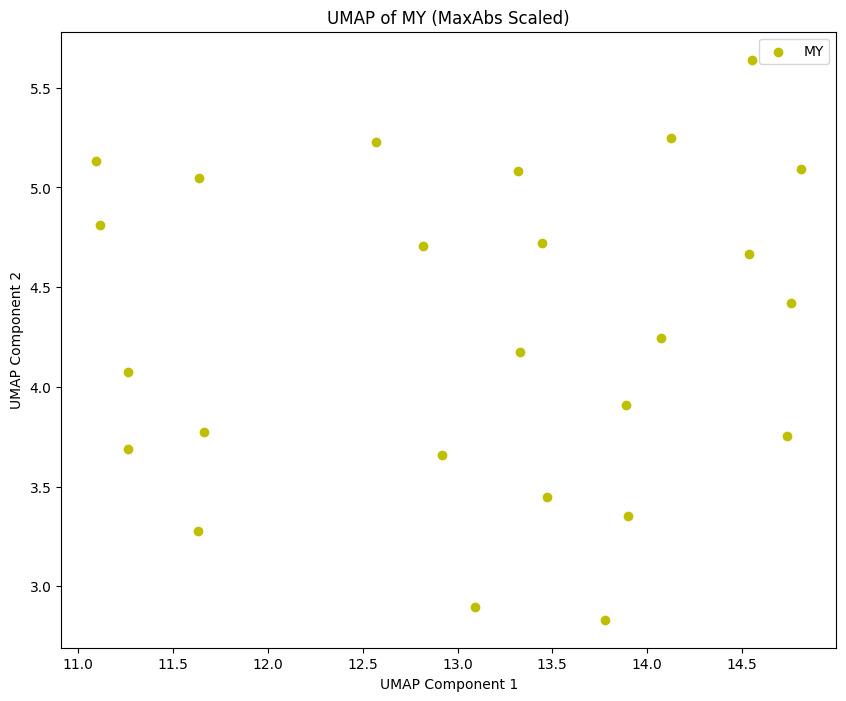

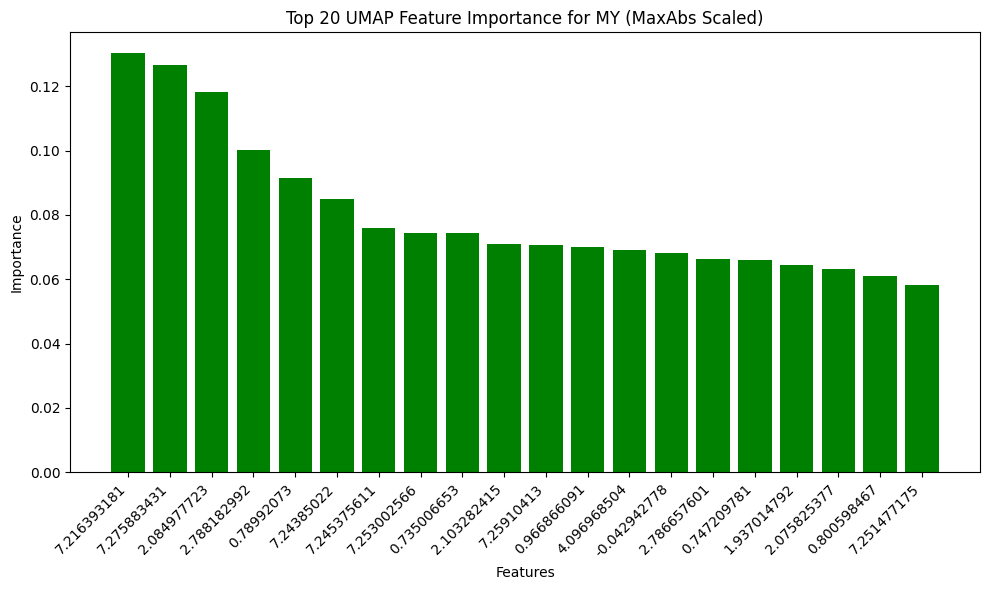

In [15]:
!pip install umap-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MaxAbsScaler
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define top_n for feature importance
top_n = 20

# UMAP plot for all datasets with feature importance analysis
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # MaxAbsScaler
        scaler = MaxAbsScaler()
        x_scaled = scaler.fit_transform(x)

        # Apply UMAP
        reducer = umap.UMAP(n_components=2, random_state=42)
        embedding = reducer.fit_transform(x_scaled)

        # Visualize UMAP
        plt.figure(figsize=(10, 8))
        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)
        plt.xlabel('UMAP Component 1')
        plt.ylabel('UMAP Component 2')
        plt.title(f'UMAP of {name} (MaxAbs Scaled)')
        plt.legend()
        plt.show()

        # **Feature Importance for UMAP**
        surrogate_model = LinearRegression()
        surrogate_model.fit(x_scaled, embedding)

        # Calculate feature importance
        feature_importance = np.abs(surrogate_model.coef_).mean(axis=0)

        # Create DataFrame for feature importance
        importance_df = pd.DataFrame({
            'Feature': numerical_cols,
            'Importance': feature_importance
        }).sort_values(by='Importance', ascending=False)

        # Show only top N features
        top_features = importance_df.head(top_n)

        # Plot top N features
        plt.figure(figsize=(10, 6))
        plt.bar(top_features['Feature'], top_features['Importance'], color='g')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top {top_n} UMAP Feature Importance for {name} (MaxAbs Scaled)')
        plt.ylabel('Importance')
        plt.xlabel('Features')
        plt.tight_layout()
        plt.show()



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


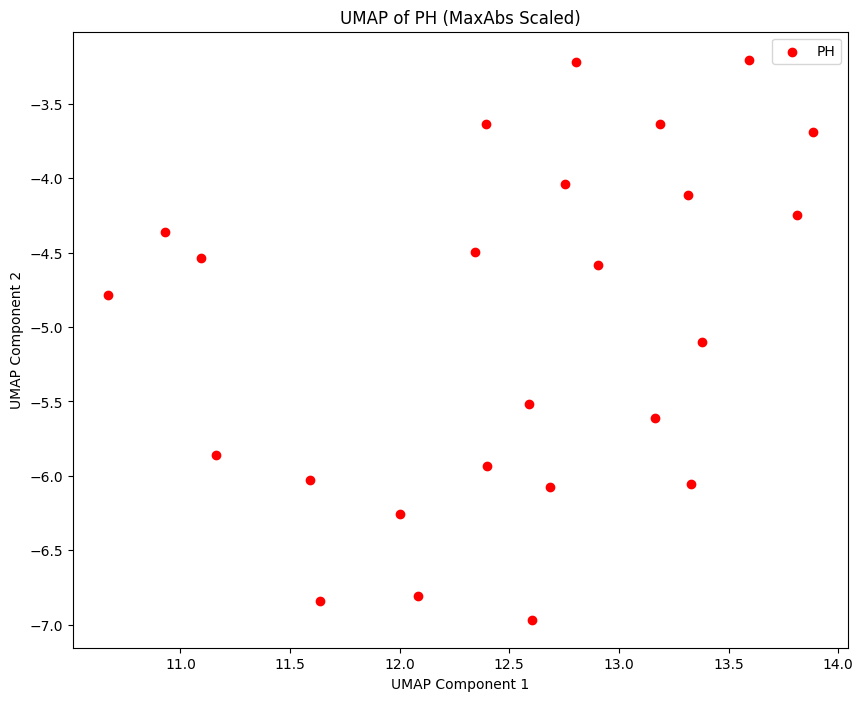

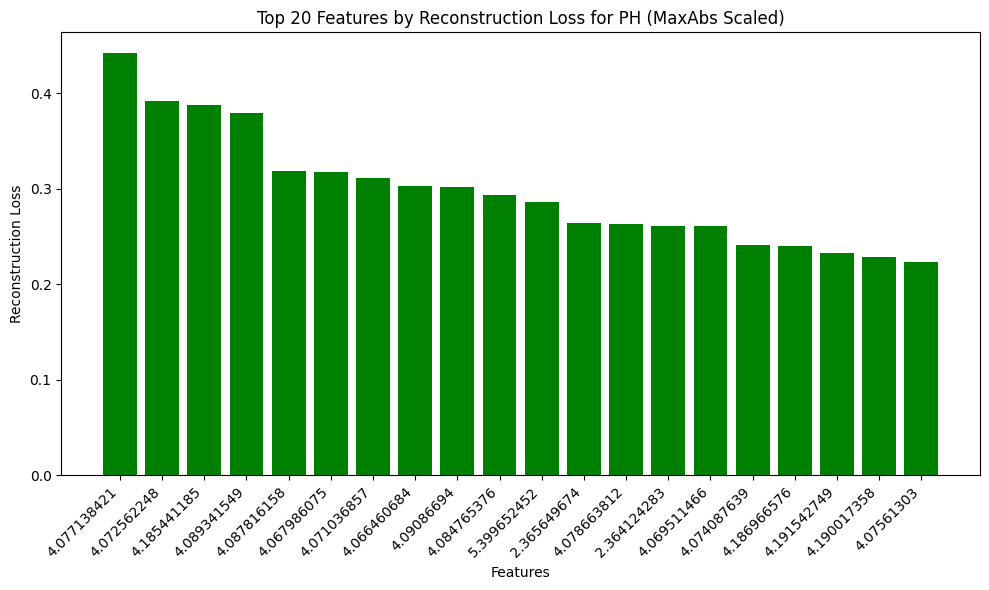

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


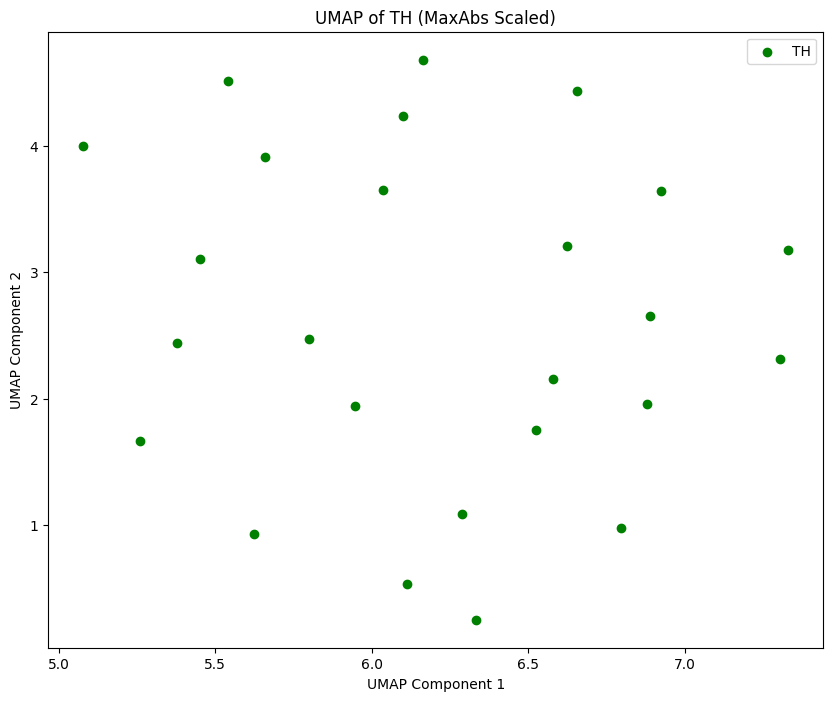

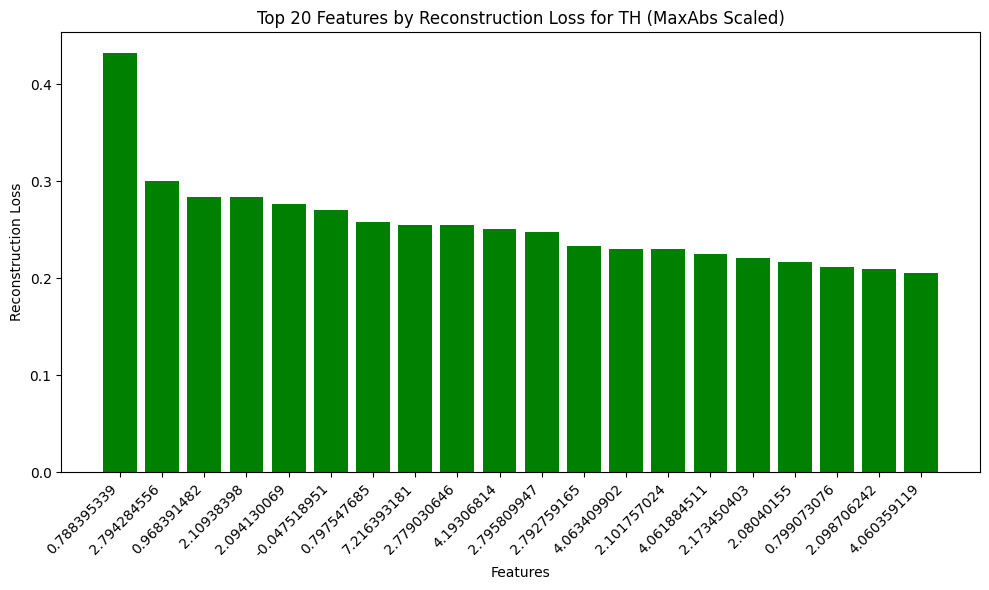

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


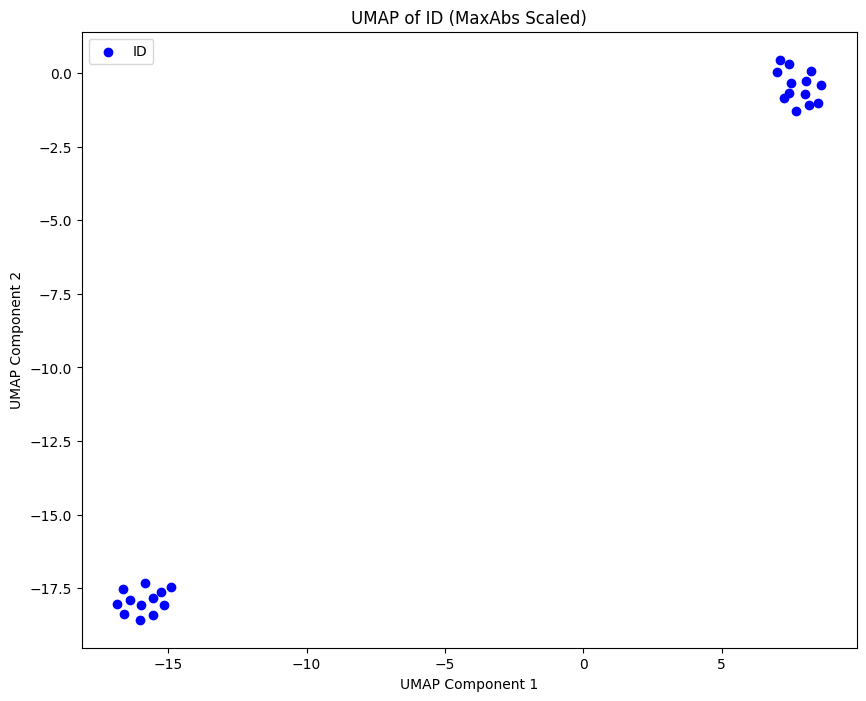

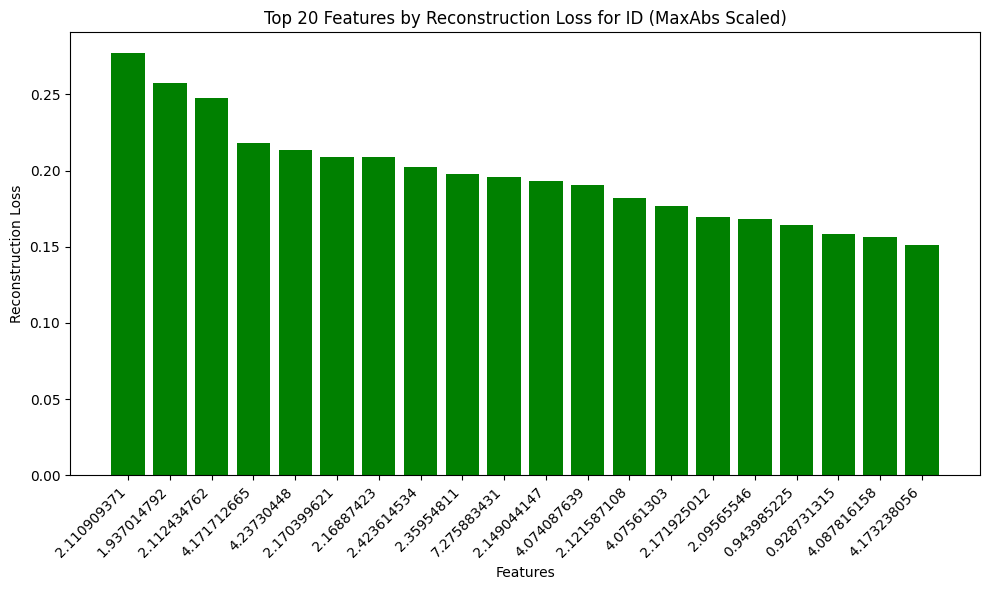

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


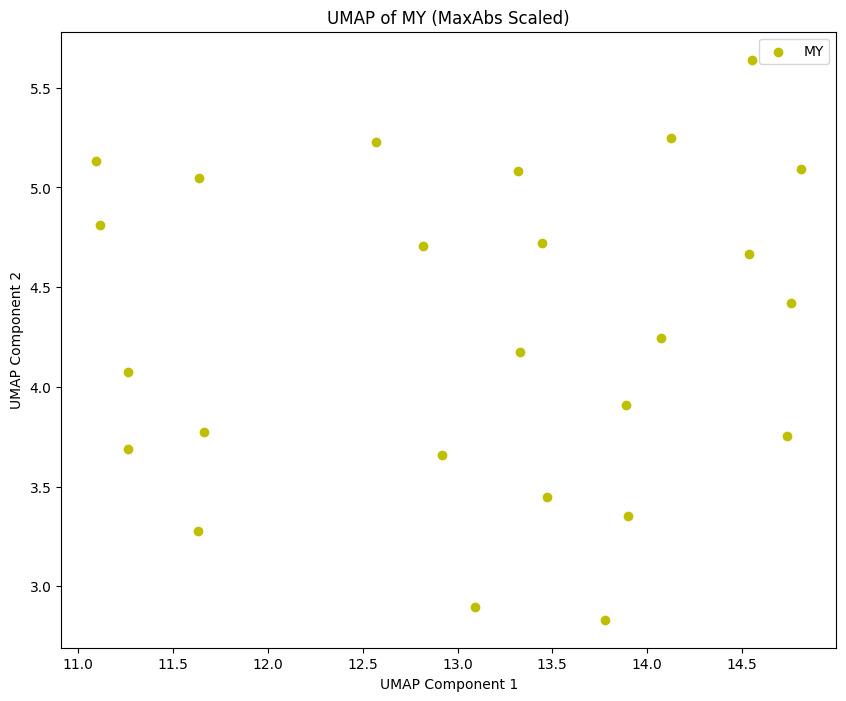

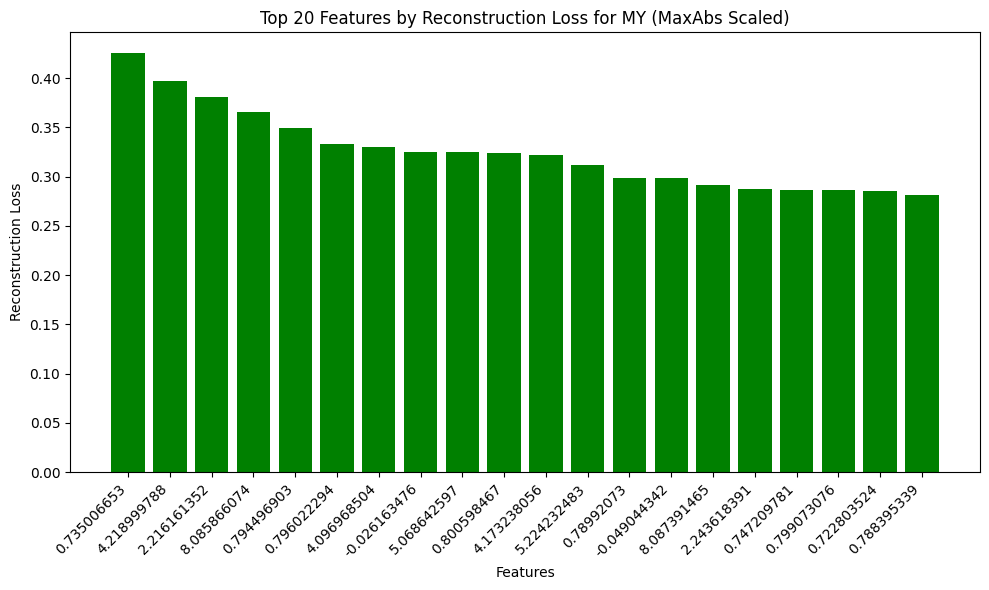

In [16]:
##reconstruction loss

!pip install umap-learn
from sklearn.preprocessing import MaxAbsScaler
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define top_n for feature importance
top_n = 20

# UMAP plot for all datasets with feature importance analysis
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # MaxAbsScaler
        scaler = MaxAbsScaler()
        x_scaled = scaler.fit_transform(x)

        # Apply UMAP
        reducer = umap.UMAP(n_components=2, random_state=42)
        embedding = reducer.fit_transform(x_scaled)

        # Visualize UMAP
        plt.figure(figsize=(10, 8))
        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)
        plt.xlabel('UMAP Component 1')
        plt.ylabel('UMAP Component 2')
        plt.title(f'UMAP of {name} (MaxAbs Scaled)')
        plt.legend()
        plt.show()

        # **Feature Importance with Reconstruction Loss for UMAP**
        # Inverse transform to reconstruct original data from the embedding
        x_reconstructed = reducer.inverse_transform(embedding)

        # Calculate reconstruction loss (MSE for each feature)
        reconstruction_loss = np.mean((x_scaled - x_reconstructed) ** 2, axis=0)

        # Create DataFrame for feature importance
        importance_df = pd.DataFrame({
            'Feature': numerical_cols,
            'Reconstruction Loss': reconstruction_loss
        }).sort_values(by='Reconstruction Loss', ascending=False)

        # Show only top N features
        top_features = importance_df.head(top_n)

        # Plot top N features
        plt.figure(figsize=(10, 6))
        plt.bar(top_features['Feature'], top_features['Reconstruction Loss'], color='g')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top {top_n} Features by Reconstruction Loss for {name} (MaxAbs Scaled)')
        plt.ylabel('Reconstruction Loss')
        plt.xlabel('Features')
        plt.tight_layout()
        plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

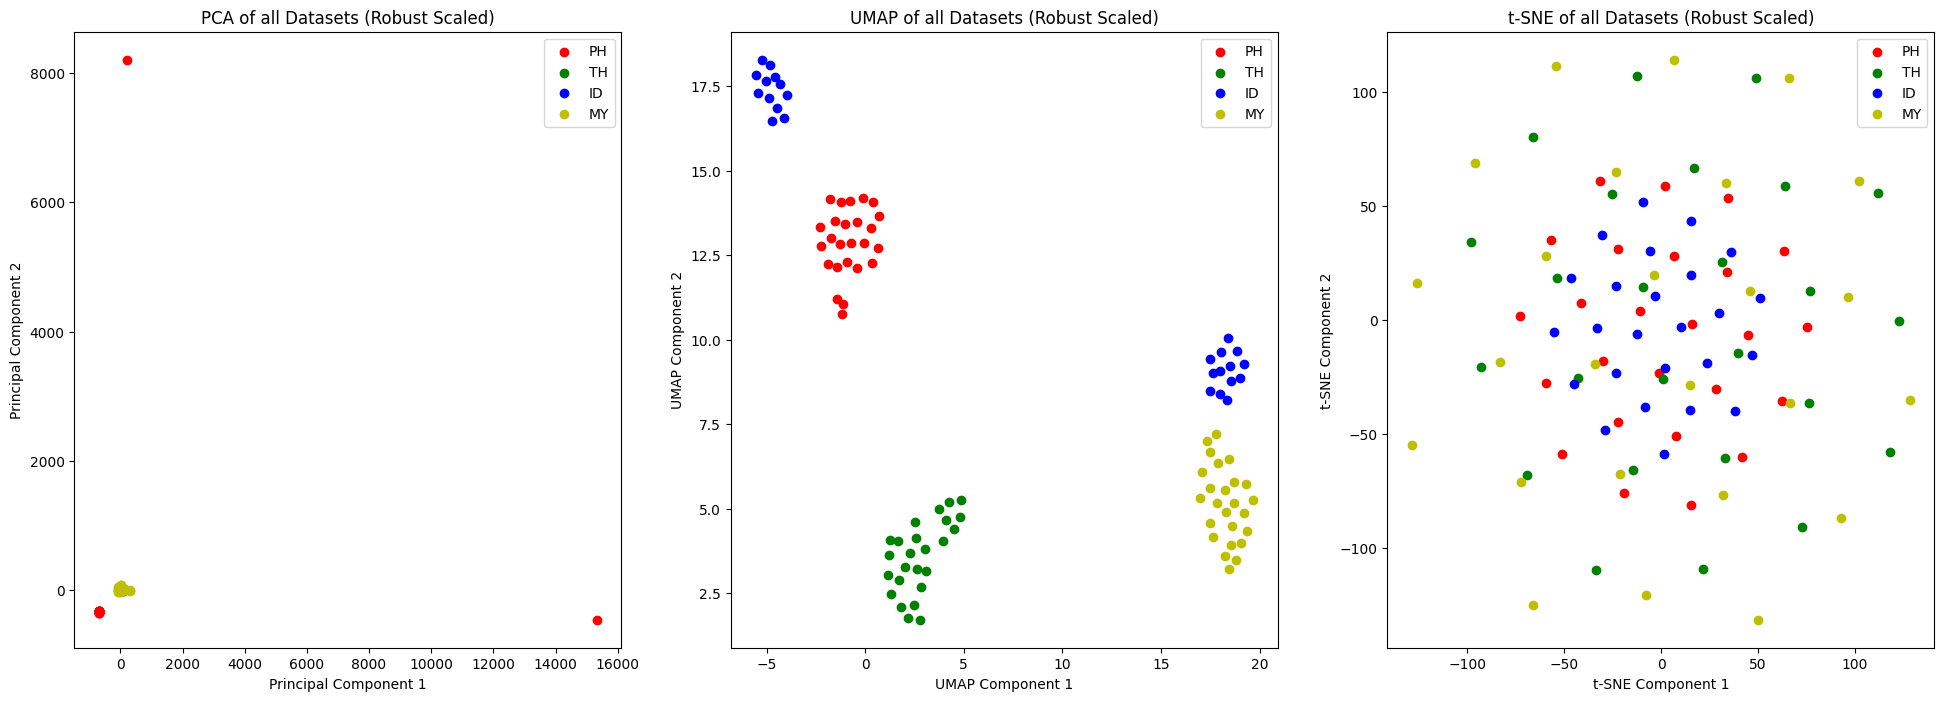

In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import umap
from sklearn.manifold import TSNE

# Assuming `dataframes` is a dictionary of DataFrames
# Replace this with your actual DataFrames
# Example:
# dataframes = {'dataset1': df1, 'dataset2': df2, ...}

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE
plt.figure(figsize=(24, 8))

# PCA plot
plt.subplot(1, 3, 1)
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # RobustScaler
        scaler = RobustScaler()
        x_scaled = scaler.fit_transform(x)

        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(x_scaled)
        plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of all Datasets (Robust Scaled)')
plt.legend()

# UMAP plot
plt.subplot(1, 3, 2)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # RobustScaler
        scaler = RobustScaler()
        x_scaled = scaler.fit_transform(x)

        reducer = umap.UMAP(n_components=2, random_state=42)  # Initialize UMAP
        embedding = reducer.fit_transform(x_scaled)  # Fit and transform the data

        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of all Datasets (Robust Scaled)')
plt.legend()

# t-SNE plot
plt.subplot(1, 3, 3)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # RobustScaler
        scaler = RobustScaler()
        x_scaled = scaler.fit_transform(x)

        # Dynamically adjust perplexity based on the number of samples
        n_samples = x_scaled.shape[0]
        perplexity = min(30, n_samples - 1)

        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)  # Initialize t-SNE
        tsne_results = tsne.fit_transform(x_scaled)  # Fit and transform the data

        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of all Datasets (Robust Scaled)')
plt.legend()

plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

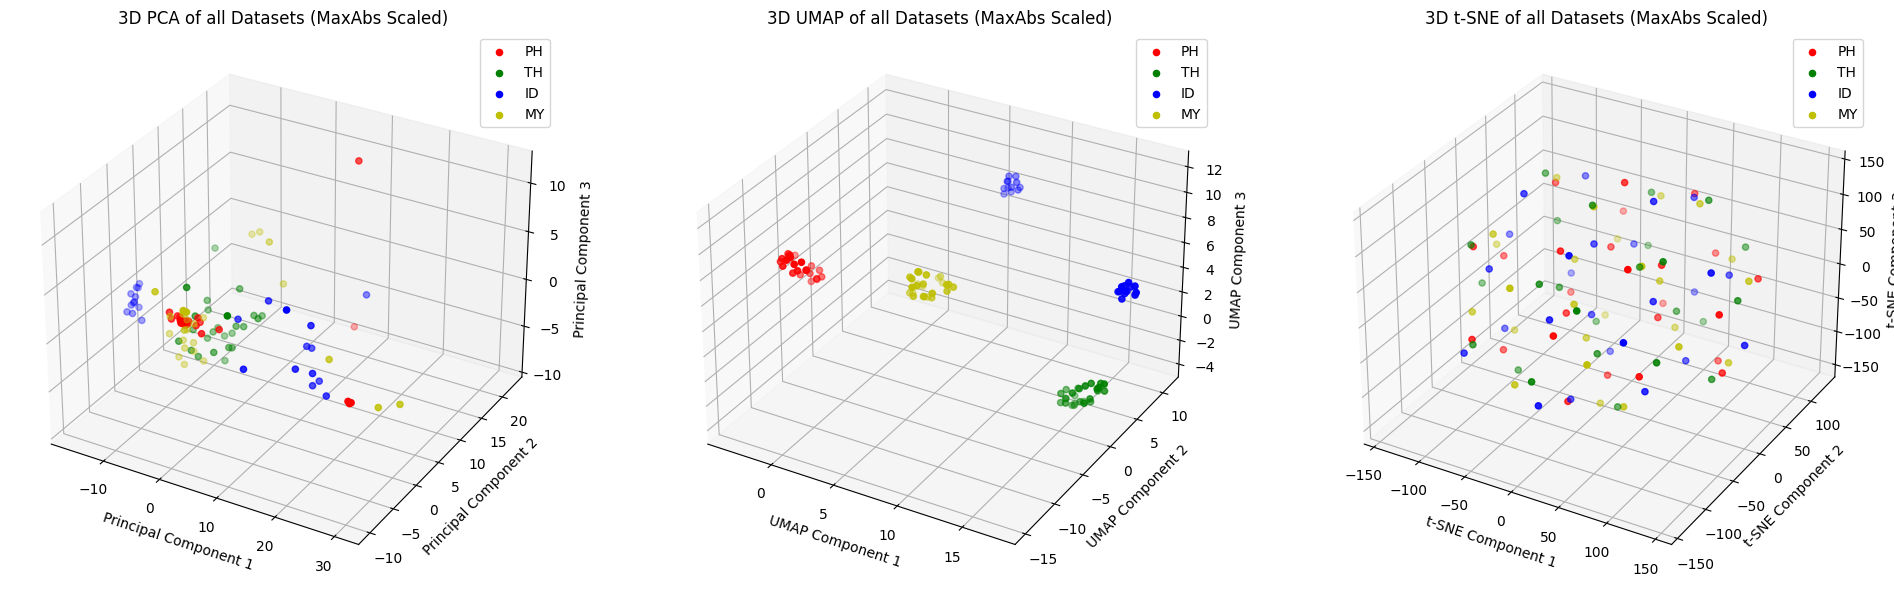

In [18]:
# prompt: Do for the 3D PCA, UMAP and t-SNE above

# 3D Visualization for PCA, UMAP, and t-SNE with MaxAbsScaler
plt.figure(figsize=(24, 8))

# 3D PCA plot
ax = plt.subplot(1, 3, 1, projection='3d')
colors = ['r', 'g', 'b', 'y']
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = MaxAbsScaler() # Use MaxAbsScaler here
        x_scaled = scaler.fit_transform(x)
        pca = PCA(n_components=3)  # Project to 3 components
        principalComponents = pca.fit_transform(x_scaled)
        ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2], c=colors[i], label=name)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of all Datasets (MaxAbs Scaled)')
ax.legend()


# 3D UMAP plot
ax = plt.subplot(1, 3, 2, projection='3d')
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = MaxAbsScaler() # Use MaxAbsScaler here
        x_scaled = scaler.fit_transform(x)
        reducer = umap.UMAP(n_components=3, random_state=42)
        embedding = reducer.fit_transform(x_scaled)
        ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=colors[i], label=name)

ax.set_xlabel('UMAP Component 1')
ax.set_ylabel('UMAP Component 2')
ax.set_zlabel('UMAP Component 3')
ax.set_title('3D UMAP of all Datasets (MaxAbs Scaled)')
ax.legend()


# 3D t-SNE plot
ax = plt.subplot(1, 3, 3, projection='3d')
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = MaxAbsScaler() # Use MaxAbsScaler here
        x_scaled = scaler.fit_transform(x)
        n_samples = x_scaled.shape[0]
        perplexity = min(30, n_samples - 1)
        tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
        tsne_results = tsne.fit_transform(x_scaled)
        ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=colors[i], label=name)

ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D t-SNE of all Datasets (MaxAbs Scaled)')
ax.legend()

plt.show()


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


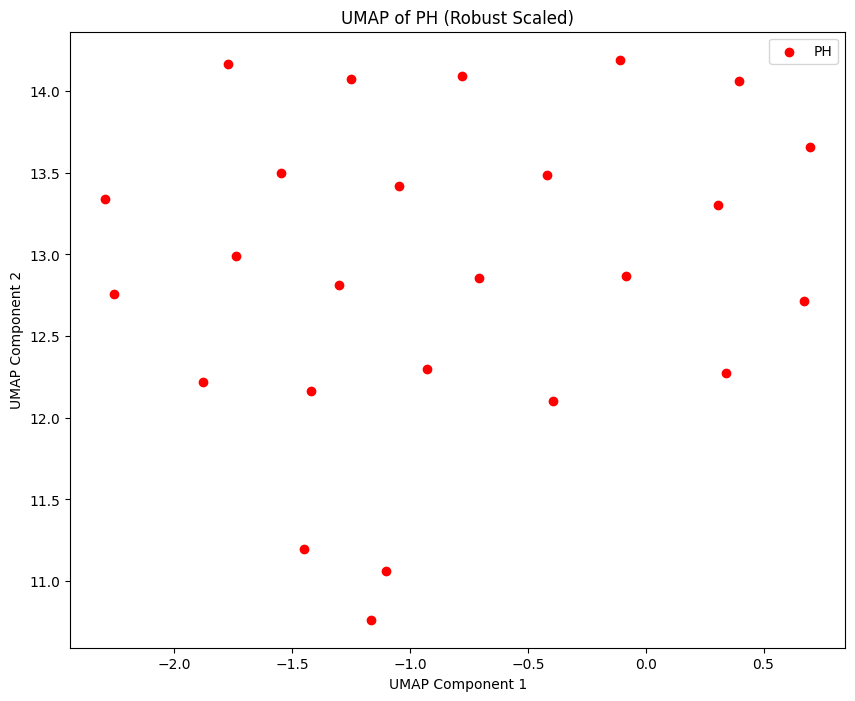

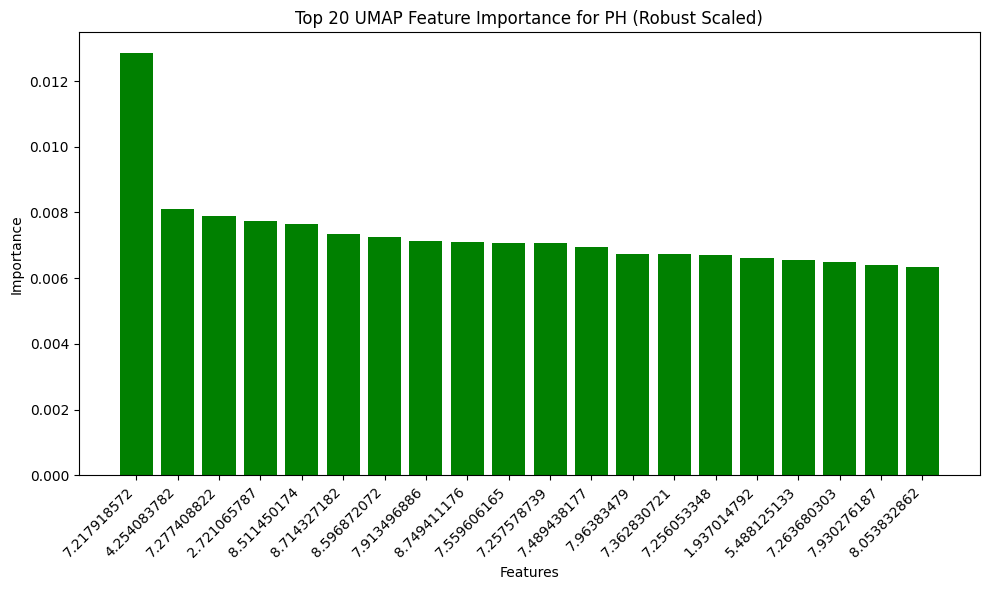

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


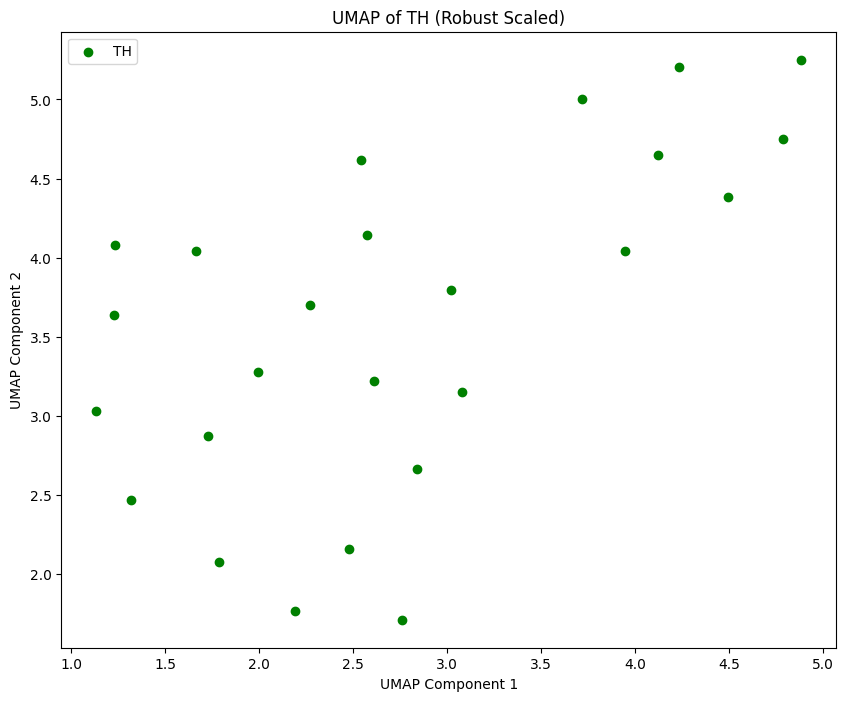

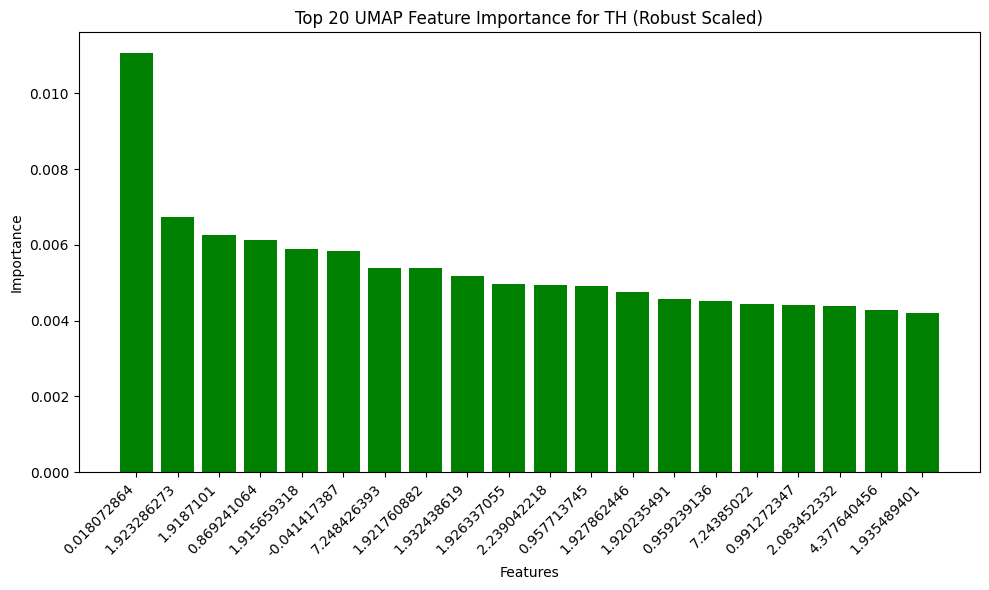

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


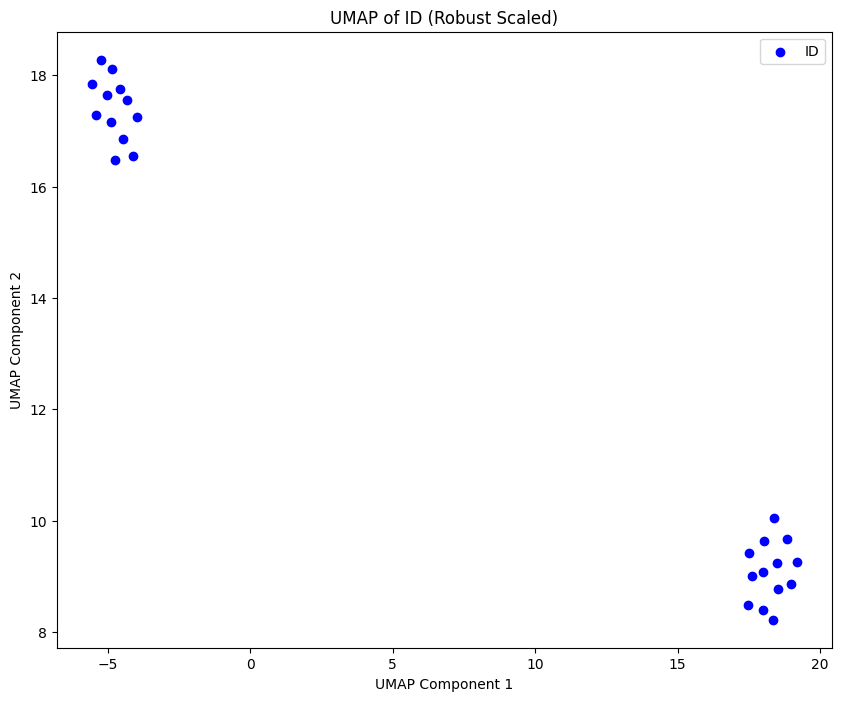

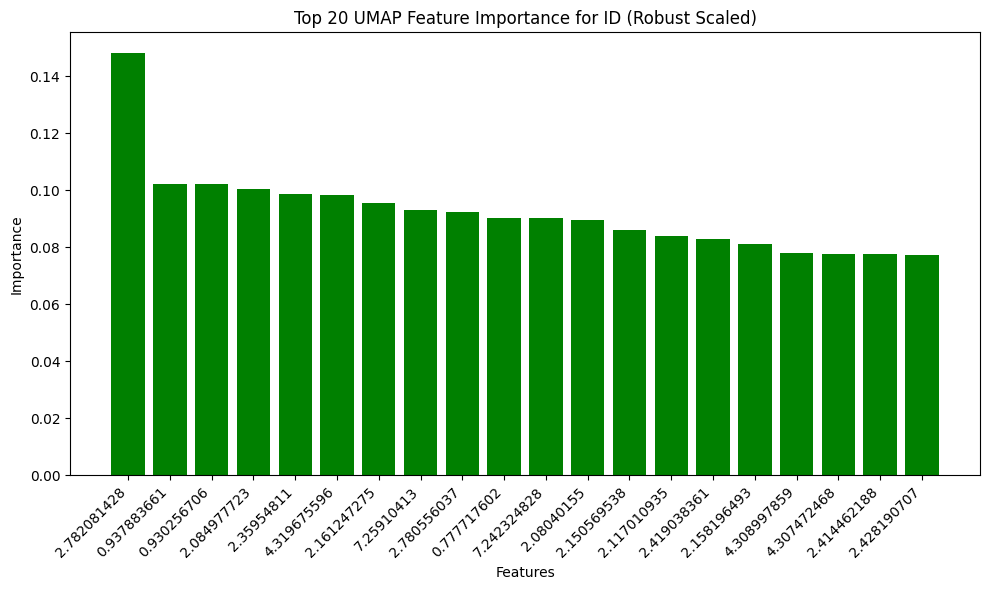

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


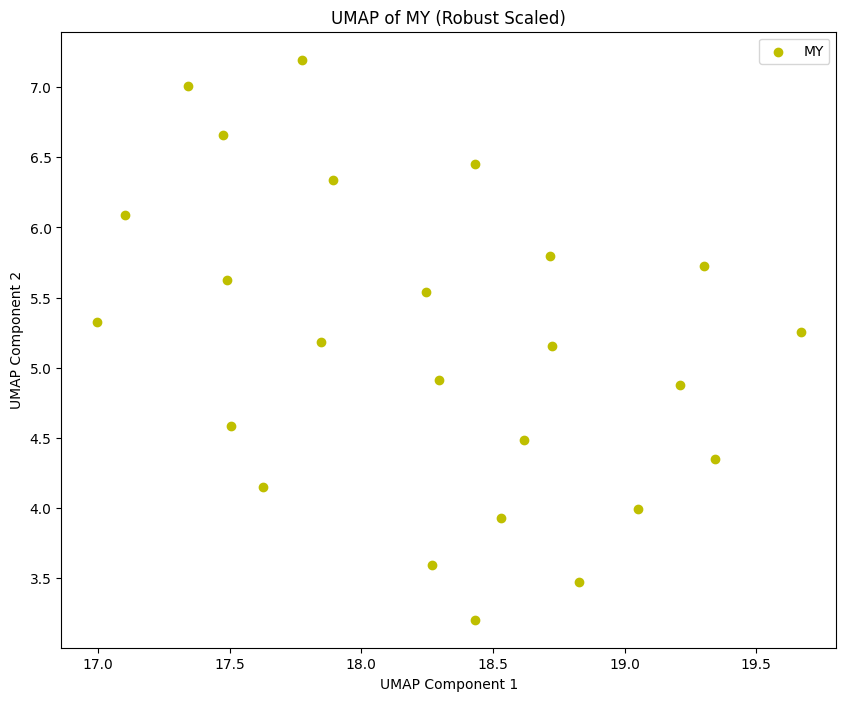

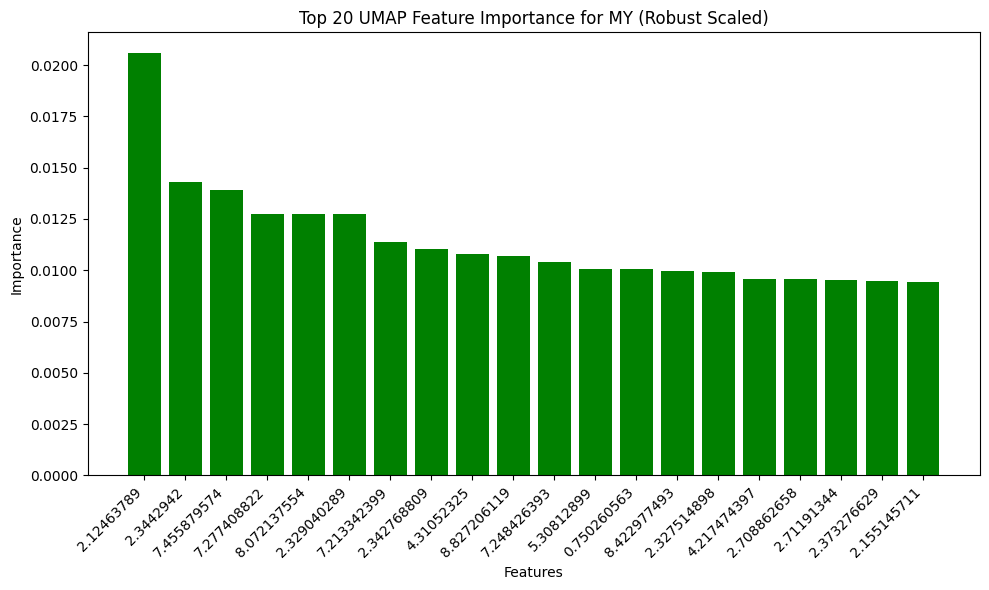

In [19]:
!pip install umap-learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define top_n for feature importance
top_n = 20

# UMAP plot for all datasets with feature importance analysis
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # RobustScaler
        scaler = RobustScaler()
        x_scaled = scaler.fit_transform(x)

        # Apply UMAP
        reducer = umap.UMAP(n_components=2, random_state=42)
        embedding = reducer.fit_transform(x_scaled)

        # Visualize UMAP
        plt.figure(figsize=(10, 8))
        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)
        plt.xlabel('UMAP Component 1')
        plt.ylabel('UMAP Component 2')
        plt.title(f'UMAP of {name} (Robust Scaled)')
        plt.legend()
        plt.show()

        # **Feature Importance for UMAP**
        surrogate_model = LinearRegression()
        surrogate_model.fit(x_scaled, embedding)

        # Calculate feature importance
        feature_importance = np.abs(surrogate_model.coef_).mean(axis=0)

        # Create DataFrame for feature importance
        importance_df = pd.DataFrame({
            'Feature': numerical_cols,
            'Importance': feature_importance
        }).sort_values(by='Importance', ascending=False)

        # Show only top N features
        top_features = importance_df.head(top_n)

        # Plot top N features
        plt.figure(figsize=(10, 6))
        plt.bar(top_features['Feature'], top_features['Importance'], color='g')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top {top_n} UMAP Feature Importance for {name} (Robust Scaled)')
        plt.ylabel('Importance')
        plt.xlabel('Features')
        plt.tight_layout()
        plt.show()



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: C:\Users\Abdul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


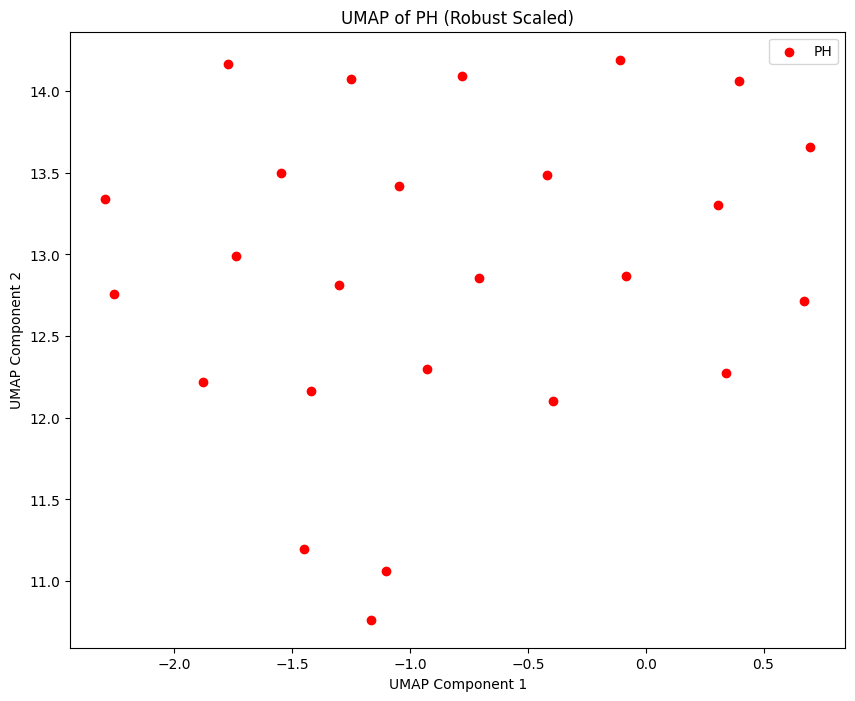

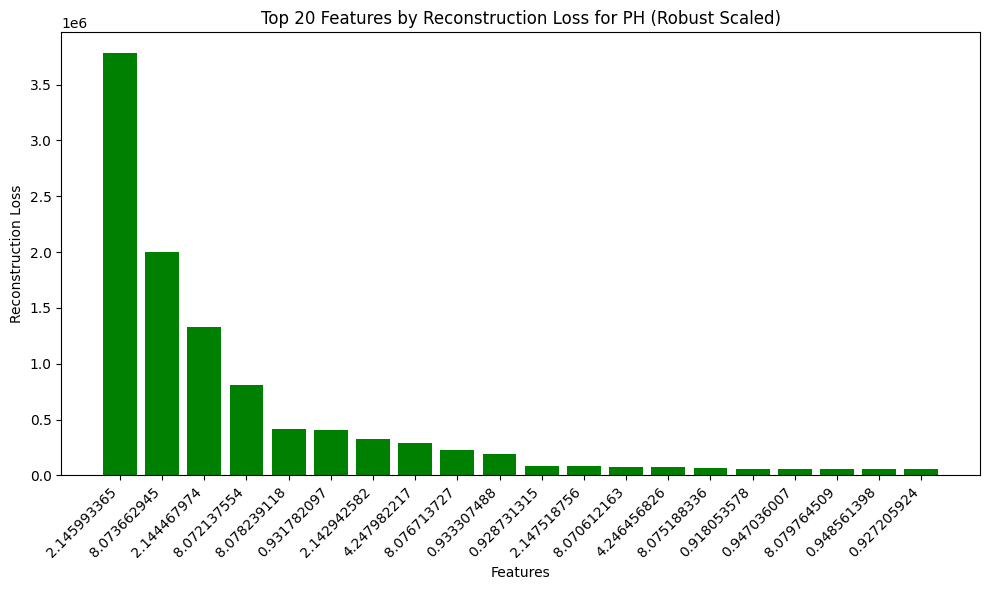

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


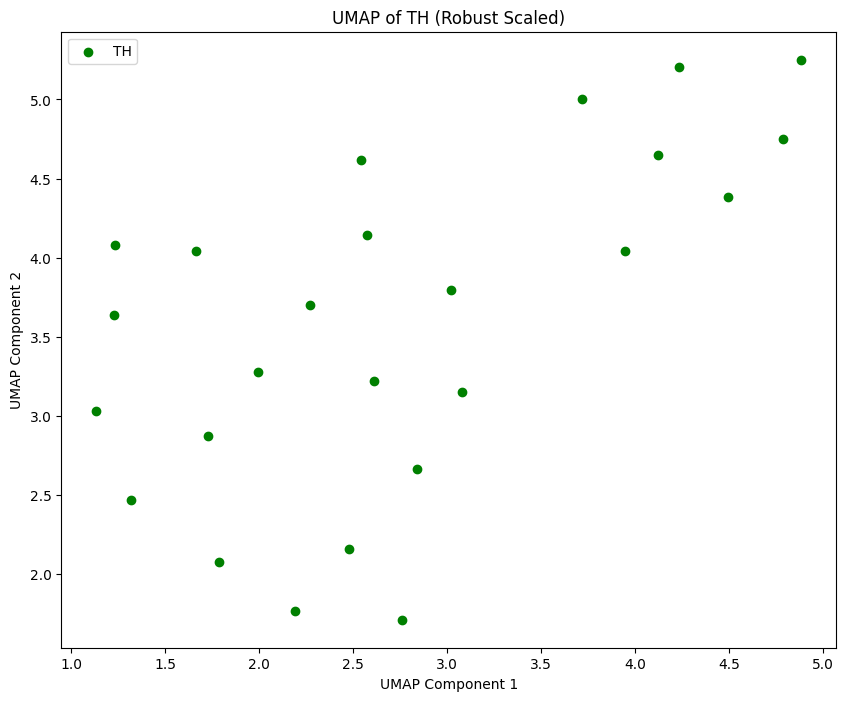

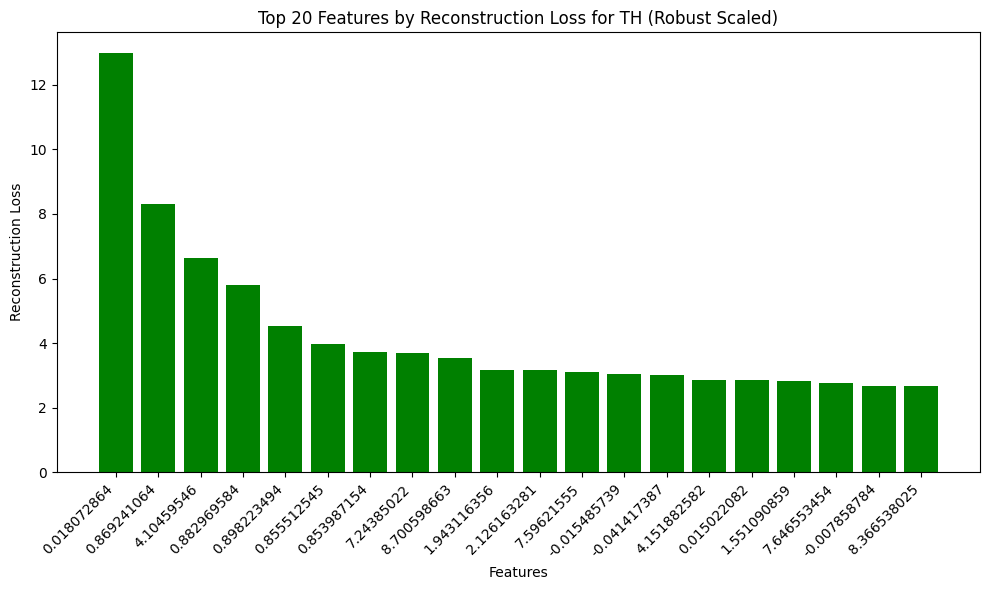

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


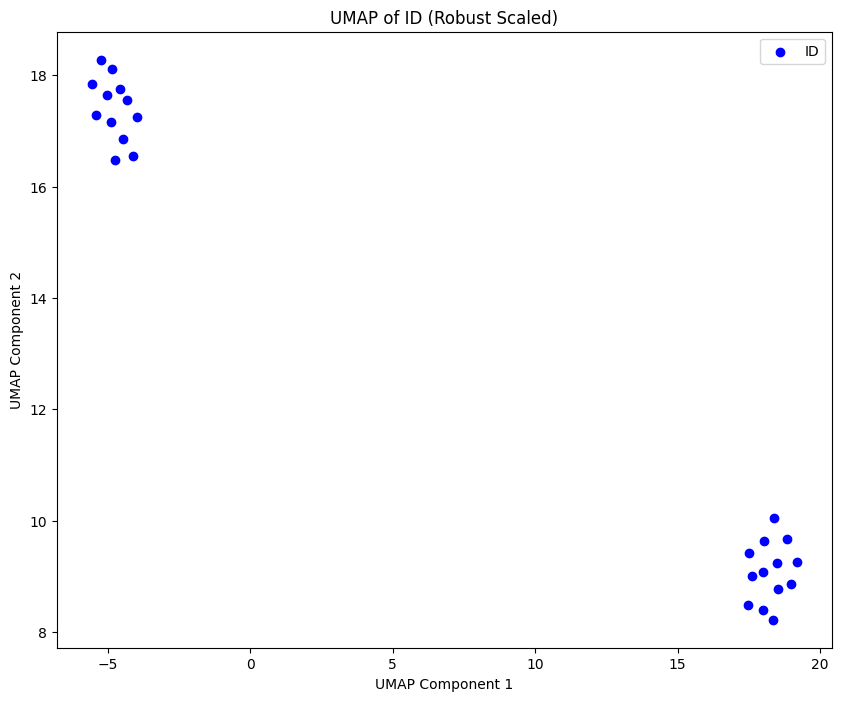

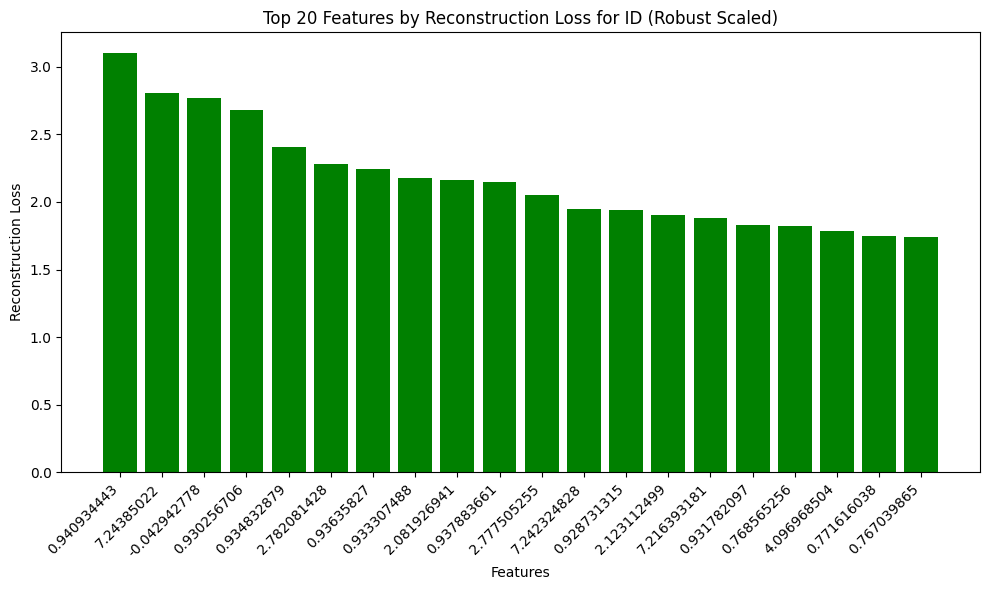

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


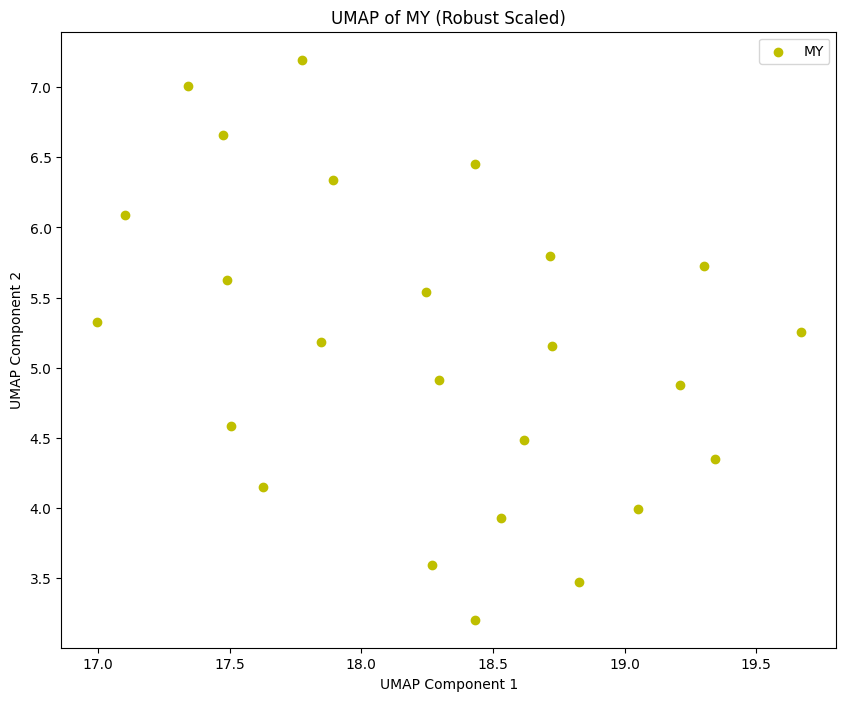

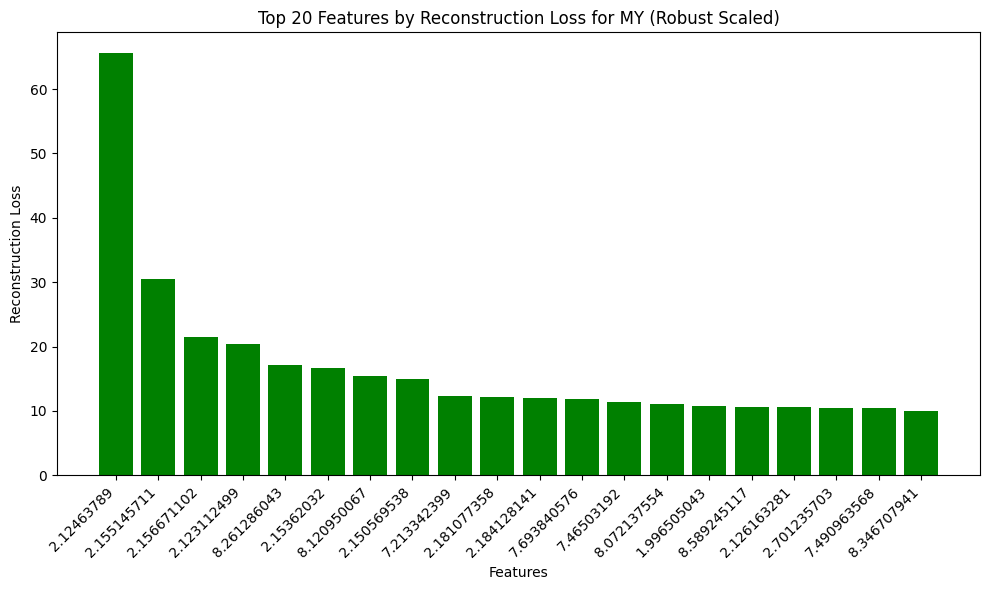

In [20]:
!pip install umap-learn
from sklearn.preprocessing import RobustScaler
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define top_n for feature importance
top_n = 20

# UMAP plot for all datasets with feature importance analysis
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # RobustScaler
        scaler = RobustScaler()
        x_scaled = scaler.fit_transform(x)

        # Apply UMAP
        reducer = umap.UMAP(n_components=2, random_state=42)
        embedding = reducer.fit_transform(x_scaled)

        # Visualize UMAP
        plt.figure(figsize=(10, 8))
        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)
        plt.xlabel('UMAP Component 1')
        plt.ylabel('UMAP Component 2')
        plt.title(f'UMAP of {name} (Robust Scaled)')
        plt.legend()
        plt.show()

        # **Feature Importance with Reconstruction Loss for UMAP**
        # Inverse transform to reconstruct original data from the embedding
        x_reconstructed = reducer.inverse_transform(embedding)

        # Calculate reconstruction loss (MSE for each feature)
        reconstruction_loss = np.mean((x_scaled - x_reconstructed) ** 2, axis=0)

        # Create DataFrame for feature importance
        importance_df = pd.DataFrame({
            'Feature': numerical_cols,
            'Reconstruction Loss': reconstruction_loss
        }).sort_values(by='Reconstruction Loss', ascending=False)

        # Show only top N features
        top_features = importance_df.head(top_n)

        # Plot top N features
        plt.figure(figsize=(10, 6))
        plt.bar(top_features['Feature'], top_features['Reconstruction Loss'], color='g')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top {top_n} Features by Reconstruction Loss for {name} (Robust Scaled)')
        plt.ylabel('Reconstruction Loss')
        plt.xlabel('Features')
        plt.tight_layout()
        plt.show()


C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

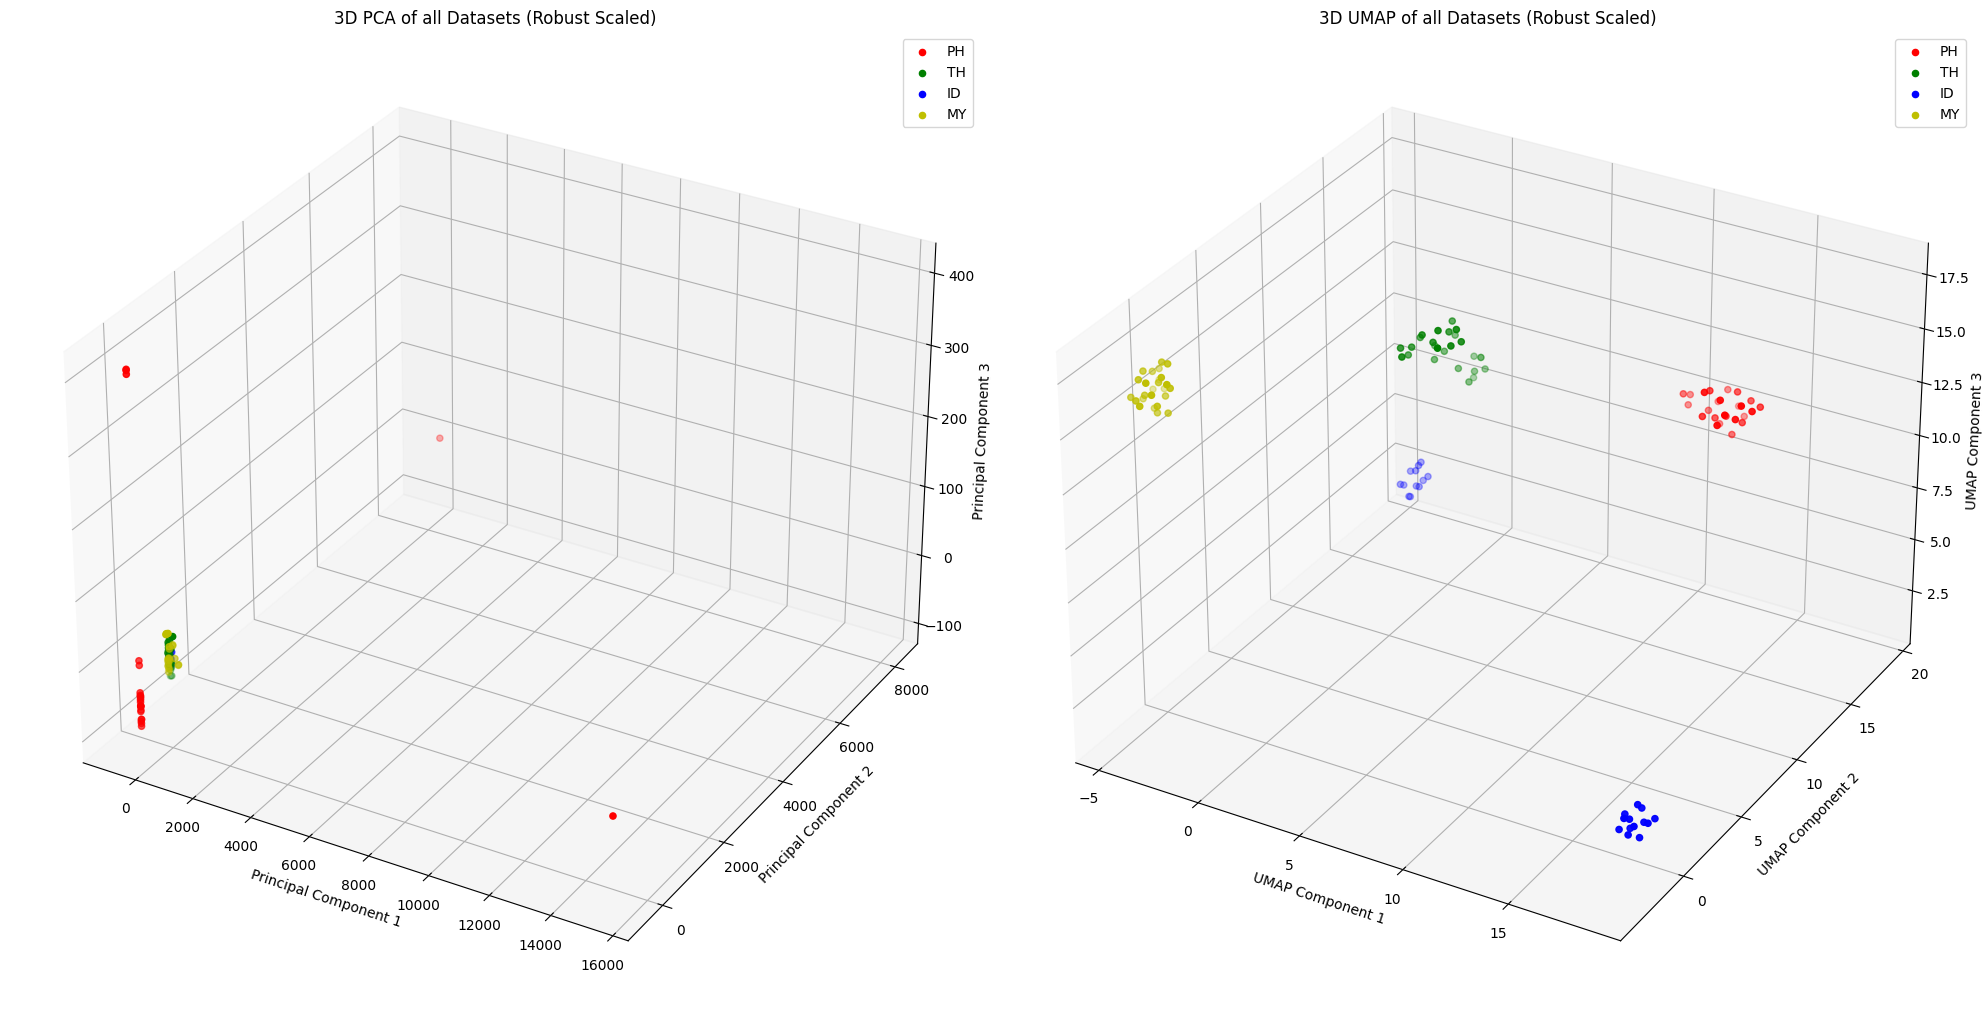

In [21]:
# prompt: Do for the 3D PCA and UMAP above

# ... (your existing code to load dataframes) ...

# Create a single plot comparing 3D PCA and 3D UMAP side-by-side with RobustScaler
plt.figure(figsize=(20, 10))

colors = ['r', 'g', 'b', 'y']
labels = list(dataframes.keys())

# 3D PCA plot
ax1 = plt.subplot(1, 2, 1, projection='3d')
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = RobustScaler() # Use RobustScaler for normalization
        x_scaled = scaler.fit_transform(x)
        pca = PCA(n_components=3)
        principalComponents = pca.fit_transform(x_scaled)
        ax1.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2], c=colors[i], label=name)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.set_title('3D PCA of all Datasets (Robust Scaled)')
plt.legend()


# 3D UMAP plot
ax2 = plt.subplot(1, 2, 2, projection='3d')
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values
        scaler = RobustScaler() # Use RobustScaler for normalization
        x_scaled = scaler.fit_transform(x)
        reducer = umap.UMAP(n_components=3, random_state=42)
        embedding = reducer.fit_transform(x_scaled)
        ax2.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=colors[i], label=name)

ax2.set_xlabel('UMAP Component 1')
ax2.set_ylabel('UMAP Component 2')
ax2.set_zlabel('UMAP Component 3')
ax2.set_title('3D UMAP of all Datasets (Robust Scaled)')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

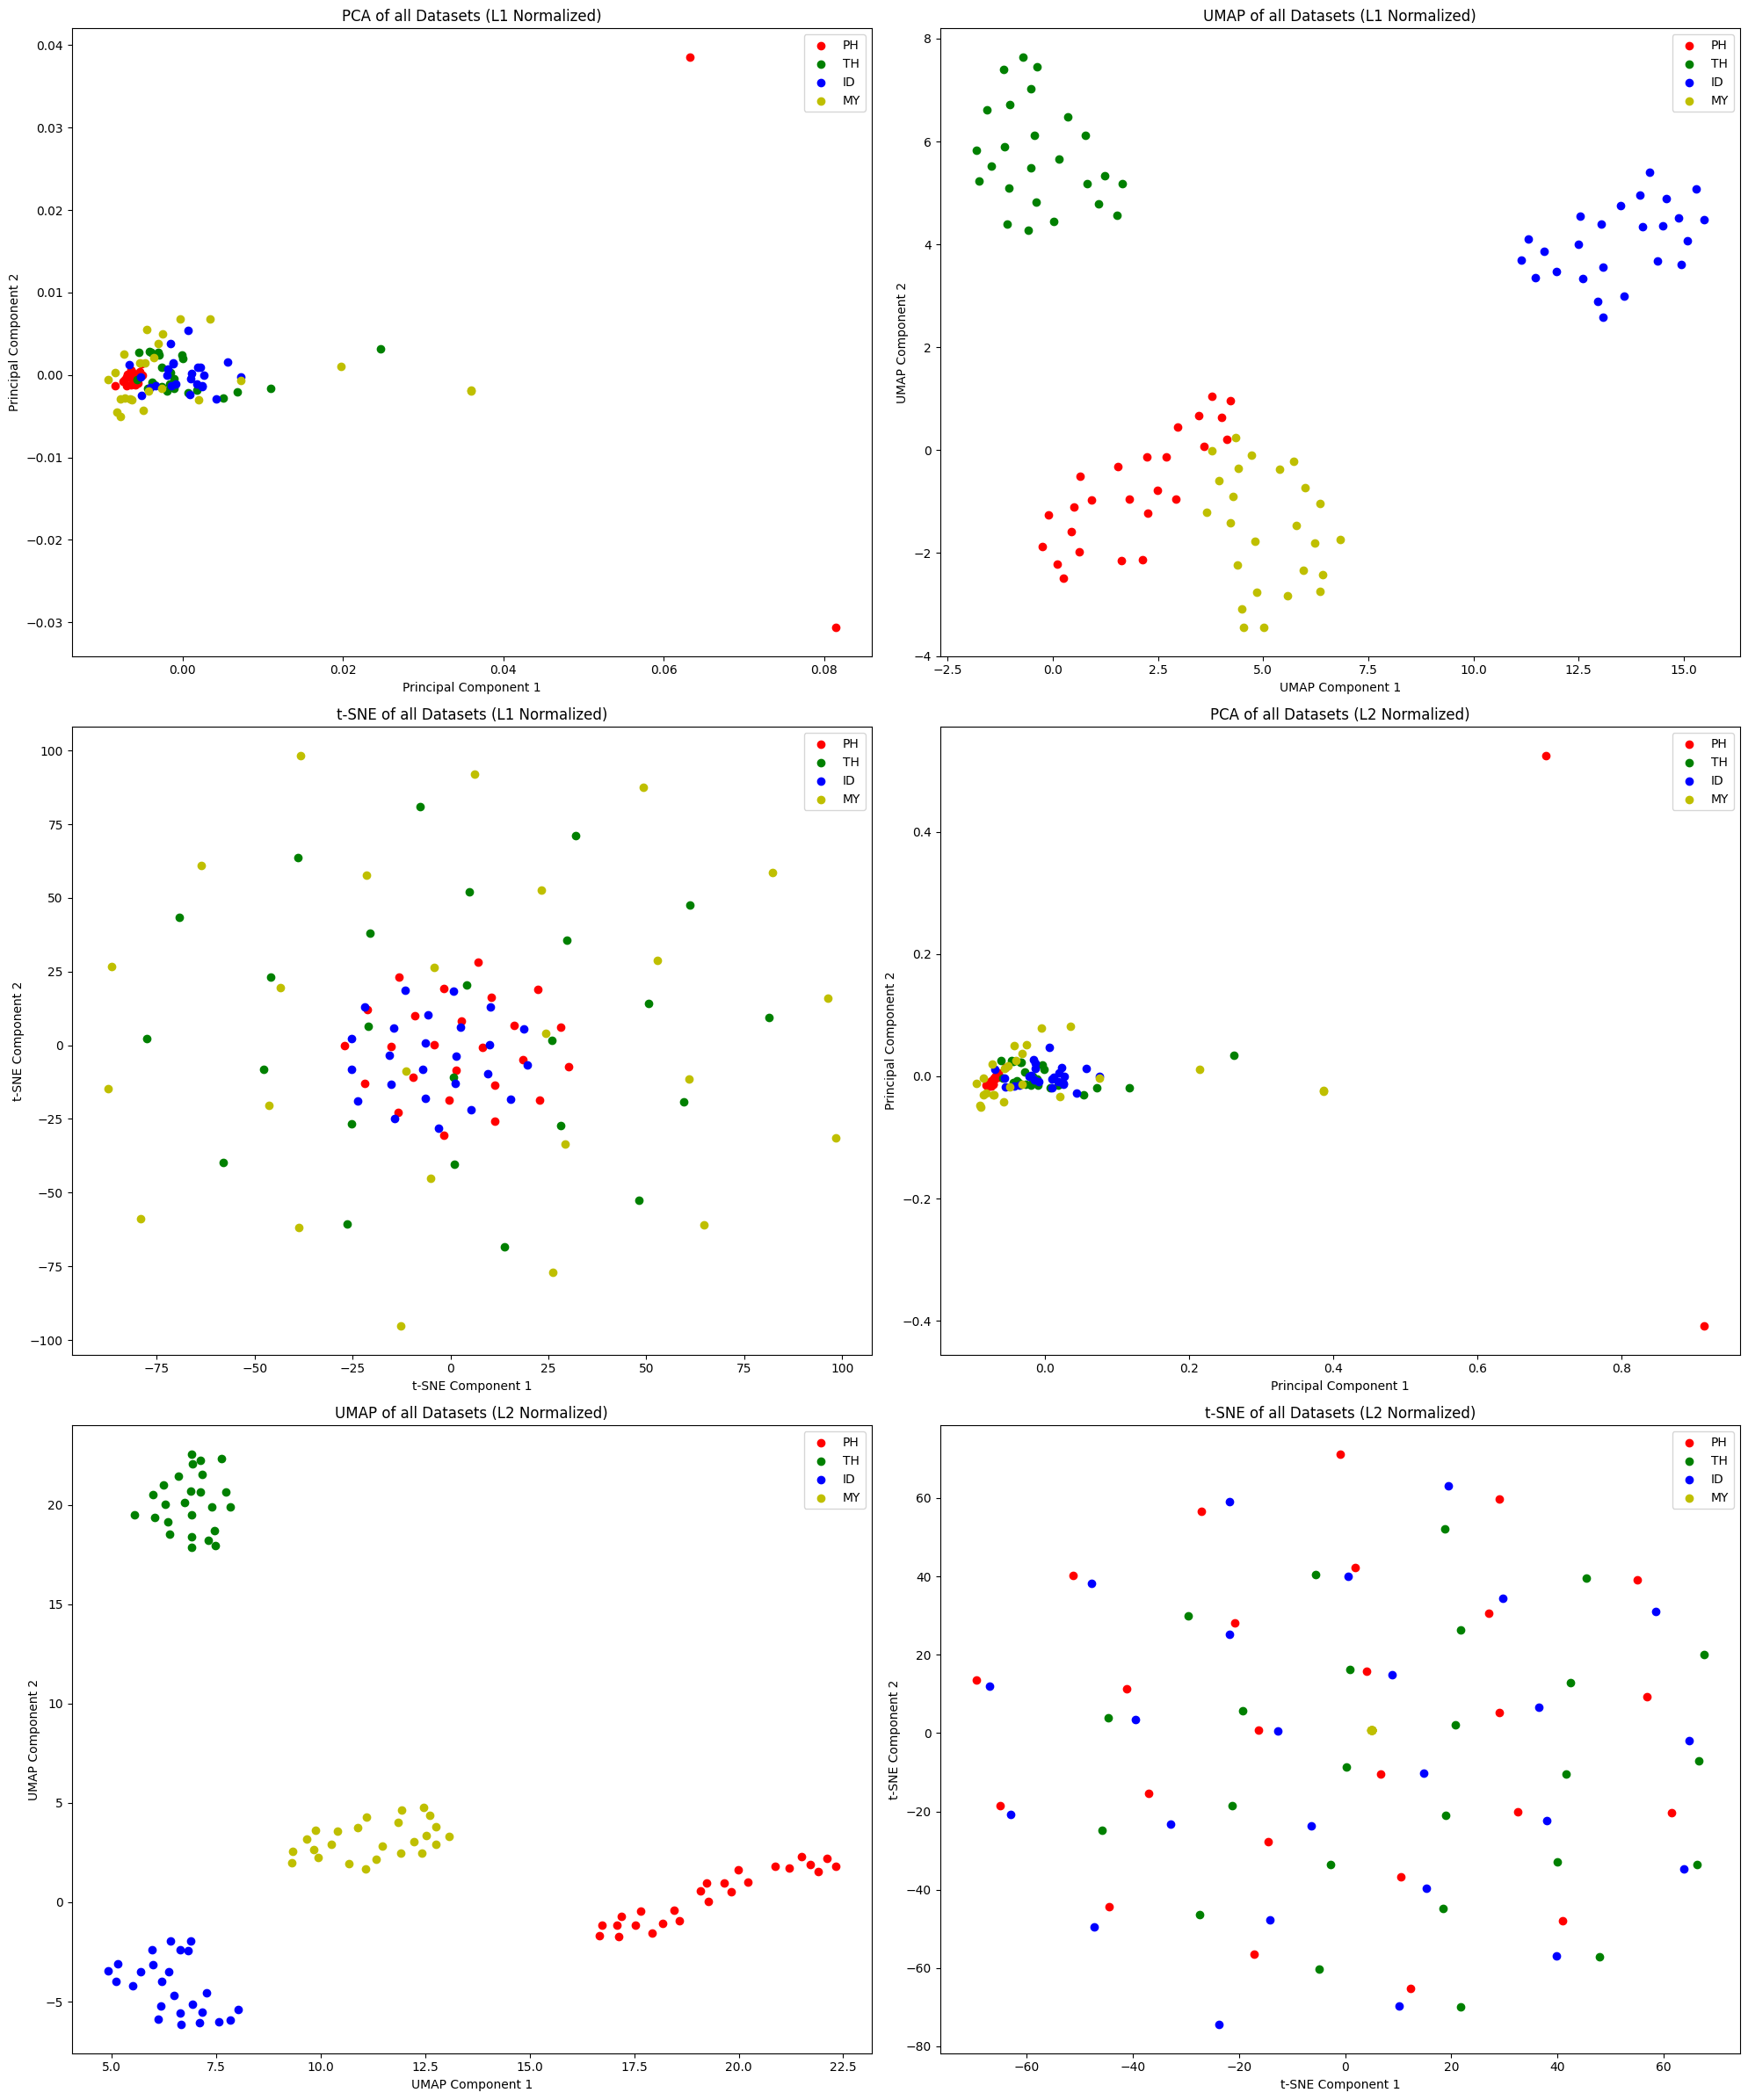

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import umap
from sklearn.manifold import TSNE

# Assuming `dataframes` is a dictionary of DataFrames
# Replace this with your actual DataFrames
# Example:
# dataframes = {'dataset1': df1, 'dataset2': df2, ...}

# L1 Normalization function
def l1_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l1')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# L2 Normalization function
def l2_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l2')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE with different normalizations
plt.figure(figsize=(20, 24))

normalizations = {'L1': l1_normalize, 'L2': l2_normalize}

for idx, (norm_name, norm_func) in enumerate(normalizations.items()):
    # PCA plot
    plt.subplot(3, 2, idx * 3 + 1)
    colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
    labels = list(dataframes.keys())

    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            pca = PCA(n_components=2)
            principalComponents = pca.fit_transform(x_scaled)
            plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # UMAP plot
    plt.subplot(3, 2, idx * 3 + 2)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            reducer = umap.UMAP(n_components=2, random_state=42)
            embedding = reducer.fit_transform(x_scaled)
            plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.title(f'UMAP of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # t-SNE plot
    plt.subplot(3, 2, idx * 3 + 3)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            n_samples = x_scaled.shape[0]
            perplexity = min(30, n_samples - 1)

            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
            tsne_results = tsne.fit_transform(x_scaled)
            plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE of all Datasets ({norm_name} Normalized)')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# prompt: Do for the L1/L2 3D PCA, UMAP and t-SNE above

# ... (your existing code to load dataframes) ...

# L1 Normalization function
def l1_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l1')
    return pd.DataFrame(x_normalized, columns=numerical_cols)


# L2 Normalization function
def l2_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l2')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# Create a single plot for all datasets, comparing 3D PCA, 3D UMAP, and 3D t-SNE with different normalizations
plt.figure(figsize=(20, 24))

normalizations = {'L1': l1_normalize, 'L2':l2_normalize}

for idx, (norm_name, norm_func) in enumerate(normalizations.items()):
    # 3D PCA plot
    ax = plt.subplot(3, 2, idx * 3 + 1, projection='3d')
    colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
    labels = list(dataframes.keys())

    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            pca = PCA(n_components=3)
            principalComponents = pca.fit_transform(x_scaled)
            ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2], c=colors[i], label=name)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title(f'3D PCA of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # 3D UMAP plot
    ax = plt.subplot(3, 2, idx * 3 + 2, projection='3d')
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            reducer = umap.UMAP(n_components=3, random_state=42)
            embedding = reducer.fit_transform(x_scaled)
            ax.scatter(embedding[:, 0], embedding[:, 1], embedding[:, 2], c=colors[i], label=name)

    ax.set_xlabel('UMAP Component 1')
    ax.set_ylabel('UMAP Component 2')
    ax.set_zlabel('UMAP Component 3')
    ax.set_title(f'3D UMAP of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # 3D t-SNE plot
    ax = plt.subplot(3, 2, idx * 3 + 3, projection='3d')
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            n_samples = x_scaled.shape[0]
            perplexity = min(30, n_samples - 1)

            tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
            tsne_results = tsne.fit_transform(x_scaled)
            ax.scatter(tsne_results[:, 0], tsne_results[:, 1], tsne_results[:, 2], c=colors[i], label=name)

    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')
    ax.set_zlabel('t-SNE Component 3')
    ax.set_title(f'3D t-SNE of all Datasets ({norm_name} Normalized)')
    plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\Abdul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs val

In [ ]:
!pip install umap-learn
from sklearn.preprocessing import normalize
from sklearn.linear_model import LinearRegression
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define top_n for feature importance
top_n = 20

# L1 Normalization function
def l1_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l1')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# L2 Normalization function
def l2_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l2')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# UMAP plot for all datasets with feature importance analysis
normalizations = {'L1': l1_normalize, 'L2': l2_normalize}

for norm_name, norm_func in normalizations.items():
    colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
    labels = list(dataframes.keys())

    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            # Apply normalization
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values

            # Apply UMAP
            reducer = umap.UMAP(n_components=2, random_state=42)
            embedding = reducer.fit_transform(x_scaled)

            # Visualize UMAP
            plt.figure(figsize=(10, 8))
            plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)
            plt.xlabel('UMAP Component 1')
            plt.ylabel('UMAP Component 2')
            plt.title(f'UMAP of {name} ({norm_name} Normalized)')
            plt.legend()
            plt.show()

            # **Feature Importance for UMAP**
            surrogate_model = LinearRegression()
            surrogate_model.fit(x_scaled, embedding)

            # Calculate feature importance
            feature_importance = np.abs(surrogate_model.coef_).mean(axis=0)

            # Create DataFrame for feature importance
            importance_df = pd.DataFrame({
                'Feature': normalized_df.columns,
                'Importance': feature_importance
            }).sort_values(by='Importance', ascending=False)

            # Show only top N features
            top_features = importance_df.head(top_n)

            # Plot top N features
            plt.figure(figsize=(10, 6))
            plt.bar(top_features['Feature'], top_features['Importance'], color='g')
            plt.xticks(rotation=45, ha='right')
            plt.title(f'Top {top_n} UMAP Feature Importance for {name} ({norm_name} Normalized)')
            plt.ylabel('Importance')
            plt.xlabel('Features')
            plt.tight_layout()
            plt.show()


In [ ]:
!pip install umap-learn
from sklearn.preprocessing import normalize
import umap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define top_n for feature importance
top_n = 20

# L1 Normalization function
def l1_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l1')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# L2 Normalization function
def l2_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l2')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# UMAP plot for all datasets with feature importance analysis
normalizations = {'L1': l1_normalize, 'L2': l2_normalize}

for norm_name, norm_func in normalizations.items():
    colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
    labels = list(dataframes.keys())

    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            # Apply normalization
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values

            # Apply UMAP
            reducer = umap.UMAP(n_components=2, random_state=42)
            embedding = reducer.fit_transform(x_scaled)

            # Visualize UMAP
            plt.figure(figsize=(10, 8))
            plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)
            plt.xlabel('UMAP Component 1')
            plt.ylabel('UMAP Component 2')
            plt.title(f'UMAP of {name} ({norm_name} Normalized)')
            plt.legend()
            plt.show()

            # **Feature Importance with Reconstruction Loss for UMAP**
            # Inverse transform to reconstruct original data from the embedding
            x_reconstructed = reducer.inverse_transform(embedding)

            # Calculate reconstruction loss (MSE for each feature)
            reconstruction_loss = np.mean((x_scaled - x_reconstructed) ** 2, axis=0)

            # Create DataFrame for feature importance
            importance_df = pd.DataFrame({
                'Feature': normalized_df.columns,
                'Reconstruction Loss': reconstruction_loss
            }).sort_values(by='Reconstruction Loss', ascending=False)

            # Show only top N features
            top_features = importance_df.head(top_n)

            # Plot top N features
            plt.figure(figsize=(10, 6))
            plt.bar(top_features['Feature'], top_features['Reconstruction Loss'], color='g')
            plt.xticks(rotation=45, ha='right')
            plt.title(f'Top {top_n} Features by Reconstruction Loss for {name} ({norm_name} Normalized)')
            plt.ylabel('Reconstruction Loss')
            plt.xlabel('Features')
            plt.tight_layout()
            plt.show()


In [ ]:
# Assuming `dataframes` is a dictionary of DataFrames
# Replace this with your actual DataFrames
# Example:
# dataframes = {'dataset1': df1, 'dataset2': df2, ...}

plt.figure(figsize=(24, 8))

# PCA plot
plt.subplot(1, 3, 1)
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # Apply Log Transformation
        x_transformed = np.log1p(x)  # Log transformation

        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(x_transformed)
        plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of all Datasets')
plt.legend()

# UMAP plot
plt.subplot(1, 3, 2)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # Apply Log Transformation
        x_transformed = np.log1p(x)  # Log transformation

        reducer = umap.UMAP(n_components=2, random_state=42)  # Initialize UMAP
        embedding = reducer.fit_transform(x_transformed)  # Fit and transform the data

        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of all Datasets')
plt.legend()

# t-SNE plot
plt.subplot(1, 3, 3)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # Apply Log Transformation
        x_transformed = np.log1p(x)  # Log transformation

        # Dynamically adjust perplexity based on the number of samples
        n_samples = x_transformed.shape[0]
        perplexity = min(30, n_samples - 1)

        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)  # Initialize t-SNE
        tsne_results = tsne.fit_transform(x_transformed)  # Fit and transform the data

        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of all Datasets')
plt.legend()

plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import numpy as np
import matplotlib.pyplot as plt

# Assuming `dataframes` is a dictionary of DataFrames
# Replace this with your actual DataFrames
# Example:
# dataframes = {'dataset1': df1, 'dataset2': df2, ...}

plt.figure(figsize=(24, 8))

# PCA plot
plt.subplot(1, 3, 1)
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # Apply Z-Score Normalization
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)

        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(x_scaled)
        plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of all Datasets')
plt.legend()

# UMAP plot
plt.subplot(1, 3, 2)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # Apply Z-Score Normalization
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)

        reducer = umap.UMAP(n_components=2, random_state=42)  # Initialize UMAP
        embedding = reducer.fit_transform(x_scaled)  # Fit and transform the data

        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of all Datasets')
plt.legend()

# t-SNE plot
plt.subplot(1, 3, 3)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # Apply Z-Score Normalization
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)

        # Dynamically adjust perplexity based on the number of samples
        n_samples = x_scaled.shape[0]
        perplexity = min(30, n_samples - 1)

        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)  # Initialize t-SNE
        tsne_results = tsne.fit_transform(x_scaled)  # Fit and transform the data

        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of all Datasets')
plt.legend()

plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import numpy as np

# Assuming dataframes is a dictionary of DataFrames
# Replace this with your actual DataFrames
# Example:
# dataframes = {'dataset1': df1, 'dataset2': df2, ...}

plt.figure(figsize=(24, 8))

# PCA plot
plt.subplot(1, 3, 1)
colors = ['r', 'g', 'b', 'y']  # Colors for each dataset
labels = list(dataframes.keys())

for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # Apply Standard Scaling
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(x)

        # Apply K-Means Clustering
        kmeans = KMeans(n_clusters=4, random_state=42)
        cluster_labels = kmeans.fit_predict(x_scaled)

        # Add cluster labels as a feature
        x_transformed = np.column_stack((x_scaled, cluster_labels))

        # PCA
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(x_transformed)
        plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of all Datasets with K-Means Clustering')
plt.legend()

# UMAP plot
plt.subplot(1, 3, 2)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # Apply Standard Scaling
        x_scaled = scaler.fit_transform(x)

        # Apply K-Means Clustering
        cluster_labels = kmeans.fit_predict(x_scaled)

        # Add cluster labels as a feature
        x_transformed = np.column_stack((x_scaled, cluster_labels))

        # UMAP
        reducer = umap.UMAP(n_components=2, random_state=42)
        embedding = reducer.fit_transform(x_transformed)
        plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of all Datasets with K-Means Clustering')
plt.legend()

# t-SNE plot
plt.subplot(1, 3, 3)
for i, (name, df) in enumerate(dataframes.items()):
    if not df.isnull().values.any():
        numerical_cols = df.select_dtypes(include=np.number).columns
        x = df.loc[:, numerical_cols].values

        # Apply Standard Scaling
        x_scaled = scaler.fit_transform(x)

        # Apply K-Means Clustering
        cluster_labels = kmeans.fit_predict(x_scaled)

        # Add cluster labels as a feature
        x_transformed = np.column_stack((x_scaled, cluster_labels))

        # Dynamically adjust perplexity based on the number of samples
        n_samples = x_transformed.shape[0]
        perplexity = min(30, n_samples - 1)

        # t-SNE
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
        tsne_results = tsne.fit_transform(x_transformed)
        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of all Datasets with K-Means Clustering')
plt.legend()

plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import umap
from sklearn.manifold import TSNE

# Assuming `dataframes` is a dictionary of DataFrames
# Replace this with your actual DataFrames

# L1 Normalization function
def l1_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l1')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# L2 Normalization function
def l2_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l2')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# K-Means with Standard Scaler Normalization
def kmeans_standard_scaled(df, n_clusters=4):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values

    # Apply Standard Scaling
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    # Apply K-Means Clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(x_scaled)

    # Append cluster labels as a feature
    x_transformed = np.column_stack((x_scaled, cluster_labels))
    return pd.DataFrame(x_transformed, columns=[*numerical_cols, 'Cluster'])

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE with different normalizations
plt.figure(figsize=(20, 24))

normalizations = {
    'L1': l1_normalize,
    'L2': l2_normalize,
    'K-Means + Scaled': lambda df: kmeans_standard_scaled(df, n_clusters=4)
}

for idx, (norm_name, norm_func) in enumerate(normalizations.items()):
    # PCA plot
    plt.subplot(len(normalizations), 3, idx * 3 + 1)
    colors = ['r', 'g', 'b', 'y']
    labels = list(dataframes.keys())

    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            pca = PCA(n_components=2)
            principalComponents = pca.fit_transform(x_scaled)
            plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # UMAP plot
    plt.subplot(len(normalizations), 3, idx * 3 + 2)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            reducer = umap.UMAP(n_components=2, random_state=42)
            embedding = reducer.fit_transform(x_scaled)
            plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.title(f'UMAP of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # t-SNE plot
    plt.subplot(len(normalizations), 3, idx * 3 + 3)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            n_samples = x_scaled.shape[0]
            perplexity = min(30, n_samples - 1)

            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
            tsne_results = tsne.fit_transform(x_scaled)
            plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE of all Datasets ({norm_name} Normalized)')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `dataframes` is a dictionary of DataFrames

# L1 Normalization function
def l1_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l1')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# L2 Normalization function
def l2_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l2')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# GMM with Standard Scaler
def gmm_standard_scaled(df, n_clusters=4):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values

    # Apply Standard Scaling
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    # Apply GMM Clustering
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    cluster_probs = gmm.fit_predict(x_scaled)

    # Option: Append cluster probabilities (soft clustering) as additional features
    cluster_probs_full = gmm.predict_proba(x_scaled)
    x_transformed = np.hstack((x_scaled, cluster_probs_full))
    return pd.DataFrame(x_transformed, columns=[*numerical_cols, *(f'GMMCluster_{i+1}' for i in range(cluster_probs_full.shape[1]))])

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE with different normalizations
plt.figure(figsize=(20, 24))

normalizations = {
    'L1': l1_normalize,
    'L2': l2_normalize,
    'GMM + Scaled': lambda df: gmm_standard_scaled(df, n_clusters=4)
}

for idx, (norm_name, norm_func) in enumerate(normalizations.items()):
    # PCA plot
    plt.subplot(len(normalizations), 3, idx * 3 + 1)
    colors = ['r', 'g', 'b', 'y']
    labels = list(dataframes.keys())

    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            pca = PCA(n_components=2)
            principalComponents = pca.fit_transform(x_scaled)
            plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # UMAP plot
    plt.subplot(len(normalizations), 3, idx * 3 + 2)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            reducer = umap.UMAP(n_components=2, random_state=42)
            embedding = reducer.fit_transform(x_scaled)
            plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.title(f'UMAP of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # t-SNE plot
    plt.subplot(len(normalizations), 3, idx * 3 + 3)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.values
            n_samples = x_scaled.shape[0]
            perplexity = min(30, n_samples - 1)

            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
            tsne_results = tsne.fit_transform(x_scaled)
            plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE of all Datasets ({norm_name} Normalized)')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `dataframes` is a dictionary of DataFrames

# L1 Normalization function
def l1_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l1')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# L2 Normalization function
def l2_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l2')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# DBSCAN with Standard Scaler
def dbscan_standard_scaled(df, eps=0.5, min_samples=5):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values

    # Apply Standard Scaling
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    # Apply DBSCAN Clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(x_scaled)

    # Append cluster labels as a feature
    x_transformed = np.column_stack((x_scaled, cluster_labels))
    return pd.DataFrame(x_transformed, columns=[*numerical_cols, 'DBSCAN_Cluster'])

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE with different normalizations
plt.figure(figsize=(20, 24))

normalizations = {
    'L1': l1_normalize,
    'L2': l2_normalize,
    'DBSCAN + Scaled': lambda df: dbscan_standard_scaled(df, eps=0.5, min_samples=5)
}

for idx, (norm_name, norm_func) in enumerate(normalizations.items()):
    # PCA plot
    plt.subplot(len(normalizations), 3, idx * 3 + 1)
    colors = ['r', 'g', 'b', 'y']
    labels = list(dataframes.keys())

    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='DBSCAN_Cluster', errors='ignore').values
            pca = PCA(n_components=2)
            principalComponents = pca.fit_transform(x_scaled)
            plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # UMAP plot
    plt.subplot(len(normalizations), 3, idx * 3 + 2)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='DBSCAN_Cluster', errors='ignore').values
            reducer = umap.UMAP(n_components=2, random_state=42)
            embedding = reducer.fit_transform(x_scaled)
            plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.title(f'UMAP of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # t-SNE plot
    plt.subplot(len(normalizations), 3, idx * 3 + 3)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='DBSCAN_Cluster', errors='ignore').values
            n_samples = x_scaled.shape[0]
            perplexity = min(30, n_samples - 1)

            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
            tsne_results = tsne.fit_transform(x_scaled)
            plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE of all Datasets ({norm_name} Normalized)')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `dataframes` is a dictionary of DataFrames

# L1 Normalization function
def l1_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l1')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# L2 Normalization function
def l2_normalize(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    x_normalized = normalize(x, norm='l2')
    return pd.DataFrame(x_normalized, columns=numerical_cols)

# Label Propagation with Standard Scaler
def lgc_standard_scaled(df, n_clusters=4):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values

    # Apply Standard Scaling
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    # Simulate partially labeled data (semi-supervised)
    n_samples = x_scaled.shape[0]
    n_labeled = int(n_samples * 0.1)  # Use 10% of data as labeled
    labels = -1 * np.ones(n_samples)  # Unlabeled data
    labeled_indices = np.random.choice(n_samples, n_labeled, replace=False)
    labels[labeled_indices] = np.random.randint(0, n_clusters, n_labeled)  # Randomly assign labels

    # Apply Label Propagation
    label_propagation = LabelPropagation()
    label_propagation.fit(x_scaled, labels)

    # Use predicted labels as cluster features
    cluster_labels = label_propagation.transduction_
    x_transformed = np.column_stack((x_scaled, cluster_labels))
    return pd.DataFrame(x_transformed, columns=[*numerical_cols, 'LGC_Cluster'])

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE with different normalizations
plt.figure(figsize=(20, 24))

normalizations = {
    'L1': l1_normalize,
    'L2': l2_normalize,
    'LGC + Scaled': lambda df: lgc_standard_scaled(df, n_clusters=4)
}

for idx, (norm_name, norm_func) in enumerate(normalizations.items()):
    # PCA plot
    plt.subplot(len(normalizations), 3, idx * 3 + 1)
    colors = ['r', 'g', 'b', 'y']
    labels = list(dataframes.keys())

    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='LGC_Cluster', errors='ignore').values
            pca = PCA(n_components=2)
            principalComponents = pca.fit_transform(x_scaled)
            plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # UMAP plot
    plt.subplot(len(normalizations), 3, idx * 3 + 2)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='LGC_Cluster', errors='ignore').values
            reducer = umap.UMAP(n_components=2, random_state=42)
            embedding = reducer.fit_transform(x_scaled)
            plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.title(f'UMAP of all Datasets ({norm_name} Normalized)')
    plt.legend()

    # t-SNE plot
    plt.subplot(len(normalizations), 3, idx * 3 + 3)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='LGC_Cluster', errors='ignore').values
            n_samples = x_scaled.shape[0]
            perplexity = min(30, n_samples - 1)

            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
            tsne_results = tsne.fit_transform(x_scaled)
            plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE of all Datasets ({norm_name} Normalized)')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `dataframes` is a dictionary of DataFrames

# Robust Scaling function
def robust_scale(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    scaler = RobustScaler()
    x_scaled = scaler.fit_transform(x)
    return pd.DataFrame(x_scaled, columns=numerical_cols)

# Label Propagation with Robust Scaling
def lgc_robust_scaled(df, n_clusters=4):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values

    # Apply Robust Scaling
    scaler = RobustScaler()
    x_scaled = scaler.fit_transform(x)

    # Simulate partially labeled data (semi-supervised)
    n_samples = x_scaled.shape[0]
    n_labeled = int(n_samples * 0.1)  # Use 10% of data as labeled
    labels = -1 * np.ones(n_samples)  # Unlabeled data
    labeled_indices = np.random.choice(n_samples, n_labeled, replace=False)
    labels[labeled_indices] = np.random.randint(0, n_clusters, n_labeled)  # Randomly assign labels

    # Apply Label Propagation
    label_propagation = LabelPropagation()
    label_propagation.fit(x_scaled, labels)

    # Use predicted labels as cluster features
    cluster_labels = label_propagation.transduction_
    x_transformed = np.column_stack((x_scaled, cluster_labels))
    return pd.DataFrame(x_transformed, columns=[*numerical_cols, 'LGC_Cluster'])

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE with different normalizations
plt.figure(figsize=(20, 24))

normalizations = {
    'Robust Scaling': robust_scale,
    'LGC + Robust Scaled': lambda df: lgc_robust_scaled(df, n_clusters=4)
}

for idx, (norm_name, norm_func) in enumerate(normalizations.items()):
    # PCA plot
    plt.subplot(len(normalizations), 3, idx * 3 + 1)
    colors = ['r', 'g', 'b', 'y']
    labels = list(dataframes.keys())

    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='LGC_Cluster', errors='ignore').values
            pca = PCA(n_components=2)
            principalComponents = pca.fit_transform(x_scaled)
            plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of all Datasets ({norm_name})')
    plt.legend()

    # UMAP plot
    plt.subplot(len(normalizations), 3, idx * 3 + 2)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='LGC_Cluster', errors='ignore').values
            reducer = umap.UMAP(n_components=2, random_state=42)
            embedding = reducer.fit_transform(x_scaled)
            plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.title(f'UMAP of all Datasets ({norm_name})')
    plt.legend()

    # t-SNE plot
    plt.subplot(len(normalizations), 3, idx * 3 + 3)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='LGC_Cluster', errors='ignore').values
            n_samples = x_scaled.shape[0]
            perplexity = min(30, n_samples - 1)

            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
            tsne_results = tsne.fit_transform(x_scaled)
            plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE of all Datasets ({norm_name})')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.semi_supervised import LabelPropagation
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `dataframes` is a dictionary of DataFrames

# Standard Scaling function
def standard_scale(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)
    return pd.DataFrame(x_scaled, columns=numerical_cols)

# Label Propagation with Standard Scaling
def lgc_standard_scaled(df, n_clusters=4):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values

    # Apply Standard Scaling
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    # Simulate partially labeled data (semi-supervised)
    n_samples = x_scaled.shape[0]
    n_labeled = int(n_samples * 0.1)  # Use 10% of data as labeled
    labels = -1 * np.ones(n_samples)  # Unlabeled data
    labeled_indices = np.random.choice(n_samples, n_labeled, replace=False)
    labels[labeled_indices] = np.random.randint(0, n_clusters, n_labeled)  # Randomly assign labels

    # Apply Label Propagation
    label_propagation = LabelPropagation()
    label_propagation.fit(x_scaled, labels)

    # Use predicted labels as cluster features
    cluster_labels = label_propagation.transduction_
    x_transformed = np.column_stack((x_scaled, cluster_labels))
    return pd.DataFrame(x_transformed, columns=[*numerical_cols, 'LGC_Cluster'])

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE with different normalizations
plt.figure(figsize=(20, 24))

normalizations = {
    'Standard Scaling': standard_scale,
    'LGC + Standard Scaled': lambda df: lgc_standard_scaled(df, n_clusters=4)
}

for idx, (norm_name, norm_func) in enumerate(normalizations.items()):
    # PCA plot
    plt.subplot(len(normalizations), 3, idx * 3 + 1)
    colors = ['r', 'g', 'b', 'y']
    labels = list(dataframes.keys())

    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='LGC_Cluster', errors='ignore').values
            pca = PCA(n_components=2)
            principalComponents = pca.fit_transform(x_scaled)
            plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of all Datasets ({norm_name})')
    plt.legend()

    # UMAP plot
    plt.subplot(len(normalizations), 3, idx * 3 + 2)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='LGC_Cluster', errors='ignore').values
            reducer = umap.UMAP(n_components=2, random_state=42)
            embedding = reducer.fit_transform(x_scaled)
            plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.title(f'UMAP of all Datasets ({norm_name})')
    plt.legend()

    # t-SNE plot
    plt.subplot(len(normalizations), 3, idx * 3 + 3)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='LGC_Cluster', errors='ignore').values
            n_samples = x_scaled.shape[0]
            perplexity = min(30, n_samples - 1)

            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
            tsne_results = tsne.fit_transform(x_scaled)
            plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE of all Datasets ({norm_name})')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
pip install python-louvain networkx
import networkx as nx
from community import community_louvain
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `dataframes` is a dictionary of DataFrames

# MinMax Scaling function
def minmax_scale(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    return pd.DataFrame(x_scaled, columns=numerical_cols)

# Louvain Clustering with MinMax Scaling
def louvain_minmax_scaled(df):
    numerical_cols = df.select_dtypes(include=np.number).columns
    x = df.loc[:, numerical_cols].values

    # Apply MinMax Scaling
    scaler = MinMaxScaler()
    x_scaled = scaler.fit_transform(x)

    # Build a k-nearest neighbors graph
    G = nx.Graph()
    for i in range(x_scaled.shape[0]):
        for j in range(i + 1, x_scaled.shape[0]):
            distance = np.linalg.norm(x_scaled[i] - x_scaled[j])
            G.add_edge(i, j, weight=1 / (1 + distance))  # Inverse distance as weight

    # Apply Louvain Clustering
    partition = community_louvain.best_partition(G, weight='weight')
    cluster_labels = np.array([partition[i] for i in range(len(partition))])

    # Append cluster labels as a feature
    x_transformed = np.column_stack((x_scaled, cluster_labels))
    return pd.DataFrame(x_transformed, columns=[*numerical_cols, 'Louvain_Cluster'])

# Create a single plot for all datasets, comparing PCA, UMAP, and t-SNE with different normalizations
plt.figure(figsize=(20, 24))

normalizations = {
    'MinMax Scaling': minmax_scale,
    'Louvain + MinMax Scaled': louvain_minmax_scaled
}

for idx, (norm_name, norm_func) in enumerate(normalizations.items()):
    # PCA plot
    plt.subplot(len(normalizations), 3, idx * 3 + 1)
    colors = ['r', 'g', 'b', 'y']
    labels = list(dataframes.keys())

    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='Louvain_Cluster', errors='ignore').values
            pca = PCA(n_components=2)
            principalComponents = pca.fit_transform(x_scaled)
            plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=colors[i], label=name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA of all Datasets ({norm_name})')
    plt.legend()

    # UMAP plot
    plt.subplot(len(normalizations), 3, idx * 3 + 2)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='Louvain_Cluster', errors='ignore').values
            reducer = umap.UMAP(n_components=2, random_state=42)
            embedding = reducer.fit_transform(x_scaled)
            plt.scatter(embedding[:, 0], embedding[:, 1], c=colors[i], label=name)

    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.title(f'UMAP of all Datasets ({norm_name})')
    plt.legend()

    # t-SNE plot
    plt.subplot(len(normalizations), 3, idx * 3 + 3)
    for i, (name, df) in enumerate(dataframes.items()):
        if not df.isnull().values.any():
            normalized_df = norm_func(df)
            x_scaled = normalized_df.drop(columns='Louvain_Cluster', errors='ignore').values
            n_samples = x_scaled.shape[0]
            perplexity = min(30, n_samples - 1)

            tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
            tsne_results = tsne.fit_transform(x_scaled)
            plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors[i], label=name)

    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(f't-SNE of all Datasets ({norm_name})')
    plt.legend()

plt.tight_layout()
plt.show()
